# Price Prediction for Gold, Platinum, and Silver

Supervised Learning - Regression Predictive Models

## 1. Importing Libraries

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# configurations for pandas display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_seq_items = None
pd.set_option('max_colwidth', None)

# Disable all warnings
warnings.filterwarnings("ignore")

## 2. Data Understanding
### 2.1 File Reading and Basic Exploring

In [3]:
gold_price = pd.read_csv('gold_price.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [4]:
gold_price.head(20)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
2011-12-22  156.350006  156.800003  155.330002  156.039993  156.039993   
2011-12-23  156.350006  156.490005  155.820007  156.309998  156.309998   
2011-12-27  155.080002  155.550003  154.539993  154.910004  154.910004   
2011-12-28  154.050003  154.259995  150.660004  151.029999  151.029999   
2011-12-29  149.089996  150.720001  148.270004  150.339996  150.339996   
2011-12-30  152.139999  153.750000  151.789993  151.990005  151.990005   
2012-01-03  154.759995  156.300003  154.550003  155.919998  155.919998   
2012-01-04  155.429993  157.380005  155.339996  156.710007  156.710007   
2012-01-05  155.369995  158.029999  155.250000  157.779999  157.779999   
2012-01-06  158.589996  158.630005  156.380005  157.199997  157.199997   
2012-01-09  157.360001  157.589996  156.190002  156.500000  156.500000   
2012-01-10  158.970001  159.470001  158.470001  158.639999  158.639999   
2012-01-11  159.339996  160.050003  158.910004  159.669998  159.669998   
2012-01-12  161.020004  161.619995  159.830002  160.380005  160.380005   
2012-01-13  159.320007  159.589996  158.009995  159.259995  159.259995   

              Volume     SP_open     SP_high      SP_low    SP_close  \
Date                                                                   
2011-12-15  21521900  123.029999  123.199997  121.989998  122.180000   
2011-12-16  18124300  122.230003  122.949997  121.300003  121.589996   
2011-12-19  12547200  122.059998  122.320000  120.029999  120.290001   
2011-12-20   9136300  122.180000  124.139999  120.370003  123.930000   
2011-12-21  11996100  123.930000  124.360001  122.750000  124.169998   
2011-12-22   9888400  124.629997  125.400002  124.230003  125.269997   
2011-12-23   3565100  125.669998  126.430000  125.410004  126.389999   
2011-12-27   4918600  126.169998  126.820000  126.059998  126.489998   
2011-12-28  16436100  126.510002  126.529999  124.730003  124.830002   
2011-12-29  19812200  125.239998  126.250000  124.860001  126.120003   
2011-12-30  10852700  126.019997  126.330002  125.500000  125.500000   
2012-01-03  13385800  127.760002  128.380005  127.430000  127.500000   
2012-01-04  11549700  127.199997  127.809998  126.709999  127.699997   
2012-01-05  11621600  127.010002  128.229996  126.430000  128.039993   
2012-01-06   9790500  128.199997  128.220001  127.290001  127.709999   
2012-01-09   8771900  128.000000  128.179993  127.410004  128.020004   
2012-01-10   8371400  129.389999  129.649994  128.949997  129.130005   
2012-01-11   7968500  128.729996  129.369995  128.520004  129.199997   
2012-01-12   8602500  129.570007  129.699997  128.539993  129.509995   
2012-01-13   8910300  128.639999  129.050003  127.720001  128.839996   

            SP_Ajclose  SP_volume      DJ_open      DJ_high       DJ_low  \
Date                                                                       
2011-12-15  105.441238  199109200  11825.29004  11967.83984  11825.21973   
2011-12-16  105.597549  220481400  11870.25000  11968.17969  11819.30957   
2011-12-19  104.468536  183903000  11866.54004  11925.87988  11735.19043   
2011-12-20  107.629784  225418100  11769.20996  12117.12988  11768.83008   
2011-12-21  107.838242  194230900  12103.58008  12119.70020  11999.44043   
2011-12-22  108.793526  119465400  12107.58984  12182.70996  12107.37012   
2011-12-23  109.766220   92187200  12169.87988  12297.44043  12169.79981   
2011-12-27  109.853065   86075700  12293.46973  12328.46973  12269.96973   
2011-12-28  108.411423  119107100  12288.849

In [5]:
gold_price.tail(20)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-11-30  115.419998  115.660004  115.040001  115.540001  115.540001   
2018-12-03  116.599998  116.769997  116.300003  116.410004  116.410004   
2018-12-04  117.370003  117.389999  116.930000  117.120003  117.120003   
2018-12-06  117.379997  117.690002  116.919998  117.139999  117.139999   
2018-12-07  117.620003  118.230003  117.540001  118.089996  118.089996   
2018-12-10  117.699997  117.940002  117.419998  117.680000  117.680000   
2018-12-11  117.669998  117.889999  117.349998  117.540001  117.540001   
2018-12-12  117.699997  117.949997  117.610001  117.790001  117.790001   
2018-12-13  117.540001  117.620003  117.260002  117.529999  117.529999   
2018-12-14  116.629997  117.300003  116.580002  117.059998  117.059998   
2018-12-17  117.370003  118.029999  117.349998  117.870003  117.870003   
2018-12-18  117.849998  118.199997  117.809998  118.150002  118.150002   
2018-12-19  118.239998  118.959999  117.400002  117.430000  117.430000   
2018-12-20  119.110001  119.739998  118.680000  119.239998  119.239998   
2018-12-21  119.190002  119.250000  118.570000  118.720001  118.720001   
2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

              Volume     SP_open     SP_high      SP_low    SP_close  \
Date                                                                   
2018-11-30   8169600  273.809998  276.279999  273.450012  275.649994   
2018-12-03   8469500  280.279999  280.399994  277.510010  279.299988   
2018-12-04   7186100  278.369995  278.850006  269.899994  270.250000   
2018-12-06   9267600  265.920013  269.970001  262.440002  269.839996   
2018-12-07  10402900  269.459991  271.220001  262.630005  263.570007   
2018-12-10   8117900  263.369995  265.160004  258.619995  264.070007   
2018-12-11   6395400  267.660004  267.869995  262.480011  264.130005   
2018-12-12   4136800  267.470001  269.000000  265.369995  265.459991   
2018-12-13   4131800  266.519989  267.489990  264.119995  265.369995   
2018-12-14   7501700  262.959991  264.029999  259.850006  260.470001   
2018-12-17   8454900  259.399994  260.649994  253.529999  255.360001   
2018-12-18   7542900  257.200012  257.950012  253.279999  255.080002   
2018-12-19  13827500  255.169998  259.399994  249.350006  251.259995   
2018-12-20  18615100  249.860001  251.619995  244.649994  247.169998   
2018-12-21  13629800  246.740005  249.710007  239.979996  240.699997   
2018-12-24   9736400  239.039993  240.839996  234.270004  234.339996   
2018-12-26  14293500  235.970001  246.179993  233.759995  246.179993   
2018-12-27  11874400  242.570007  248.289993  238.960007  248.070007   
2018-12-28   6864700  249.580002  251.399994  246.449997  247.750000   
2018-12-31   8449400  249.559998  250.190002  247.470001  249.919998   

            SP_Ajclose  SP_volume      DJ_open      DJ_high       DJ_low  \
Date                                                                       
2018-11-30  274.049652   98204200  25307.14063  25549.71094  25250.97070   
2018-12-03  277.678436  103176300  25779.57031  25980.21094  25670.50977   
2018-12-04  268.681000  177986000  25752.56055  25773.11914  25008.10938   
2018-12-06  268.273376  204185400  24737.41992  24951.00977  24242.22070   
2018-12-07  262.039795  161018900  24918.82031  25095.61914  24284.77930   
2018-12-10  262.536896  151445900  24360.94922  24500.81055  23881.36914   
2018-12-11  262.596527  121504400  24719.91016  24791.25977  24221.06055   
2018-12-12  263.918793   97976700  24509.08984  24828.28906  24509.08984   
2018-12-13  263.829315   96662700  24575.859

In [6]:
gold_price.shape

(1718, 80)

Observation:
* The dataset has 1718 rows and 80 columns

In [7]:
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

Observation:
* only has two data types: float64 and int64
* indicators for gold are not labelled
* the capitalisation of the naming is not consistent

In [8]:
gold_price.select_dtypes(include=['float64']).columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'SP_open', 'SP_high',
       'SP_low', 'SP_close', 'SP_Ajclose', 'DJ_open', 'DJ_high', 'DJ_low',
       'DJ_close', 'DJ_Ajclose', 'EG_open', 'EG_high', 'EG_low', 'EG_close',
       'EG_Ajclose', 'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OS_Price', 'OS_Open', 'OS_High',
       'OS_Low', 'USB_Price', 'USB_Open', 'USB_High', 'USB_Low', 'PLT_Price',
       'PLT_Open', 'PLT_High', 'PLT_Low', 'PLD_Price', 'PLD_Open', 'PLD_High',
       'PLD_Low', 'USDI_Price', 'USDI_Open', 'USDI_High', 'USDI_Low',
       'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close',
       'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close'],
      dtype='object')

In [9]:
gold_price.select_dtypes(include=['int64']).columns

Index(['Volume', 'SP_volume', 'DJ_volume', 'EG_volume', 'EU_Trend',
       'OF_Volume', 'OF_Trend', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Trend', 'PLT_Trend',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Volume', 'USDI_Trend', 'GDX_Volume',
       'USO_Volume'],
      dtype='object')

Observation:
* Except for 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', and 'RHO_PRICE', other int64 columns are volume or trend

In [10]:
gold_price.columns[gold_price.columns.str.lower().str.contains('close')]

Index(['Close', 'Adj Close', 'SP_close', 'SP_Ajclose', 'DJ_close',
       'DJ_Ajclose', 'EG_close', 'EG_Ajclose', 'GDX_Close', 'GDX_Adj Close',
       'USO_Close', 'USO_Adj Close'],
      dtype='object')

Observation: 
* the adjusted close are not named consistently.

### 2.2 Initial Features Engineering
#### 2.2.1 Apply Consistent Naming

In [11]:
# Rename and format Gold columns
gold_price.rename(columns={
    'Open': 'GOLD_open',
    'High': 'GOLD_high',
    'Low': 'GOLD_low',
    'Close': 'GOLD_close',
    'Adj Close': 'GOLD_ajclose',
    'Volume': 'GOLD_volume',
    'GDX_Adj Close' : 'GDX_ajclose',
    'USO_Adj Close' : 'USO_ajclose'
}, inplace=True)

# Rename columns with lowercase letters after underscore
gold_price.columns = [col.split('_')[0] + '_' + 
                      '_'.join(part.lower() for part in col.split('_')[1:]) 
                      for col in gold_price.columns]

print(gold_price.columns.tolist())

['GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'GOLD_ajclose', 'GOLD_volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_ajclose', 'SP_volume', 'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_ajclose', 'DJ_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_ajclose', 'EG_volume', 'EU_price', 'EU_open', 'EU_high', 'EU_low', 'EU_trend', 'OF_price', 'OF_open', 'OF_high', 'OF_low', 'OF_volume', 'OF_trend', 'OS_price', 'OS_open', 'OS_high', 'OS_low', 'OS_trend', 'SF_price', 'SF_open', 'SF_high', 'SF_low', 'SF_volume', 'SF_trend', 'USB_price', 'USB_open', 'USB_high', 'USB_low', 'USB_trend', 'PLT_price', 'PLT_open', 'PLT_high', 'PLT_low', 'PLT_trend', 'PLD_price', 'PLD_open', 'PLD_high', 'PLD_low', 'PLD_trend', 'RHO_price', 'USDI_price', 'USDI_open', 'USDI_high', 'USDI_low', 'USDI_volume', 'USDI_trend', 'GDX_open', 'GDX_high', 'GDX_low', 'GDX_close', 'GDX_ajclose', 'GDX_volume', 'USO_open', 'USO_high', 'USO_low', 'USO_close', 'USO_ajclose', 'USO_volume']


Oberservation
* the capitalisation of the naming is consistent

In [12]:
gold_price.columns[gold_price.columns.str.lower().str.contains('close')]

Index(['GOLD_close', 'GOLD_ajclose', 'SP_close', 'SP_ajclose', 'DJ_close',
       'DJ_ajclose', 'EG_close', 'EG_ajclose', 'GDX_close', 'GDX_ajclose',
       'USO_close', 'USO_ajclose'],
      dtype='object')

Observation:
* Now the adjusted close are named consistently.

In [13]:
gold_price.columns[gold_price.columns.str.contains('GOLD')]

Index(['GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'GOLD_ajclose',
       'GOLD_volume'],
      dtype='object')

Observation:
* Gold columns are labelled

#### 2.2.2 Arranging Columns

In [14]:
# Function to extract prefix from a column name
def extract_prefix(col):
    return col.split('_')[0]

# Get unique prefixes and their respective columns
prefix_columns = {}
for col in gold_price.columns:
    prefix = extract_prefix(col)
    if prefix not in prefix_columns:
        prefix_columns[prefix] = []
    prefix_columns[prefix].append(col)

print(prefix_columns.keys())
print()
print(prefix_columns)

dict_keys(['GOLD', 'SP', 'DJ', 'EG', 'EU', 'OF', 'OS', 'SF', 'USB', 'PLT', 'PLD', 'RHO', 'USDI', 'GDX', 'USO'])

{'GOLD': ['GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'GOLD_ajclose', 'GOLD_volume'], 'SP': ['SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_ajclose', 'SP_volume'], 'DJ': ['DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_ajclose', 'DJ_volume'], 'EG': ['EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_ajclose', 'EG_volume'], 'EU': ['EU_price', 'EU_open', 'EU_high', 'EU_low', 'EU_trend'], 'OF': ['OF_price', 'OF_open', 'OF_high', 'OF_low', 'OF_volume', 'OF_trend'], 'OS': ['OS_price', 'OS_open', 'OS_high', 'OS_low', 'OS_trend'], 'SF': ['SF_price', 'SF_open', 'SF_high', 'SF_low', 'SF_volume', 'SF_trend'], 'USB': ['USB_price', 'USB_open', 'USB_high', 'USB_low', 'USB_trend'], 'PLT': ['PLT_price', 'PLT_open', 'PLT_high', 'PLT_low', 'PLT_trend'], 'PLD': ['PLD_price', 'PLD_open', 'PLD_high', 'PLD_low', 'PLD_trend'], 'RHO': ['RHO_price'], 'USDI': ['USDI_price', 'USDI_open', 'USDI_

In [15]:
# Desired prefix order for gold price prediction
desired_prefix_order = ['GOLD', 'EG', 'GDX', #gold related
                        'PLT', 'SF', 'PLD', 'RHO', #precious materials
                        'SP', 'DJ', #stock market indices
                        'EU', 'USDI', #currency indices
                        'OF', 'OS', 'USO', #commodity indices
                        'USB'] #interest rates

# Reorder columns based on desired_prefix_order
reordered_columns = []
for prefix in desired_prefix_order:
    if prefix in prefix_columns:
        reordered_columns.extend(prefix_columns[prefix])

# Reorder prefix_columns dictionary
prefix_columns = {prefix: prefix_columns[prefix] for prefix in desired_prefix_order}

# Reorder the DataFrame columns
gold_price = gold_price[reordered_columns]

# Print the modified column order
print(gold_price.columns.tolist())

['GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'GOLD_ajclose', 'GOLD_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_ajclose', 'EG_volume', 'GDX_open', 'GDX_high', 'GDX_low', 'GDX_close', 'GDX_ajclose', 'GDX_volume', 'PLT_price', 'PLT_open', 'PLT_high', 'PLT_low', 'PLT_trend', 'SF_price', 'SF_open', 'SF_high', 'SF_low', 'SF_volume', 'SF_trend', 'PLD_price', 'PLD_open', 'PLD_high', 'PLD_low', 'PLD_trend', 'RHO_price', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_ajclose', 'SP_volume', 'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_ajclose', 'DJ_volume', 'EU_price', 'EU_open', 'EU_high', 'EU_low', 'EU_trend', 'USDI_price', 'USDI_open', 'USDI_high', 'USDI_low', 'USDI_volume', 'USDI_trend', 'OF_price', 'OF_open', 'OF_high', 'OF_low', 'OF_volume', 'OF_trend', 'OS_price', 'OS_open', 'OS_high', 'OS_low', 'OS_trend', 'USO_open', 'USO_high', 'USO_low', 'USO_close', 'USO_ajclose', 'USO_volume', 'USB_price', 'USB_open', 'USB_high', 'USB_low', 'USB_trend']


### 2.3 Data Exploring with Visualisation

GOLD has no trend column


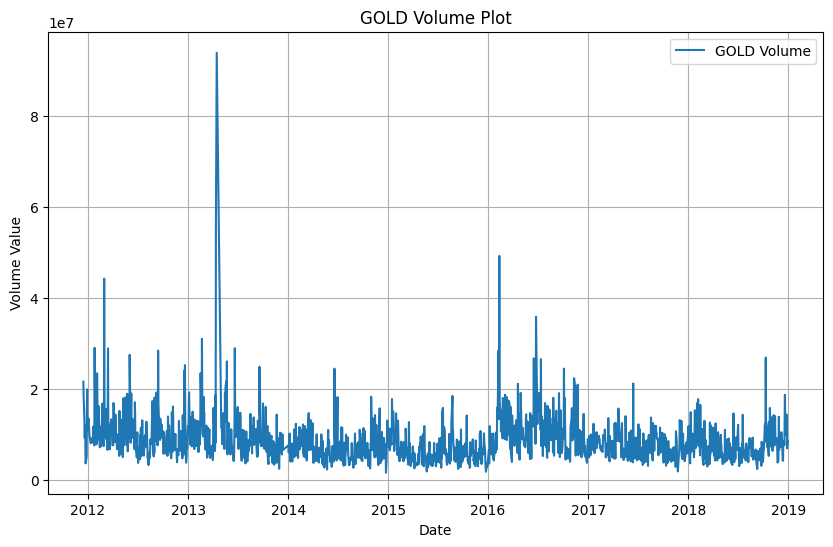

EG has no trend column


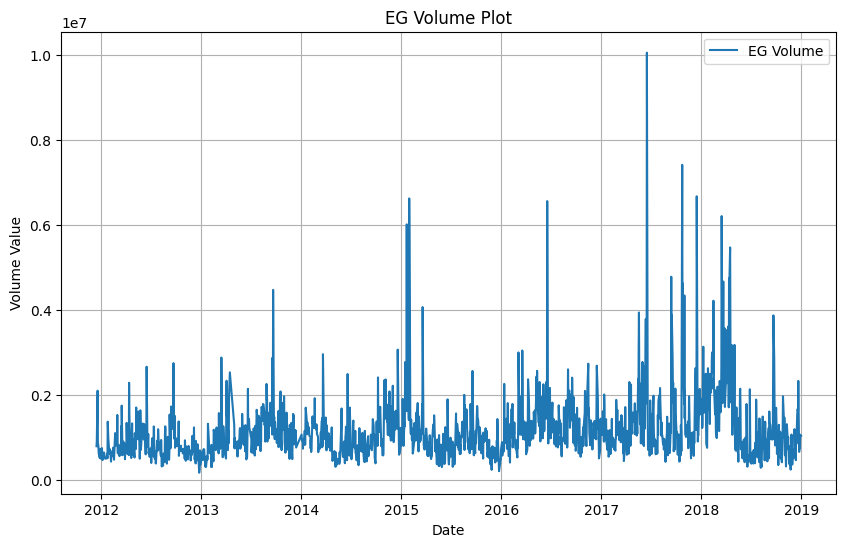

GDX has no trend column


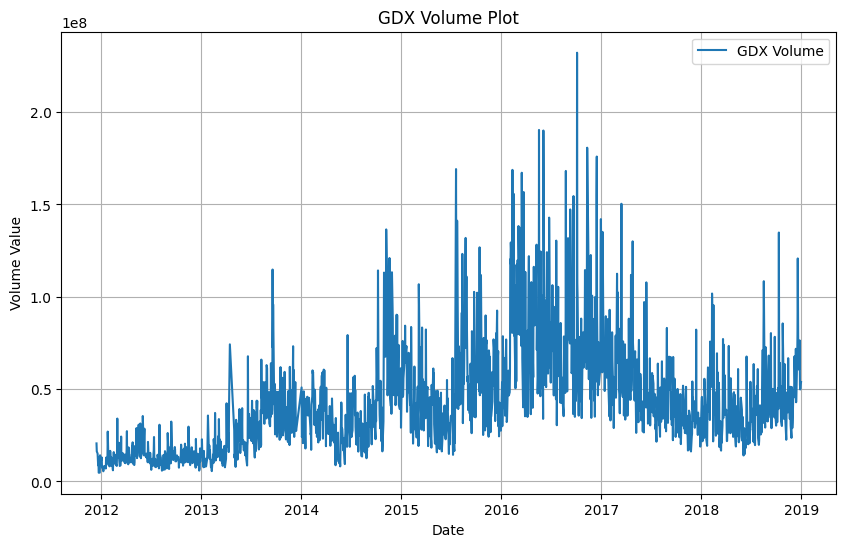

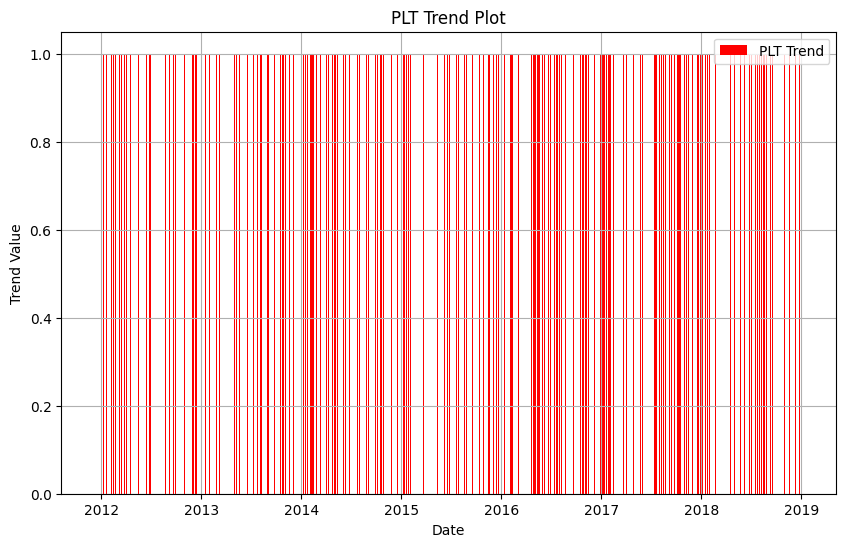

PLT has no volume column


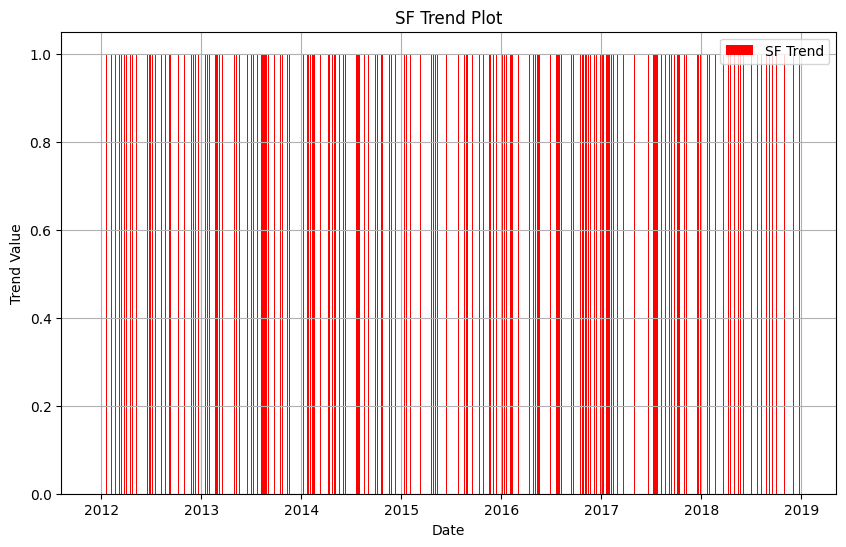

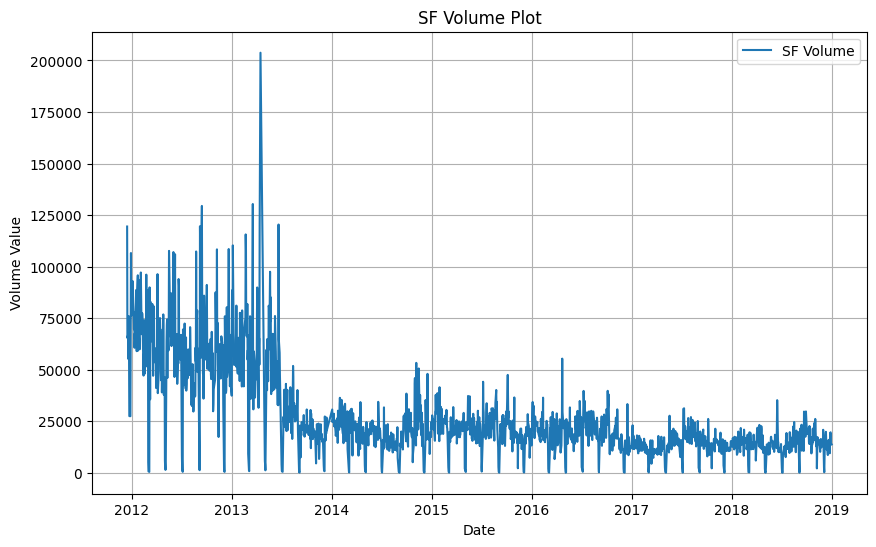

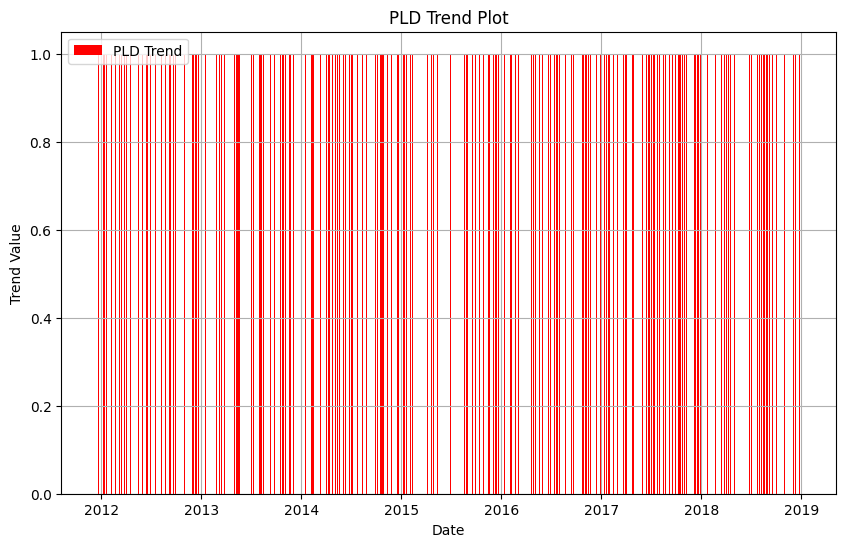

PLD has no volume column
RHO has no trend column
RHO has no volume column
SP has no trend column


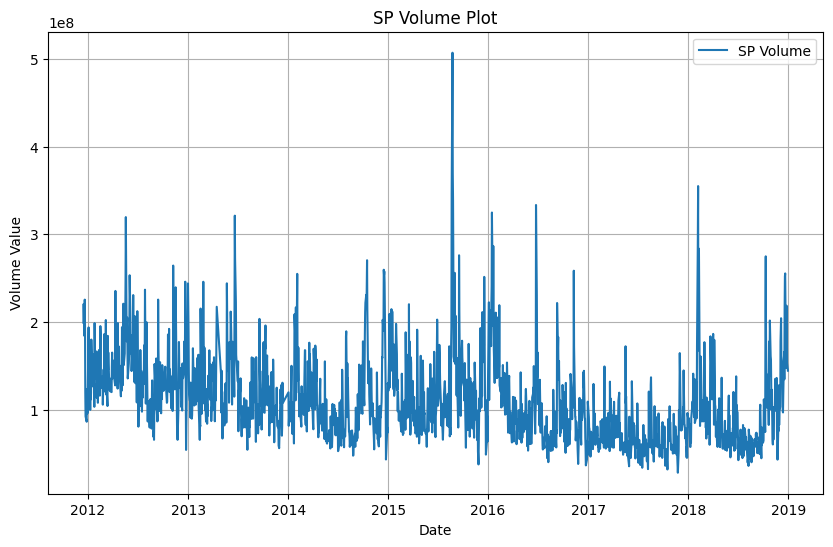

DJ has no trend column


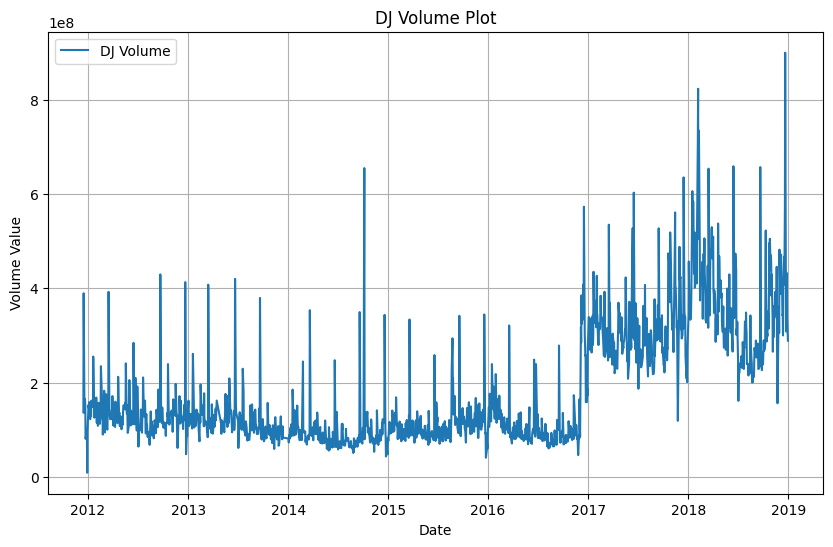

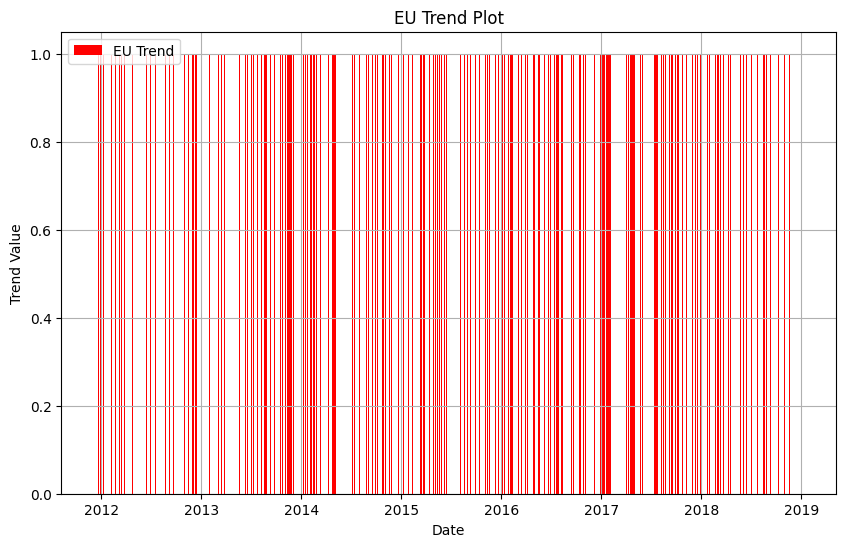

EU has no volume column


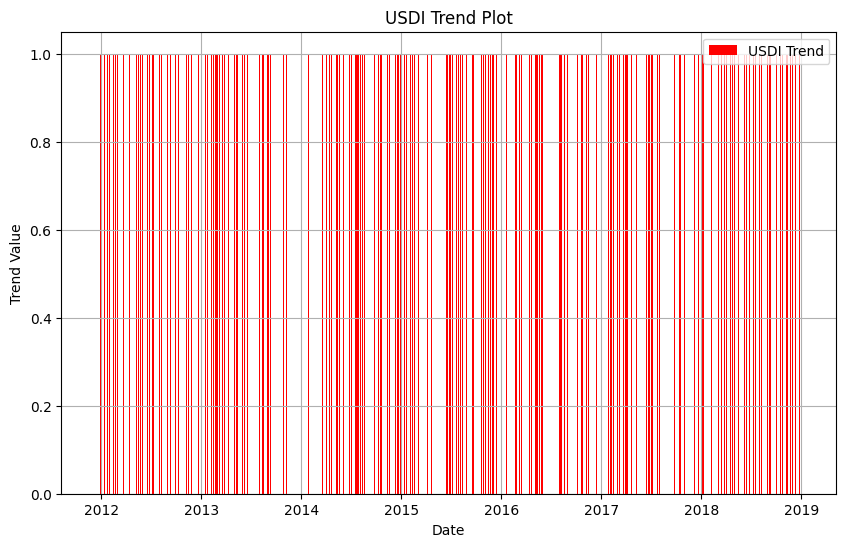

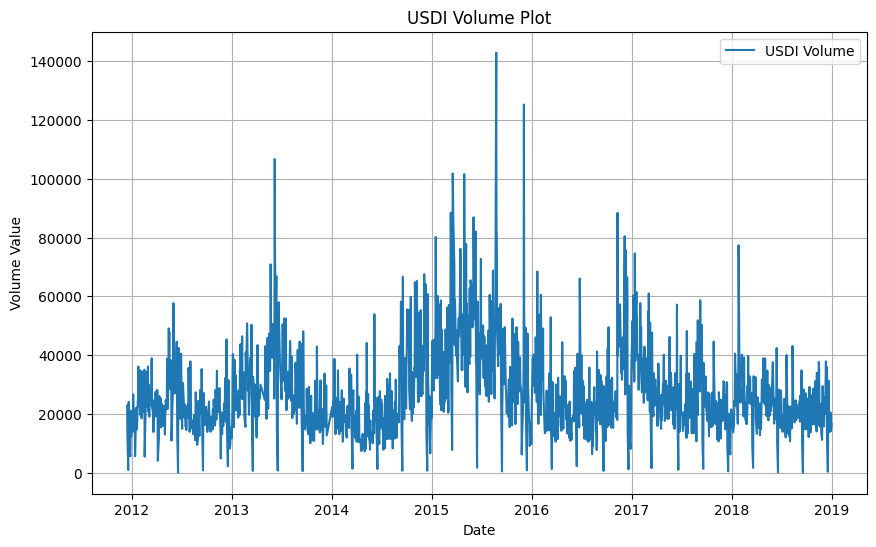

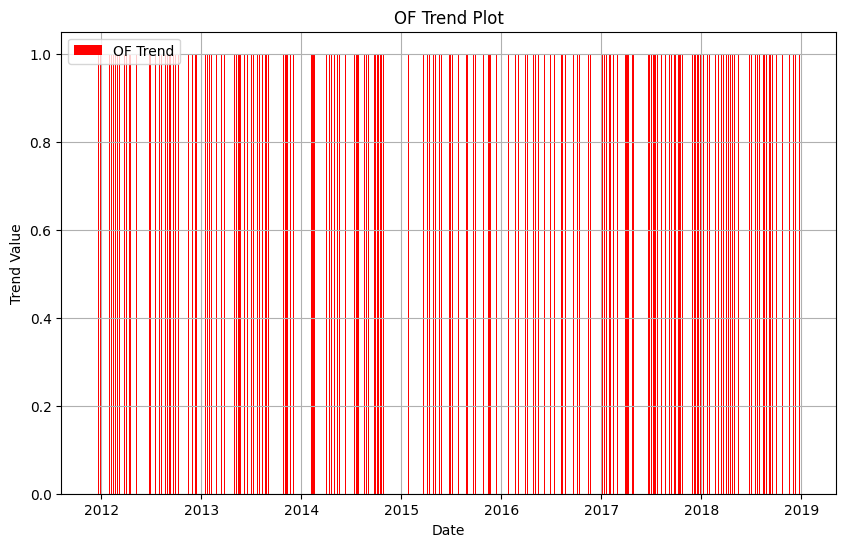

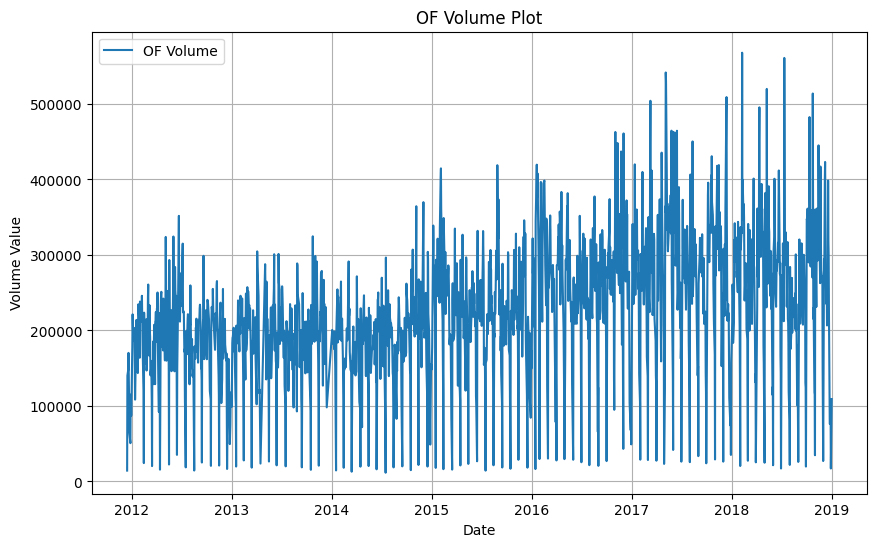

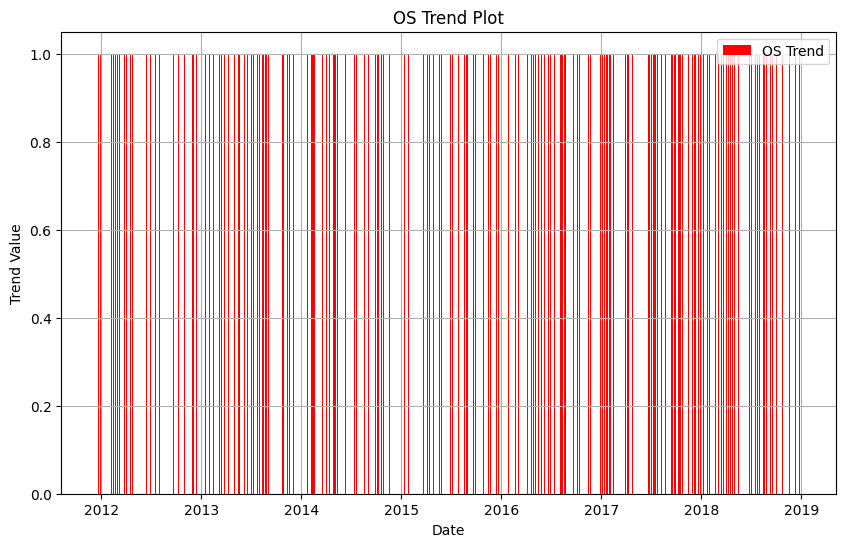

OS has no volume column
USO has no trend column


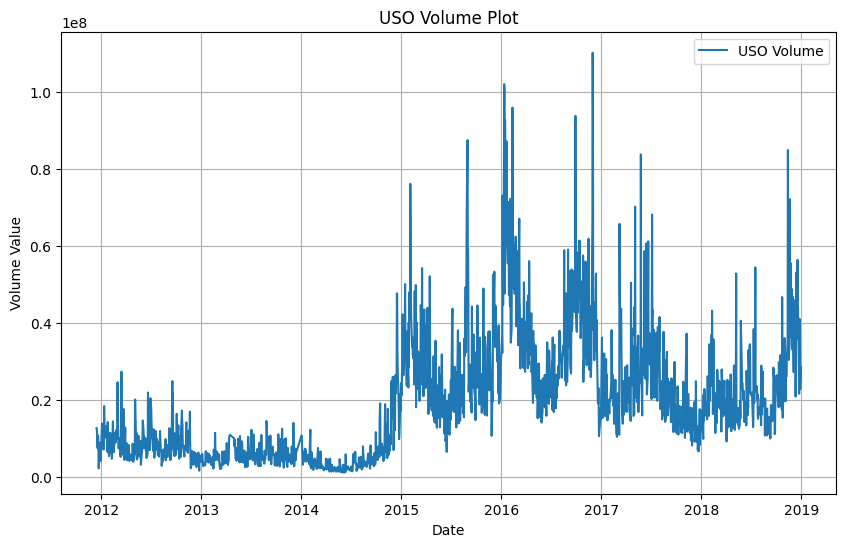

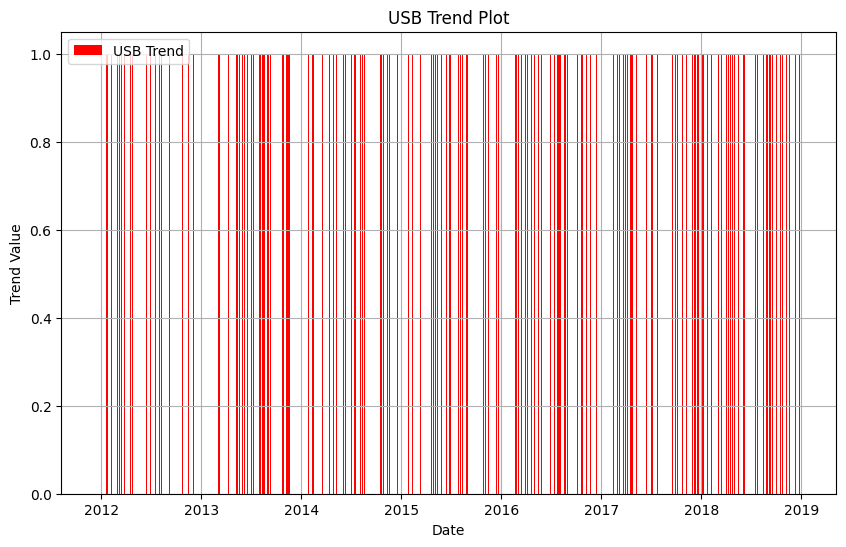

USB has no volume column


In [16]:
# Iterate through the prefixes in the dictionary
for prefix, columns in prefix_columns.items():
    # Check if 'trend' and 'volume' columns exist for the current prefix
    if any(col for col in columns if 'trend' in col):
        # Plot the 'trend' column for the current prefix as a bar plot
        trend_column = next(col for col in columns if 'trend' in col)
        plt.figure(figsize=(10, 6))
        plt.bar(gold_price.index, gold_price[trend_column], color='red', label=f'{prefix} Trend')
        plt.xlabel('Date')
        plt.ylabel('Trend Value')
        plt.title(f'{prefix} Trend Plot')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        # Display a message for prefixes without a 'trend' column
        print(f'{prefix} has no trend column')

    if any(col for col in columns if 'volume' in col):
        # Plot the 'volume' column for the current prefix
        volume_column = next(col for col in columns if 'volume' in col)
        plt.figure(figsize=(10, 6))
        plt.plot(gold_price.index, gold_price[volume_column], label=f'{prefix} Volume')
        plt.xlabel('Date')
        plt.ylabel('Volume Value')
        plt.title(f'{prefix} Volume Plot')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        # Display a message for prefixes without a 'volume' column
        print(f'{prefix} has no volume column')

In [17]:
def plot_line_graph_for_prefixes(prefixes_to_plot):
    # Calculate the number of rows and columns based on the number of prefixes
    num_rows = (len(prefixes_to_plot) + 1) // 2  # Ensures at least 2 plots per row
    num_cols = 2  # Two plots per row

    # Create subplots for each prefix
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(9, 3 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i, prefix in enumerate(prefixes_to_plot):
        ax = axes[i] if len(prefixes_to_plot) > 1 else axes
        columns_to_plot = [col for col in prefix_columns[prefix] 
                           if 'volume' not in col and 'trend' not in col]

        # Plot each column as a line on the same plot
        for col in columns_to_plot:
            ax.plot(gold_price.index, gold_price[col], label=col)

        ax.set_title(f'{prefix}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        ax.legend()

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

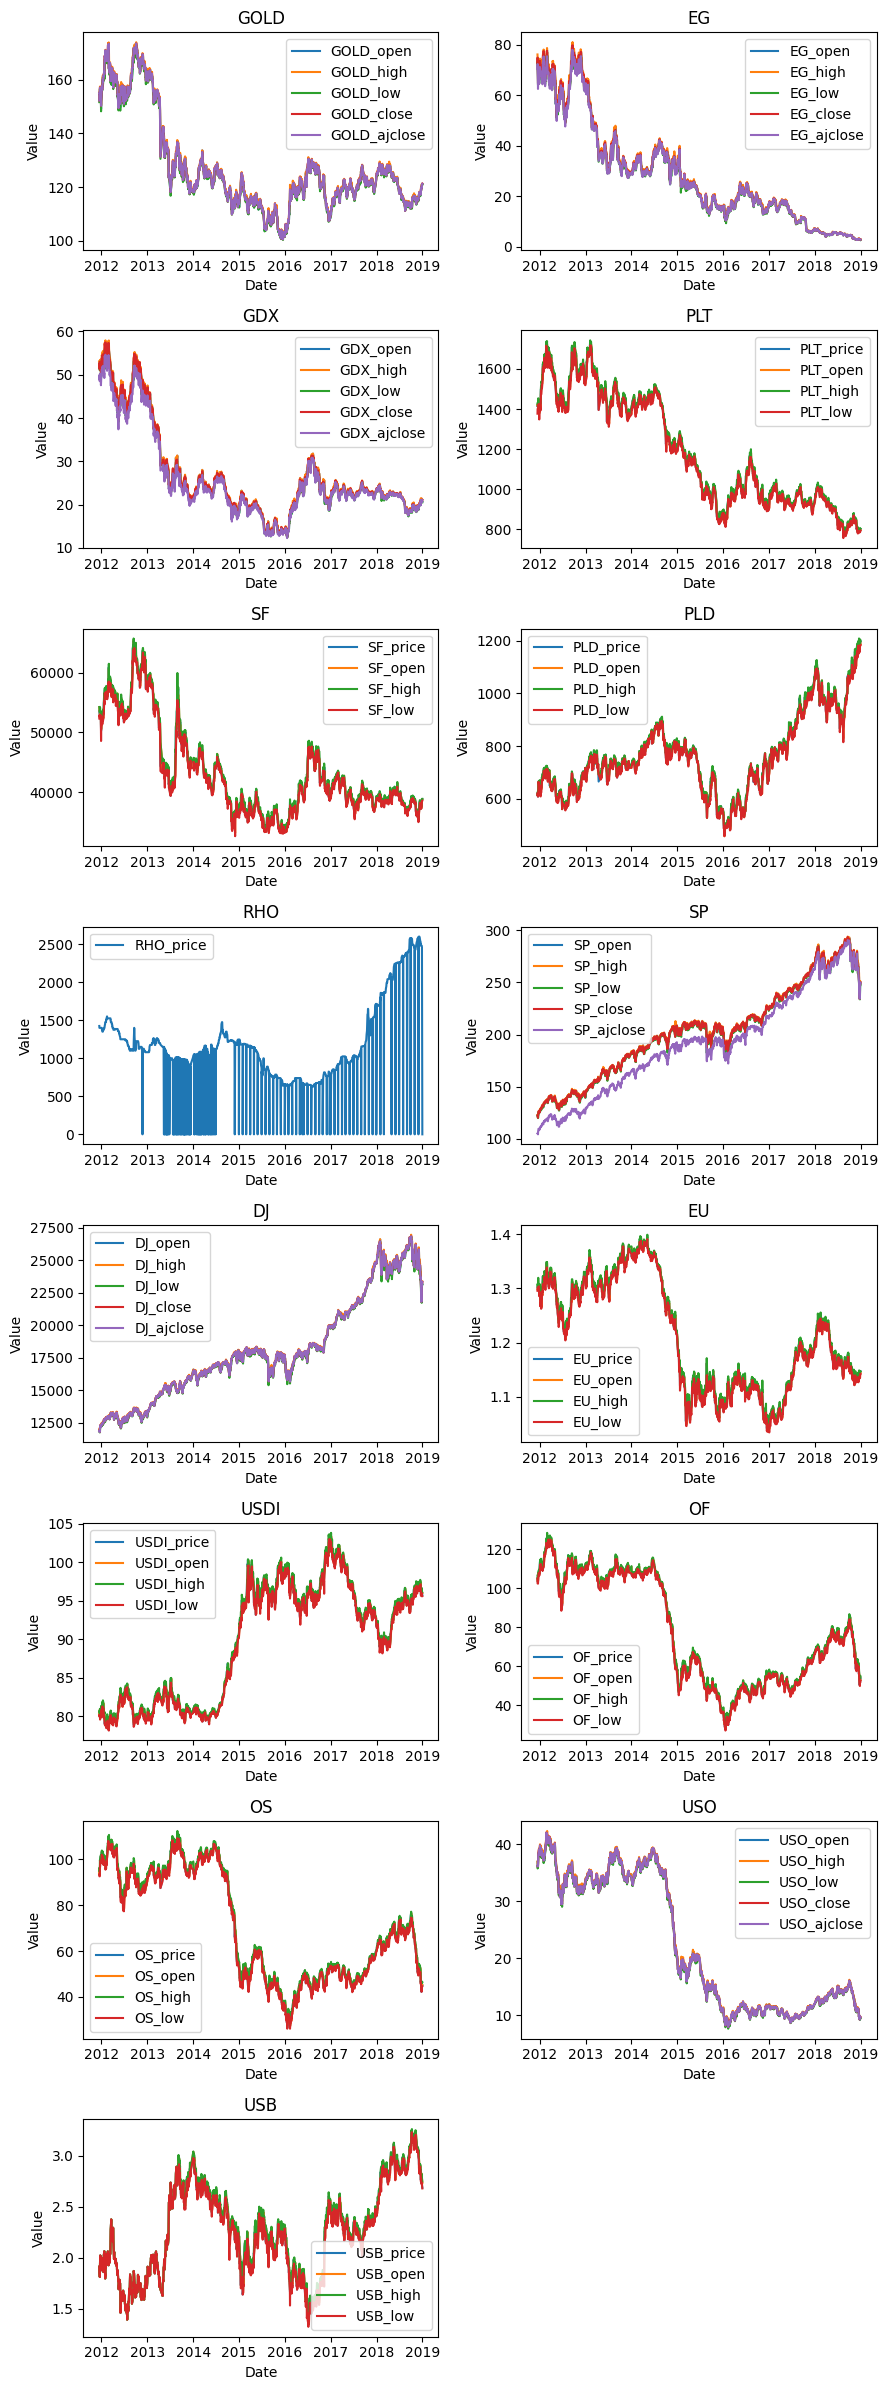

In [18]:
prefixes_to_plot = desired_prefix_order
plot_line_graph_for_prefixes(prefixes_to_plot)

## 3. Data Preparation
### 3.1 Dealing with Missing Values

In [19]:
gold_price.isnull().any().any()

False

In [20]:
# Check for '0' values in each column and count them
zero_value_counts = (gold_price == 0).sum()

# Filter columns with at least one '0' value and not containing 'trend' in the name
filtered_columns = [col for col in zero_value_counts.index 
                    if 'trend' not in col 
                    and zero_value_counts[col] > 0]

# Print the columns and their '0' value counts
for column in filtered_columns:
    count = zero_value_counts[column]
    print(f"{column}: {count}")

RHO_price: 132


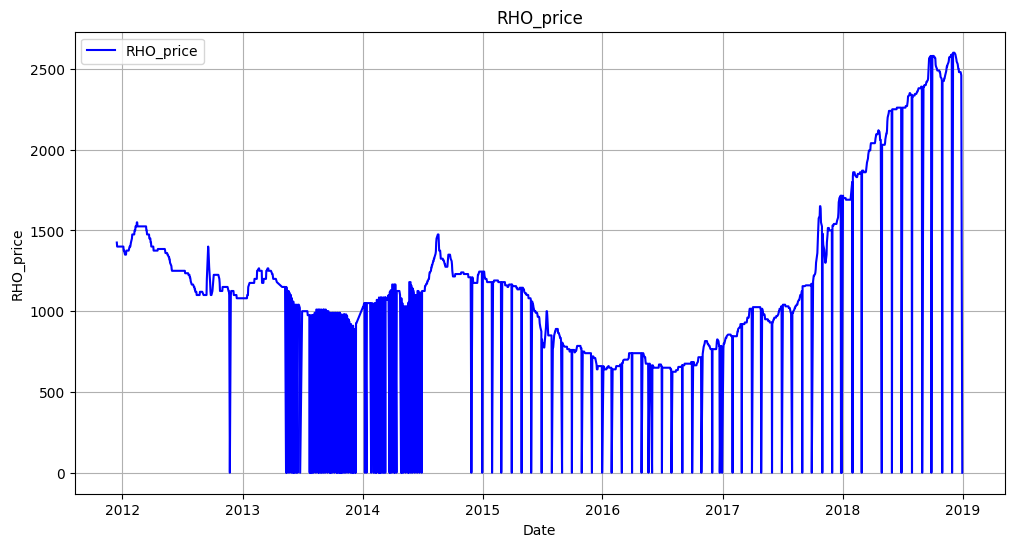

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(gold_price.index, gold_price['RHO_price'], label='RHO_price', color='blue')
plt.xlabel('Date')
plt.ylabel('RHO_price')
plt.title('RHO_price')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Calculate the correlation between 'RHO_price' and the three target columns
rho_corr_df = gold_price[['RHO_price','GOLD_ajclose', 'PLT_price', 'SF_price']]
rho_corr = rho_corr_df.corrwith(rho_corr_df['RHO_price'])
rho_corr = rho_corr.to_frame(name='Correlation with RHO_price')
rho_corr = rho_corr.drop('RHO_price').sort_values(by='Correlation with RHO_price', ascending=False)

rho_corr

Correlation with RHO_price
GOLD_ajclose                    0.095782
SF_price                       -0.022740
PLT_price                      -0.176380

In [23]:
# Replace '0' values in 'RHO_price' with NaN
gold_price['RHO_price'].replace(0, np.nan, inplace=True)

# Perform linear interpolation to fill missing values
gold_price['RHO_price'].interpolate(method='linear', inplace=True)

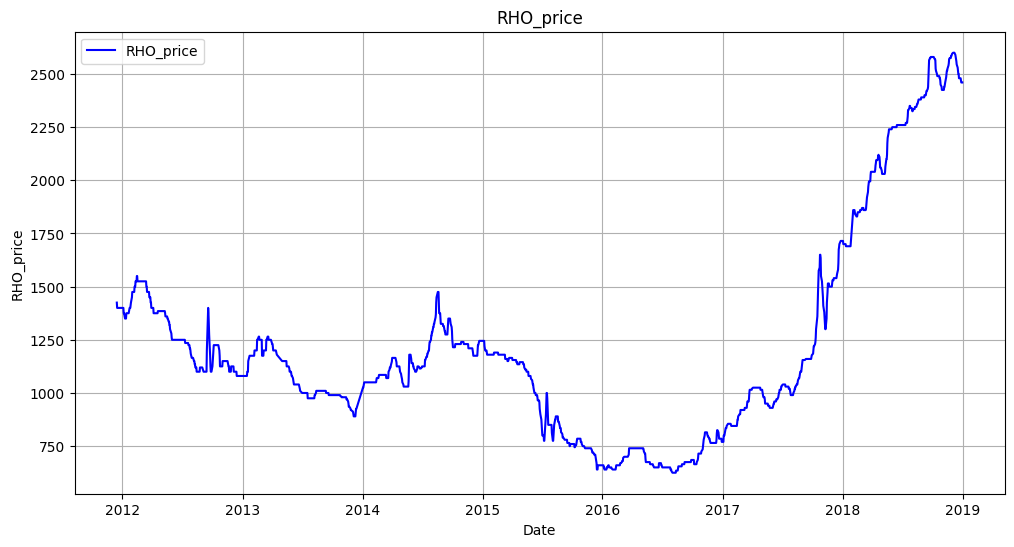

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(gold_price.index, gold_price['RHO_price'], label='RHO_price', color='blue')
plt.xlabel('Date')
plt.ylabel('RHO_price')
plt.title('RHO_price')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# After dealing with the missing value, Calculate the correlation again
rho_corr_df_cleansed = gold_price[['RHO_price','GOLD_ajclose', 'PLT_price', 'SF_price']]
rho_corr_cleansed = rho_corr_df_cleansed.corrwith(rho_corr_df_cleansed['RHO_price'])
rho_corr_cleansed = rho_corr_cleansed.to_frame(name='Correlation with RHO_price')
rho_corr_cleansed = rho_corr_cleansed.drop('RHO_price').sort_values(by='Correlation with RHO_price', ascending=False)

rho_corr_cleansed

Correlation with RHO_price
GOLD_ajclose                    0.073140
SF_price                       -0.046654
PLT_price                      -0.179550

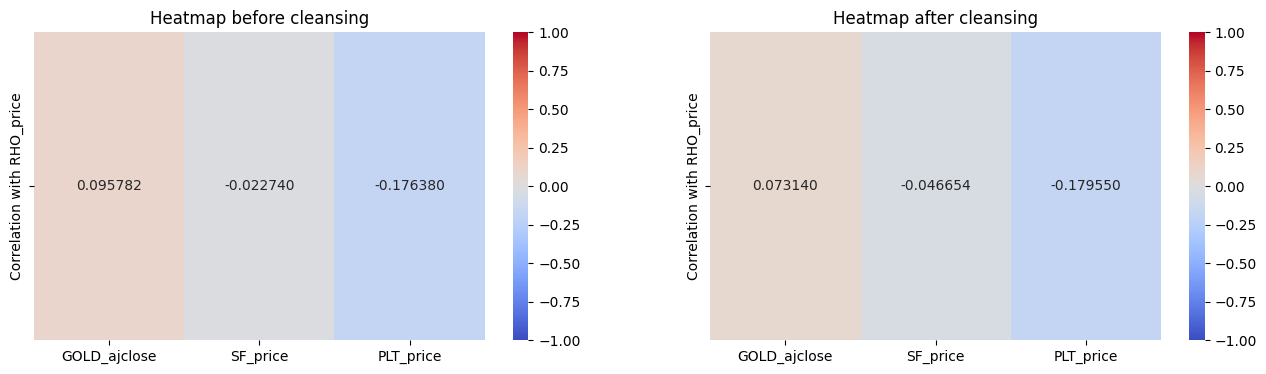

In [26]:
# Subplot (1 row 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Display heatmap before cleansing
sns.heatmap(rho_corr.T, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".6f", ax=axes[0])
axes[0].set_title('Heatmap before cleansing')

# Display heatmap after cleansing
sns.heatmap(rho_corr_cleansed.T, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".6f", ax=axes[1])
axes[1].set_title('Heatmap after cleansing')

plt.show()

### 3.2 Finding Outliers
#### 3.2.1 Detect outliers using IQR and Modified Z score

In [27]:
def outliers_iqr(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)  # lower fence
    upper_bound = quartile_3 + (iqr * 1.5)  # upper fence
    outliers_indices = np.where((data > upper_bound) | (data < lower_bound))  # detect outliers
    return outliers_indices

# Create a DataFrame to store outlier values
outliers_df_iqr = pd.DataFrame(columns=['Column', 'Outlier Values'])

# Loop through each column in the gold_price DataFrame
for column in gold_price.columns:
    # Exclude columns containing 'trend'
    if 'trend' not in column:
        # Find outliers for the current column
        outliers_indices = outliers_iqr(gold_price[column])
        
        # Check if outliers were found
        if len(outliers_indices[0]) > 0:
            outlier_values = gold_price[column].iloc[outliers_indices[0]].tolist()
            # Append the column name and outlier values to the DataFrame
            outliers_df_iqr = pd.concat([outliers_df_iqr, pd.DataFrame({'Column': [column], 'Outlier Values': [outlier_values]})], ignore_index=True)
        else:
            outliers_df_iqr = pd.concat([outliers_df_iqr, pd.DataFrame({'Column': [column], 'Outlier Values': ['No outlier']})], ignore_index=True)

# Display the DataFrame with outlier values
outliers_df_iqr

Column  \
0      GOLD_open   
1      GOLD_high   
2       GOLD_low   
3     GOLD_close   
4   GOLD_ajclose   
5    GOLD_volume   
6        EG_open   
7        EG_high   
8         EG_low   
9       EG_close   
10    EG_ajclose   
11     EG_volume   
12      GDX_open   
13      GDX_high   
14       GDX_low   
15     GDX_close   
16   GDX_ajclose   
17    GDX_volume   
18     PLT_price   
19      PLT_open   
20      PLT_high   
21       PLT_low   
22      SF_price   
23       SF_open   
24       SF_high   
25        SF_low   
26     SF_volume   
27     PLD_price   
28      PLD_open   
29      PLD_high   
30       PLD_low   
31     RHO_price   
32       SP_open   
33       SP_high   
34        SP_low   
35      SP_close   
36    SP_ajclose   
37     SP_volume   
38       DJ_open   
39       DJ_high   
40        DJ_low   
41      DJ_close   
42    DJ_ajclose   
43     DJ_volume   
44      EU_price   
45       EU_open   
46       EU_high   
47        EU_low   
48    USDI_price   
49     USDI_open   
50     USDI_high   
51      USDI_low   
52   USDI_volume   
53      OF_price   
54       OF_open   
55       OF_high   
56        OF_low   
57     OF_volume   
58      OS_price   
59       OS_open   
60       OS_high   
61        OS_low   
62      USO_open   
63      USO_high   
64       USO_low   
65     USO_close   
66   USO_ajclose   
67    USO_volume   
68     USB_price   
69      USB_open   
70      USB_high   
71       USB_low   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [28]:
def outliers_modified_z_score(data):
    threshold = 1 # lower threshold, more outliers will be detected

    median_y = np.median(data)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in data])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in data]
    return np.where(np.abs(modified_z_scores) > threshold)

# Create a DataFrame to store outlier values
outliers_df_mod_z = pd.DataFrame(columns=['Column', 'Outlier Values'])

# Loop through each column in the gold_price DataFrame
for column in gold_price.columns:
    # Exclude columns containing 'trend'
    if 'trend' not in column:
        # Find outliers for the current column
        outliers_indices = outliers_iqr(gold_price[column])
        
        # Check if outliers were found
        if len(outliers_indices[0]) > 0:
            outlier_values = gold_price[column].iloc[outliers_indices[0]].tolist()
            # Append the column name and outlier values to the DataFrame
            outliers_df_mod_z = pd.concat([outliers_df_mod_z, pd.DataFrame({'Column': [column], 'Outlier Values': [outlier_values]})], ignore_index=True)
        else:
            outliers_df_mod_z = pd.concat([outliers_df_mod_z, pd.DataFrame({'Column': [column], 'Outlier Values': ['No outlier']})], ignore_index=True)

# Display the DataFrame with outlier values
outliers_df_mod_z

Column  \
0      GOLD_open   
1      GOLD_high   
2       GOLD_low   
3     GOLD_close   
4   GOLD_ajclose   
5    GOLD_volume   
6        EG_open   
7        EG_high   
8         EG_low   
9       EG_close   
10    EG_ajclose   
11     EG_volume   
12      GDX_open   
13      GDX_high   
14       GDX_low   
15     GDX_close   
16   GDX_ajclose   
17    GDX_volume   
18     PLT_price   
19      PLT_open   
20      PLT_high   
21       PLT_low   
22      SF_price   
23       SF_open   
24       SF_high   
25        SF_low   
26     SF_volume   
27     PLD_price   
28      PLD_open   
29      PLD_high   
30       PLD_low   
31     RHO_price   
32       SP_open   
33       SP_high   
34        SP_low   
35      SP_close   
36    SP_ajclose   
37     SP_volume   
38       DJ_open   
39       DJ_high   
40        DJ_low   
41      DJ_close   
42    DJ_ajclose   
43     DJ_volume   
44      EU_price   
45       EU_open   
46       EU_high   
47        EU_low   
48    USDI_price   
49     USDI_open   
50     USDI_high   
51      USDI_low   
52   USDI_volume   
53      OF_price   
54       OF_open   
55       OF_high   
56        OF_low   
57     OF_volume   
58      OS_price   
59       OS_open   
60       OS_high   
61        OS_low   
62      USO_open   
63      USO_high   
64       USO_low   
65     USO_close   
66   USO_ajclose   
67    USO_volume   
68     USB_price   
69      USB_open   
70      USB_high   
71       USB_low   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [29]:
def find_non_overlapping_outliers(outliers_df_iqr, outliers_df_mod_z):
    # Find non-overlapping outliers for each column and indicate their source
    non_overlapping_outliers = []

    for column in outliers_df_iqr['Column'].unique():
        iqr_outliers = set(outliers_df_iqr[outliers_df_iqr['Column'] == column]['Outlier Values'].iloc[0])
        mod_z_outliers = set(outliers_df_mod_z[outliers_df_mod_z['Column'] == column]['Outlier Values'].iloc[0])

        # Find non-overlapping outliers
        iqr_unique = iqr_outliers - mod_z_outliers
        mod_z_unique = mod_z_outliers - iqr_outliers

        # Add non-overlapping outliers to the result
        if iqr_unique:
            non_overlapping_outliers.append({'Column': column, 'Outlier Values': list(iqr_unique), 'Source': 'IQR Method'})
        if mod_z_unique:
            non_overlapping_outliers.append({'Column': column, 'Outlier Values': list(mod_z_unique), 'Source': 'Modified Z-Score Method'})

    # Create a DataFrame from the non-overlapping outliers
    non_overlapping_outliers_df = pd.DataFrame(non_overlapping_outliers)

    if non_overlapping_outliers_df.shape != (0, 0):
        # Sort the DataFrame by 'Column'
        non_overlapping_outliers_df_sorted = non_overlapping_outliers_df.sort_values(by='Column')
        return non_overlapping_outliers_df_sorted
    else:
        print("No non-overlapping outliers found")
        print("The shape of the non-overlapping dataframe is:", non_overlapping_outliers_df.shape)
        return None

In [30]:
find_non_overlapping_outliers(outliers_df_iqr, outliers_df_mod_z)

No non-overlapping outliers found
The shape of the non-overlapping dataframe is: (0, 0)


#### To test if the function really works, we test by adding non-overlapping values in the output dataframes of the two methods:

In [31]:
replace_values = [0, 1, 2, 3, 4, 5]

# Create a copy of outliers_df_iqr
outliers_df_iqr_copy = outliers_df_iqr.copy()

# Replace the 'Outlier Values' at index 67 in the copy
outliers_df_iqr_copy.at[67, 'Outlier Values'] = replace_values

replace_values = [3, 4, 5, 6, 7, 8, 9, 10]

# Create a copy of outliers_df_mod_z
outliers_df_mod_z_copy = outliers_df_mod_z.copy()

# Replace the 'Outlier Values' at index 67 in the copy
outliers_df_mod_z_copy.at[67, 'Outlier Values'] = replace_values


find_non_overlapping_outliers(outliers_df_iqr_copy, outliers_df_mod_z_copy)

Column    Outlier Values                   Source
0  USO_volume         [0, 1, 2]               IQR Method
1  USO_volume  [6, 7, 8, 9, 10]  Modified Z-Score Method

#### 3.2.2 Visualisation with Boxplot and Histogram

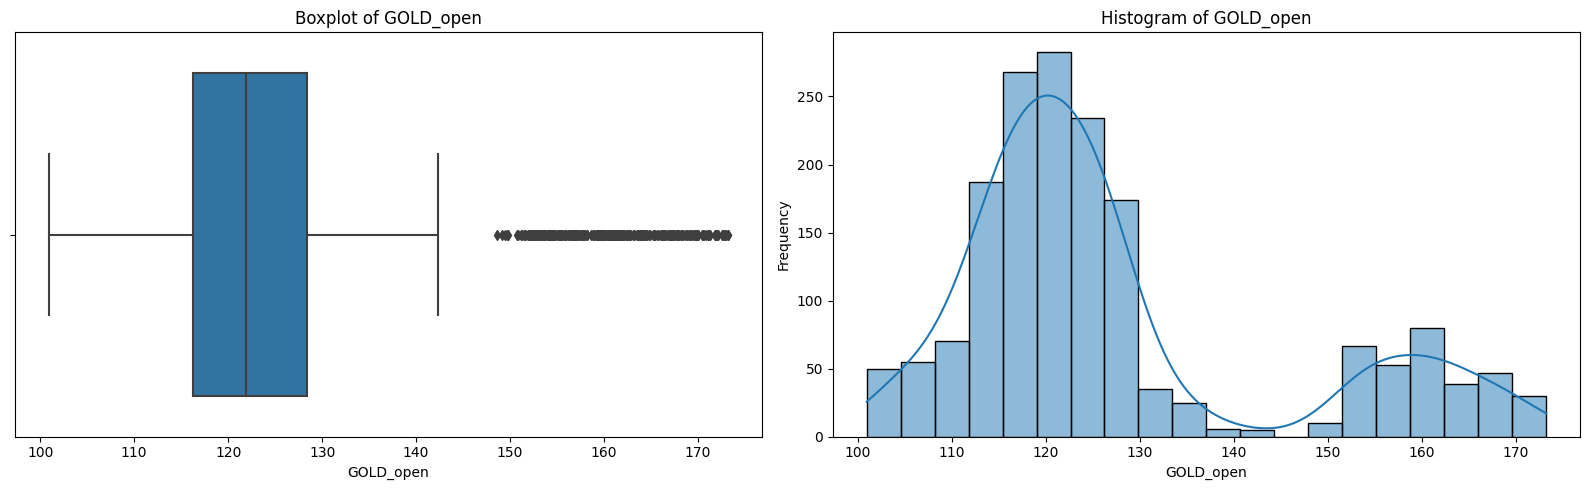

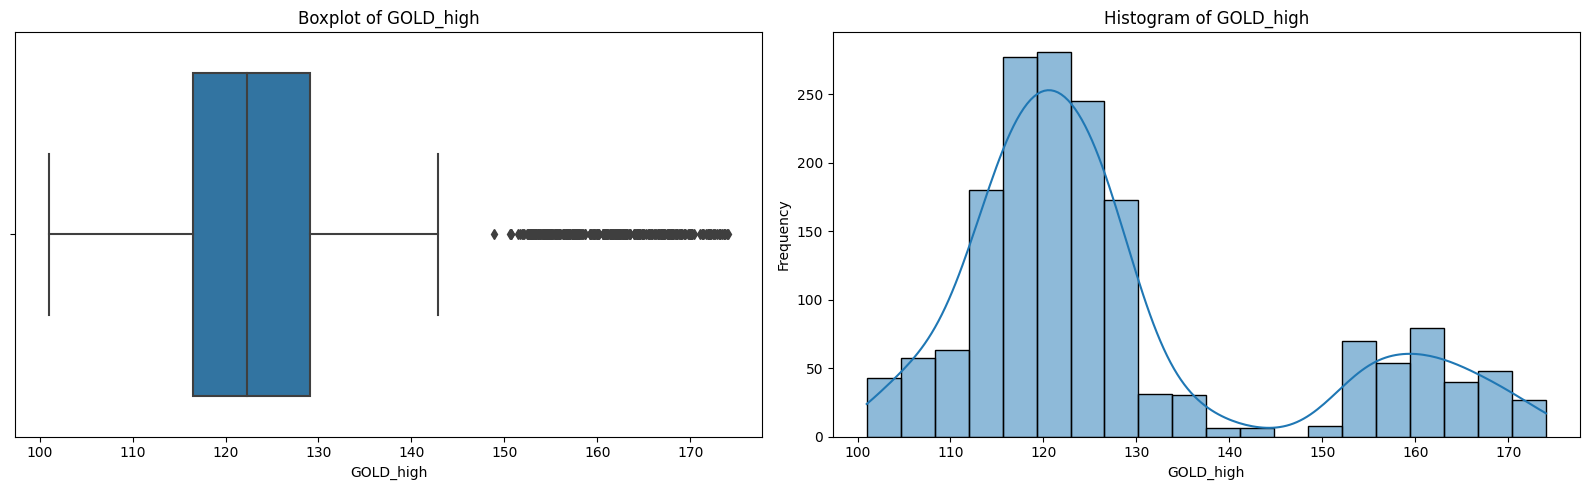

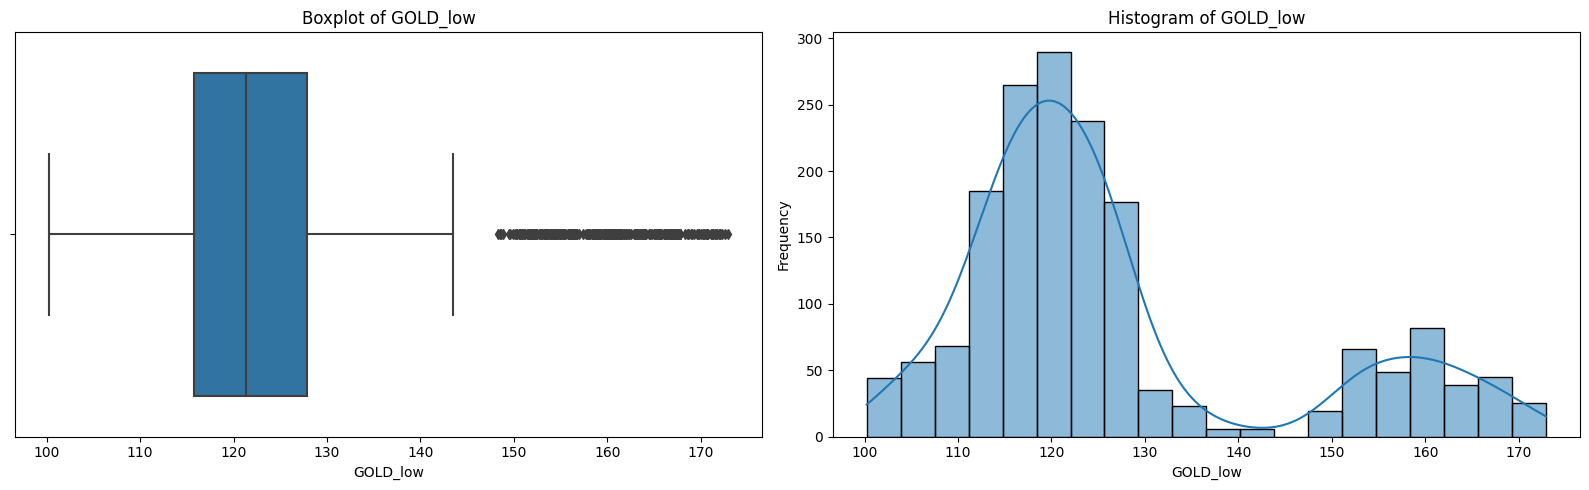

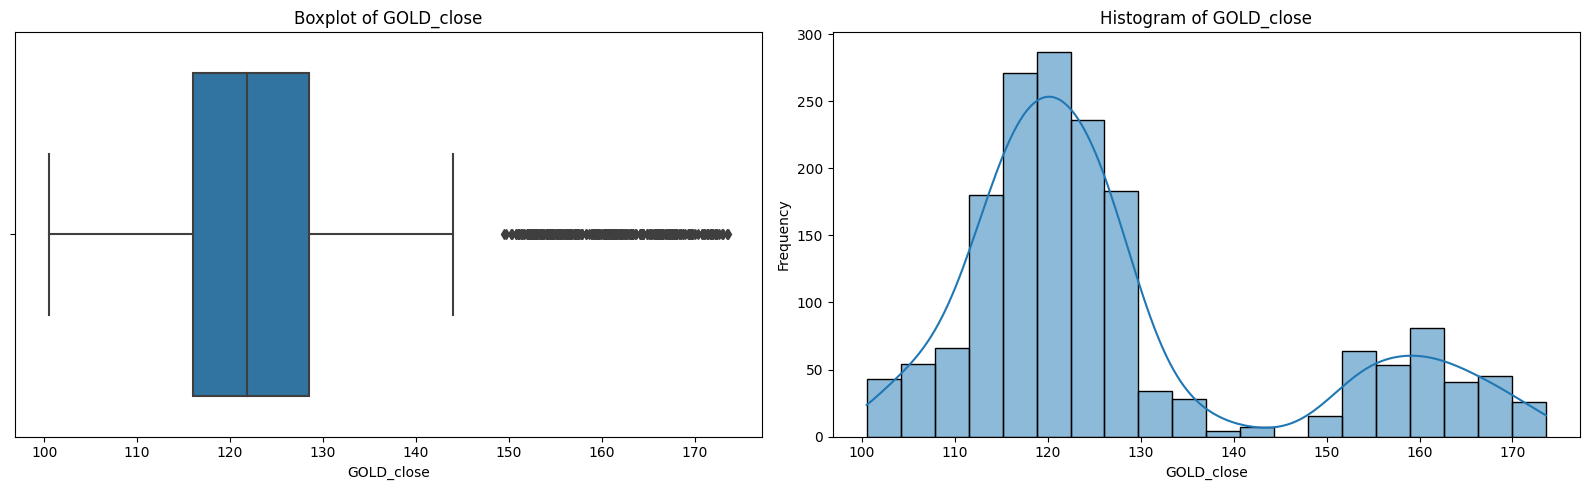

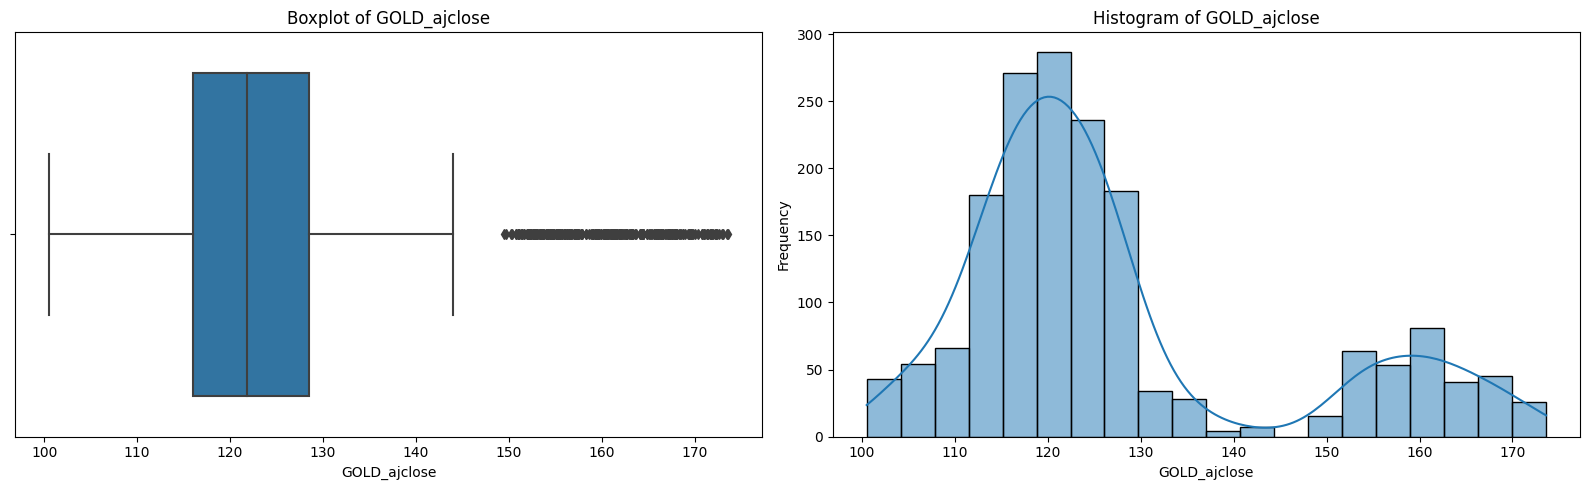

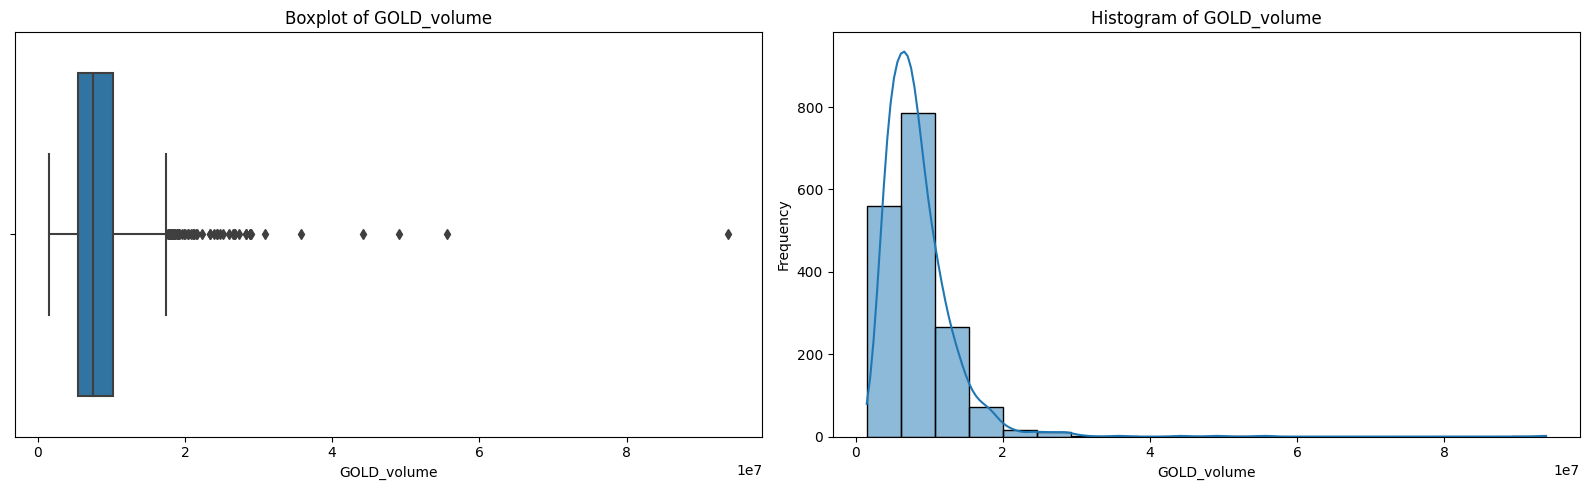

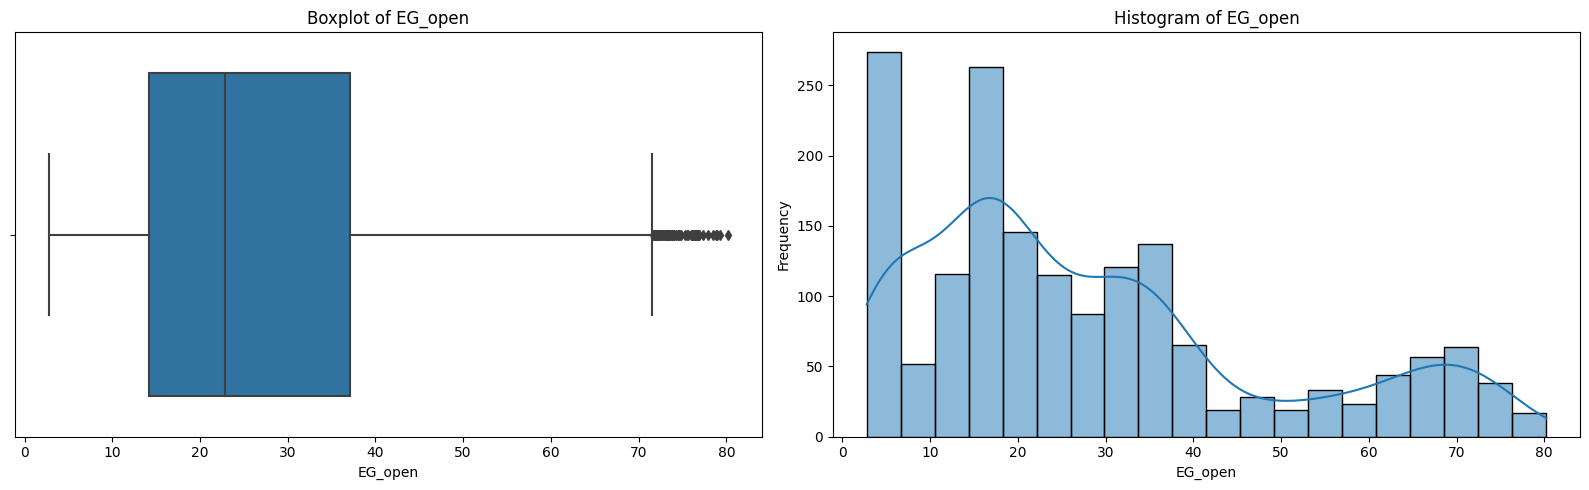

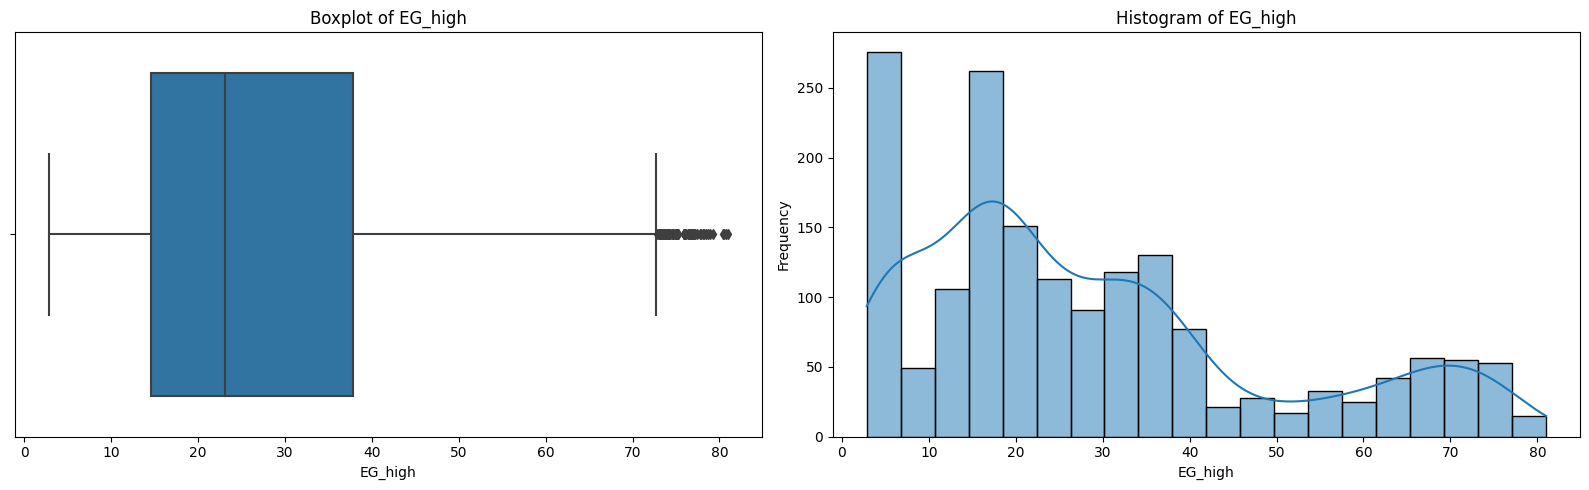

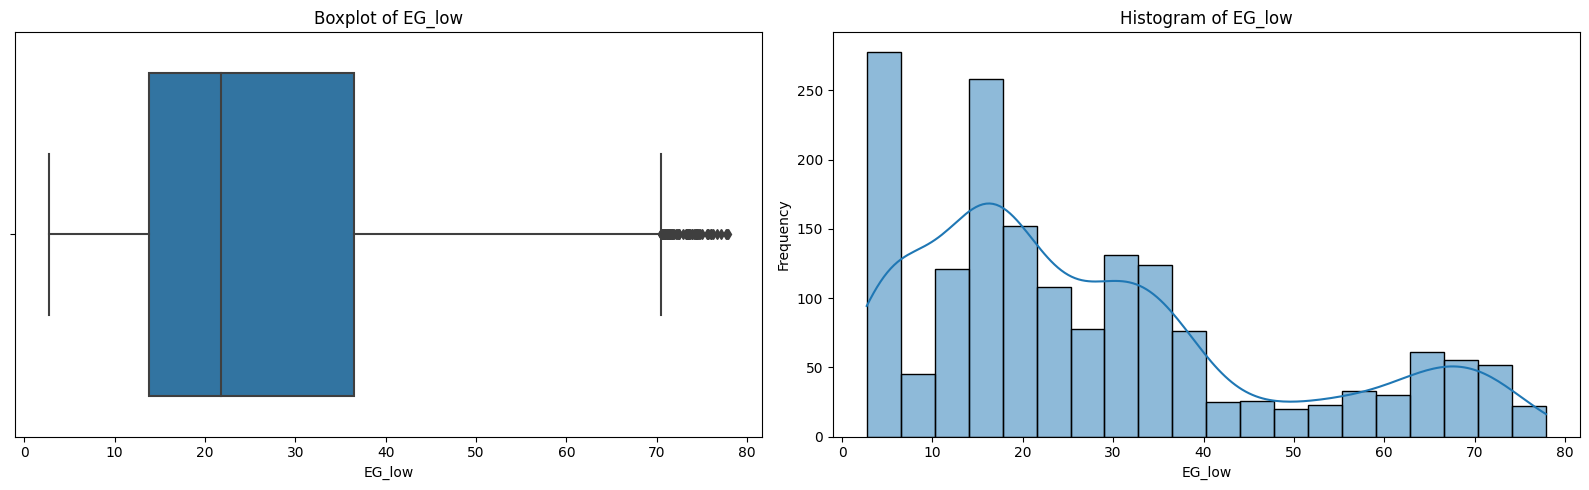

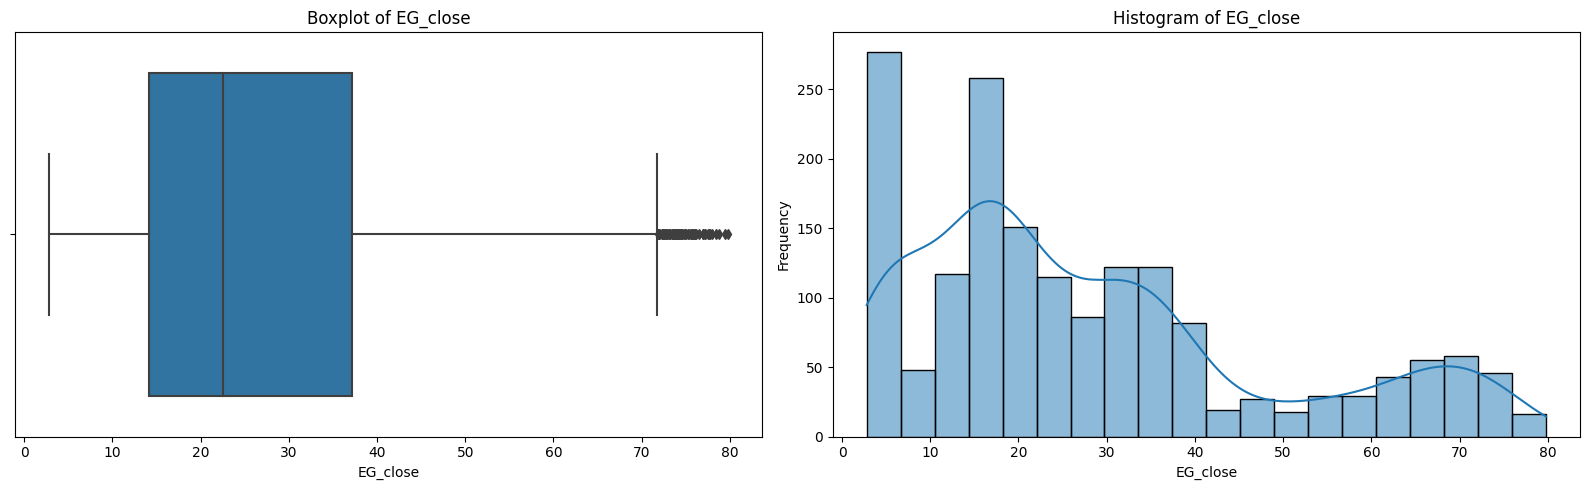

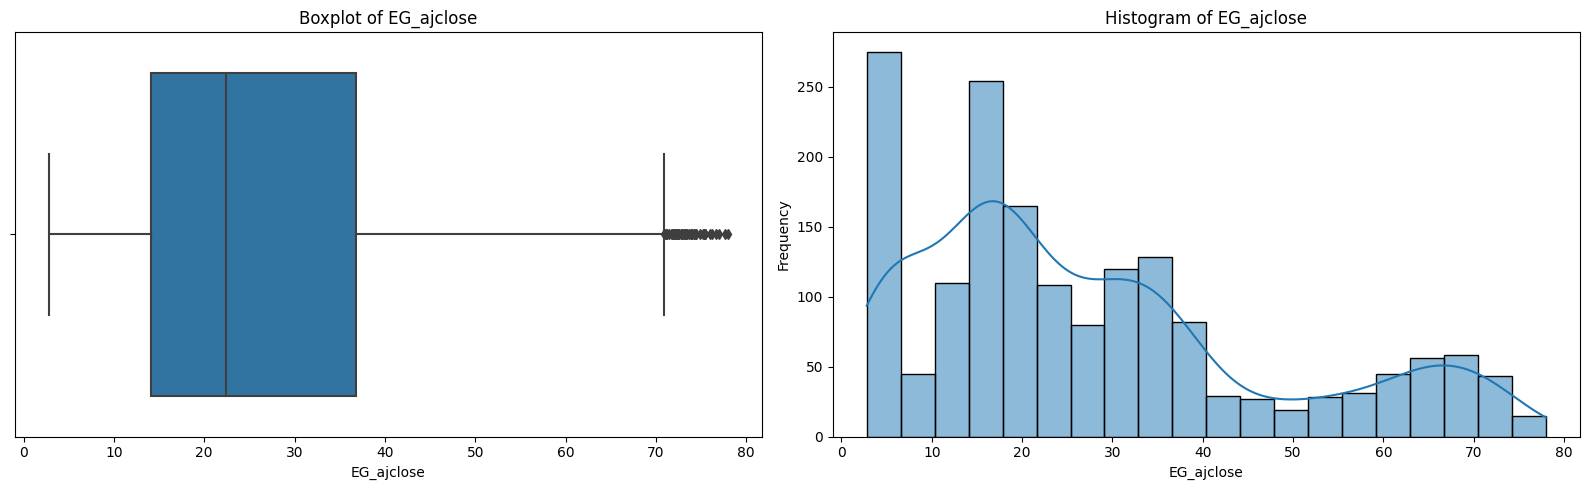

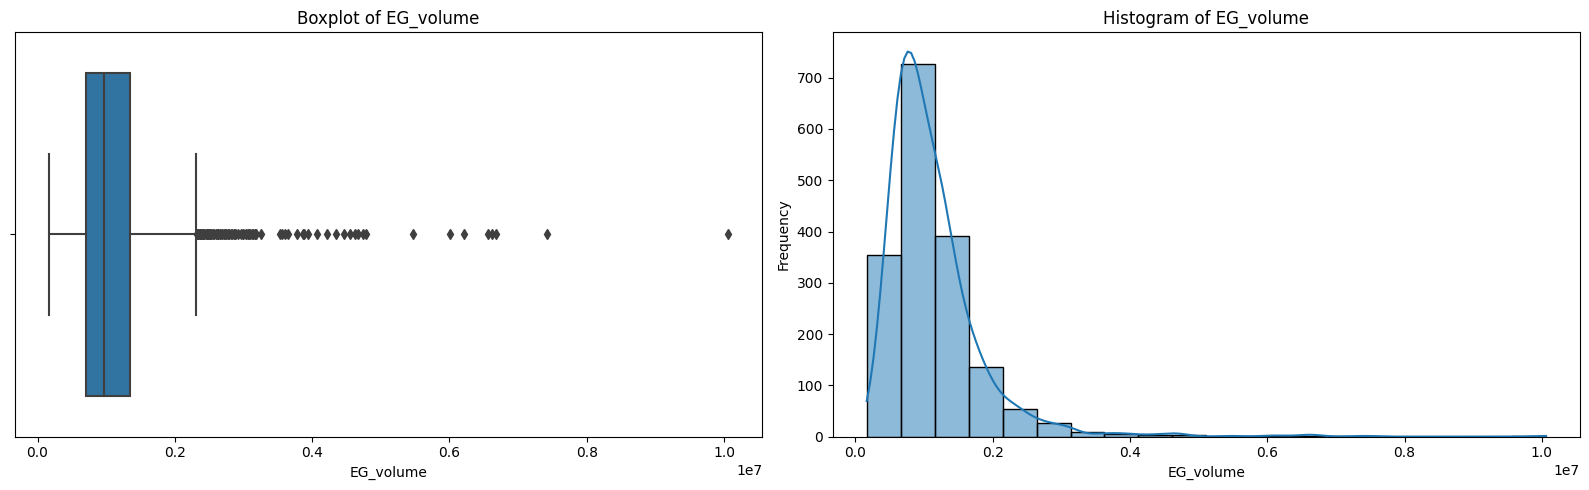

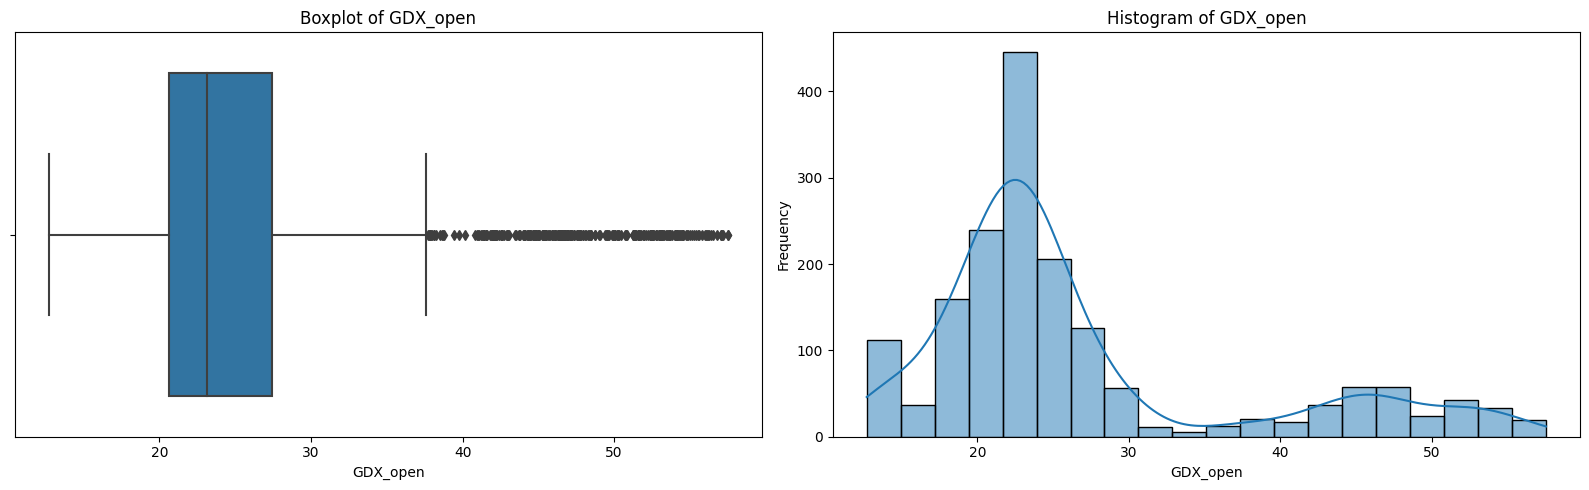

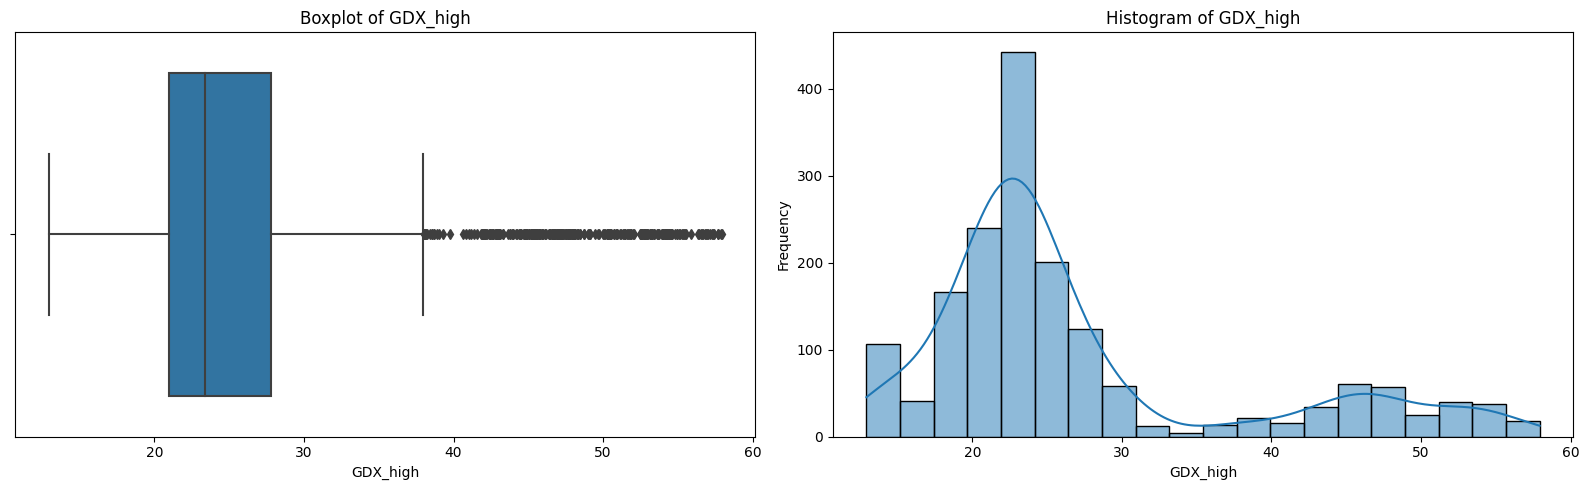

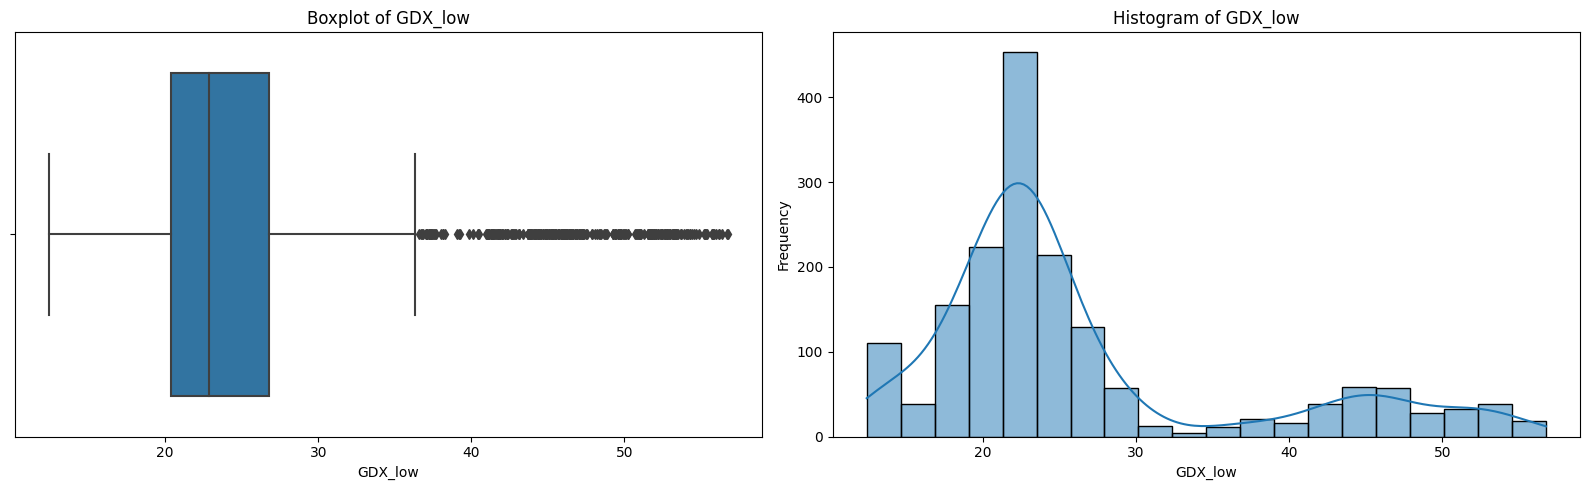

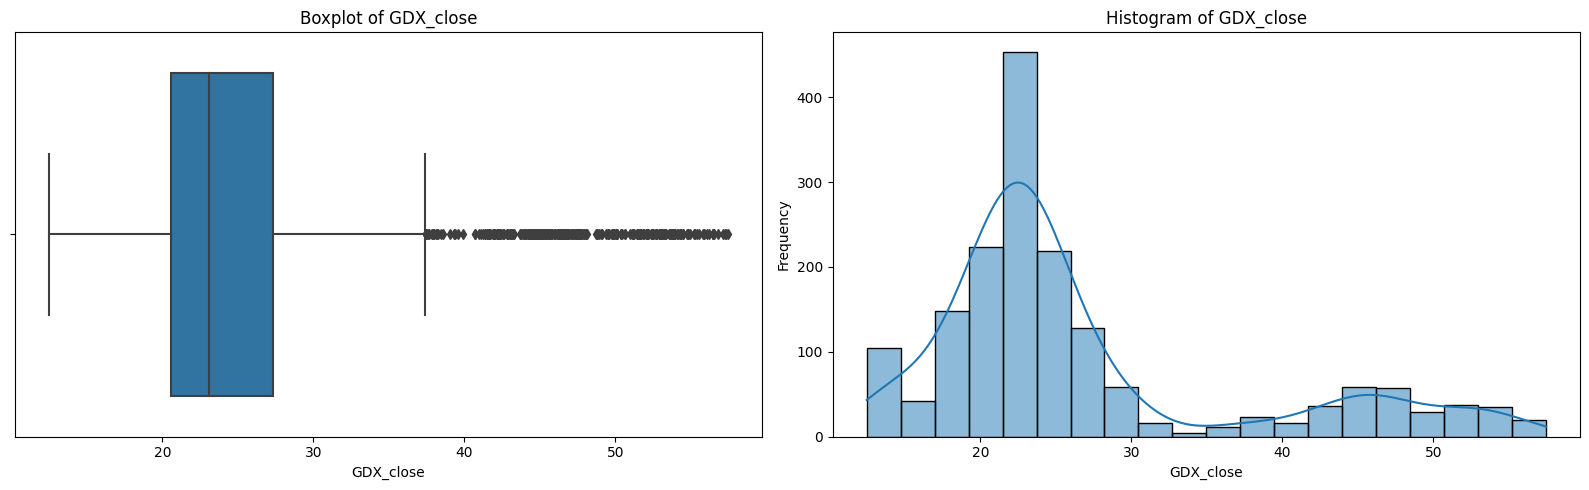

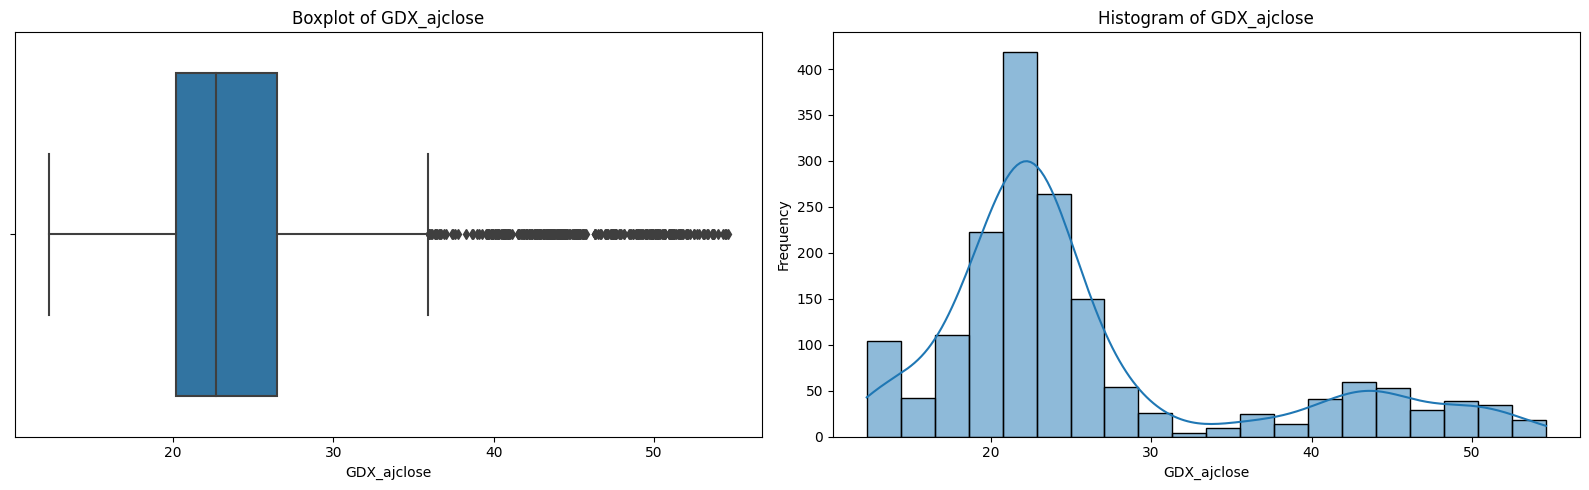

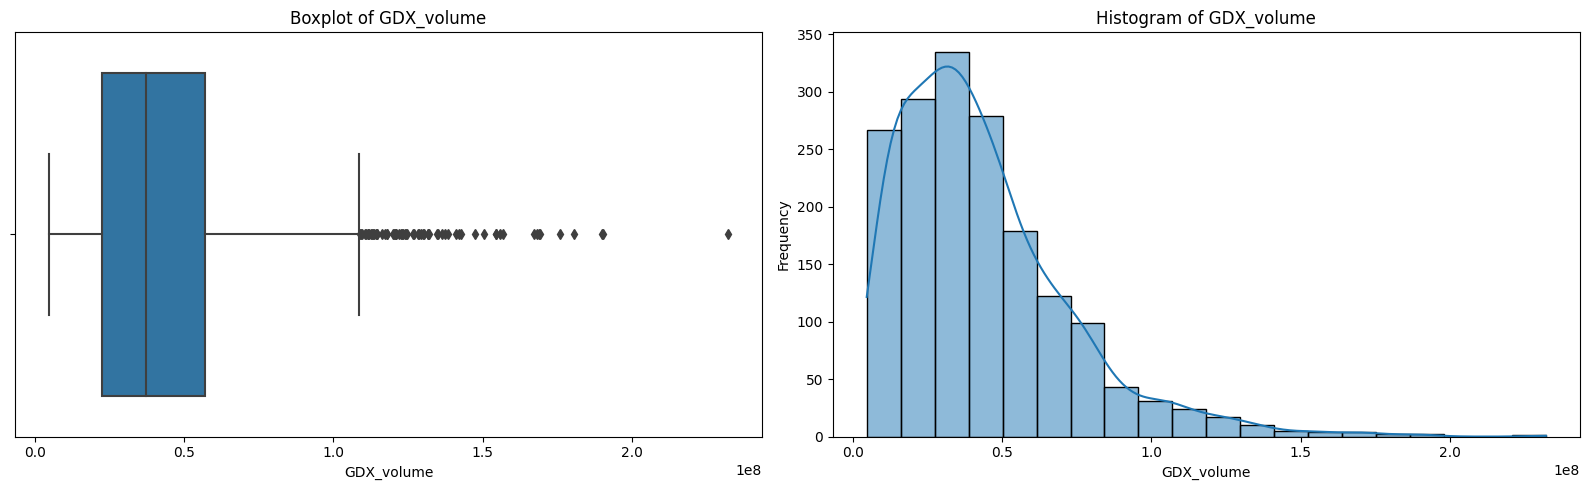

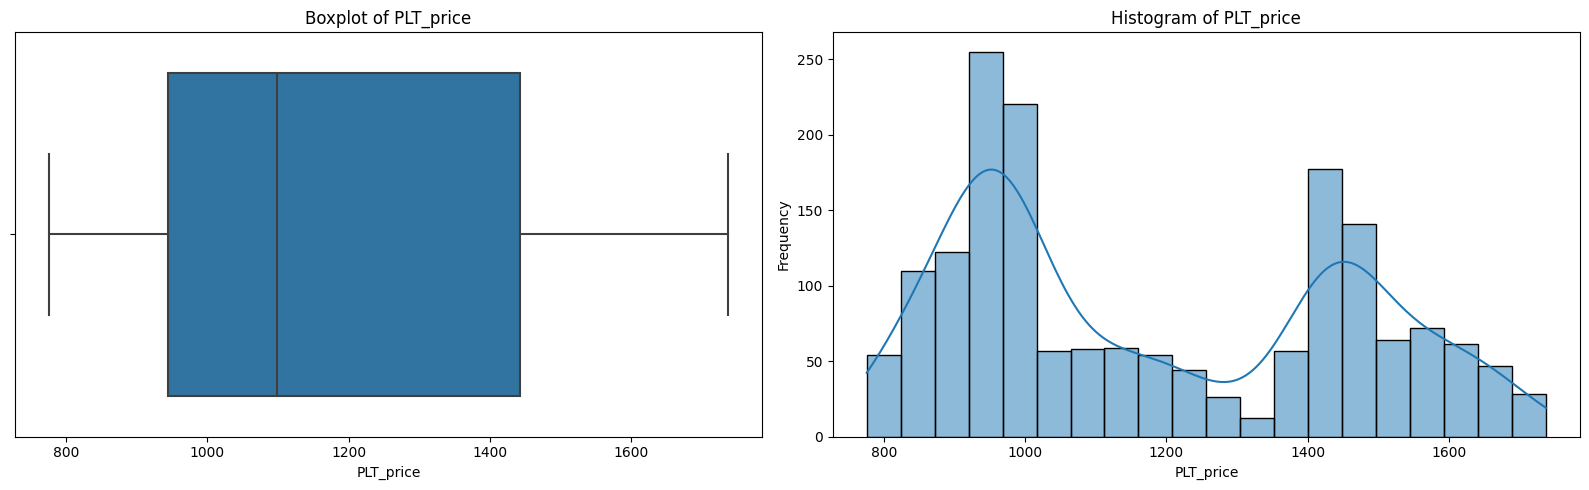

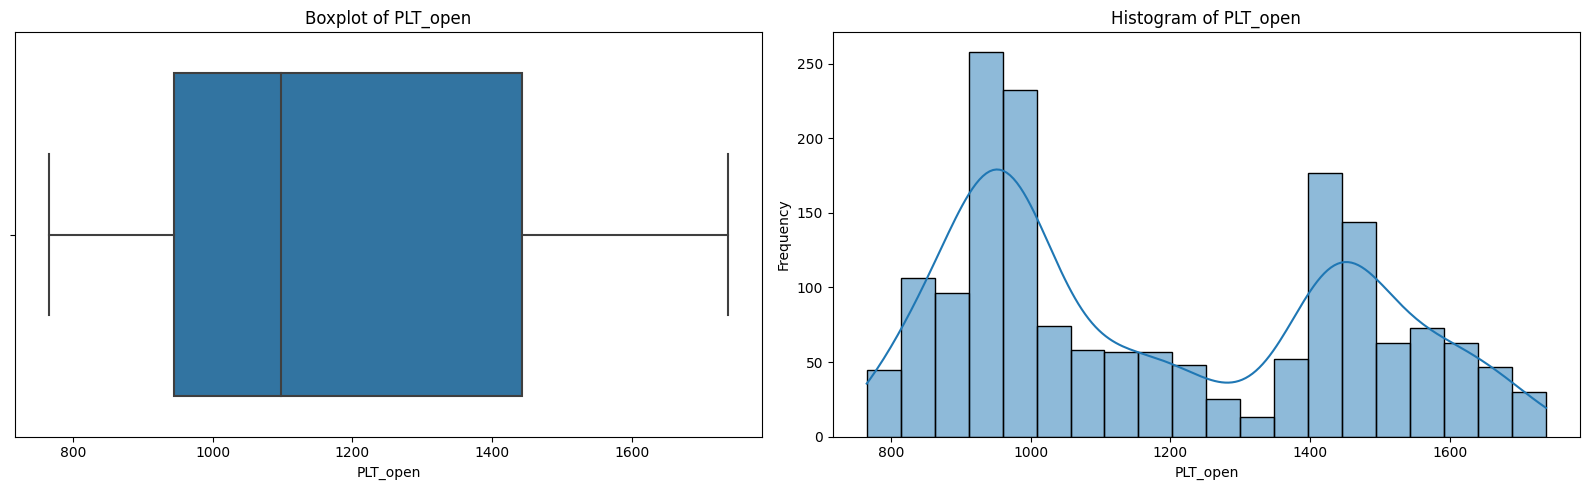

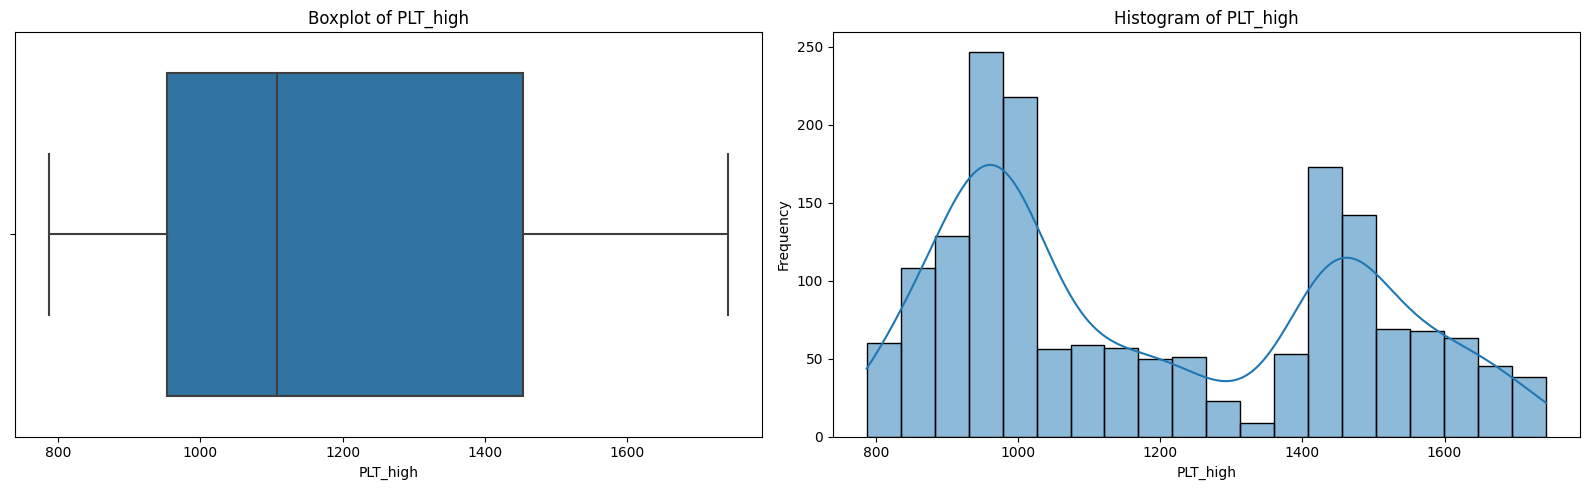

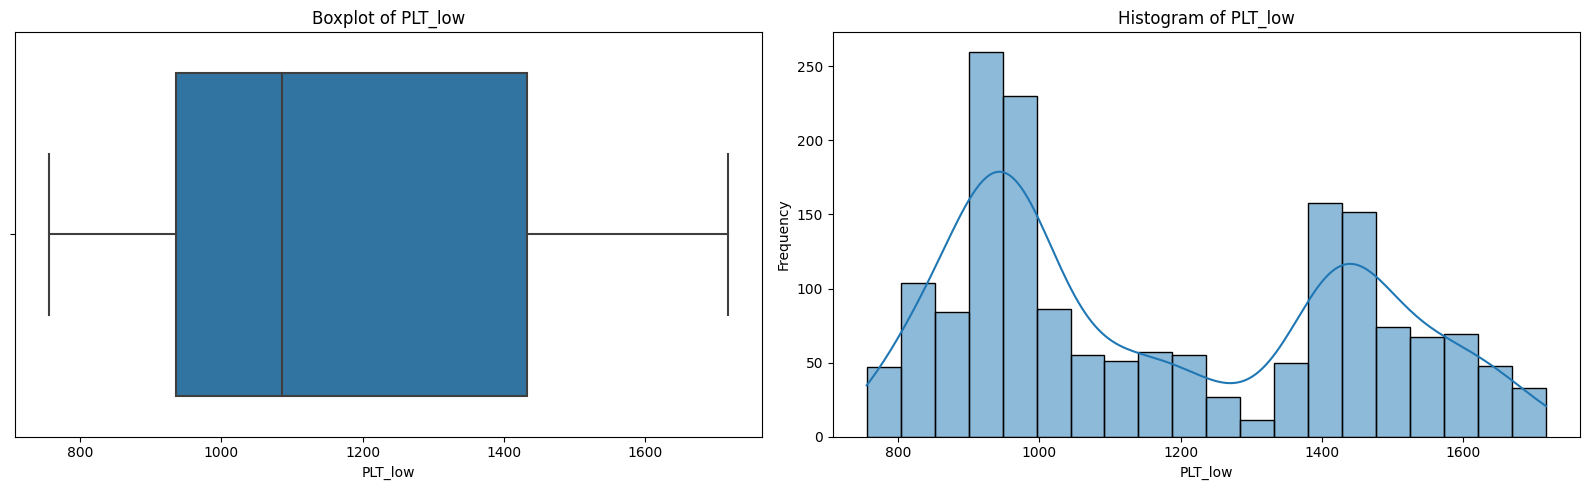

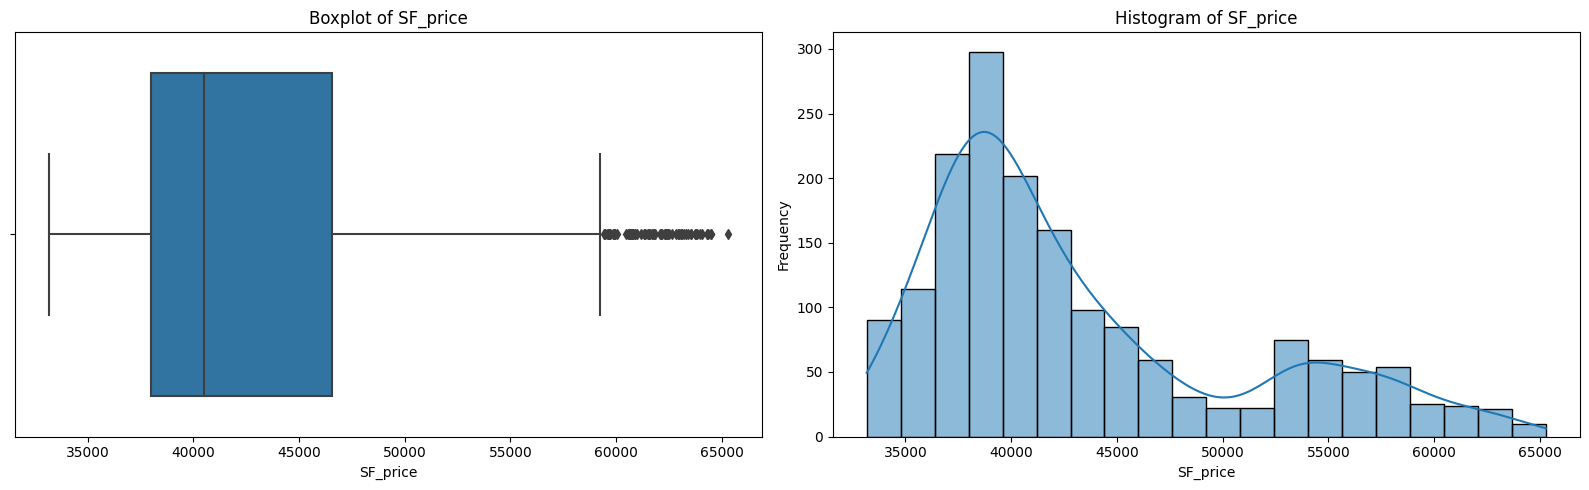

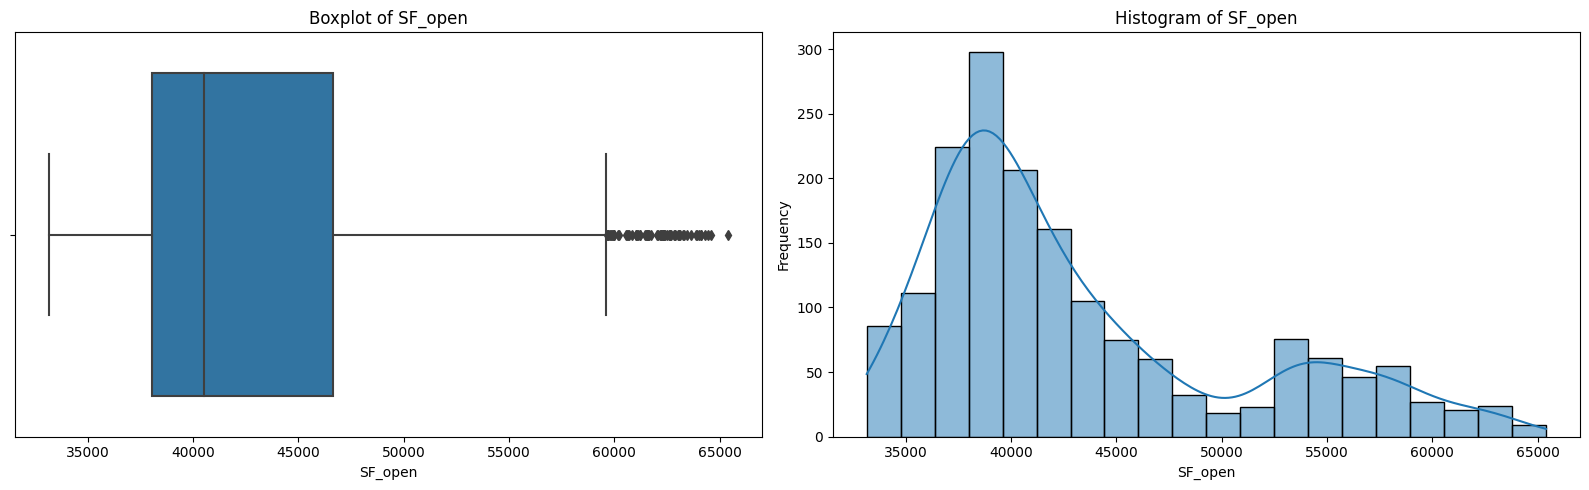

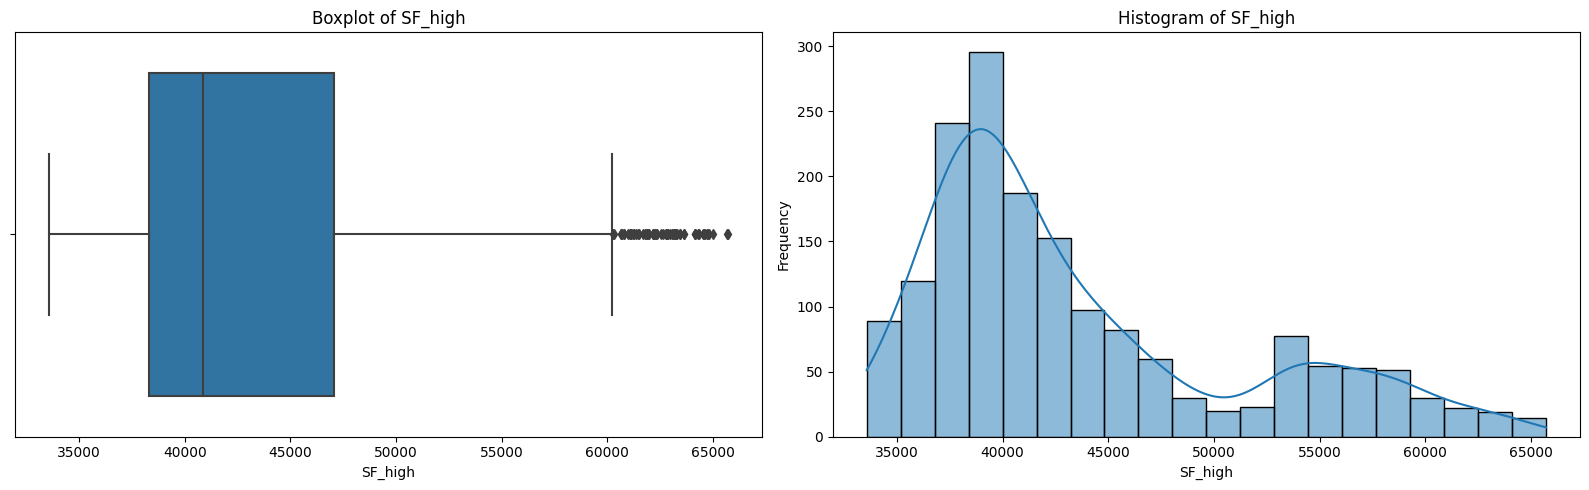

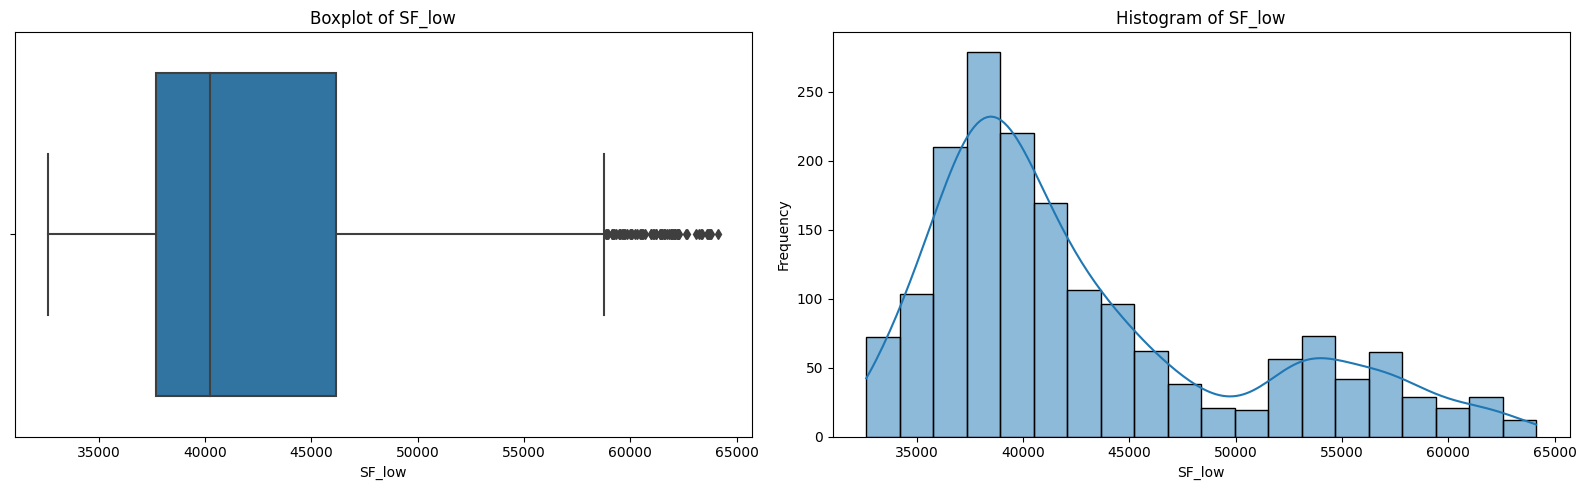

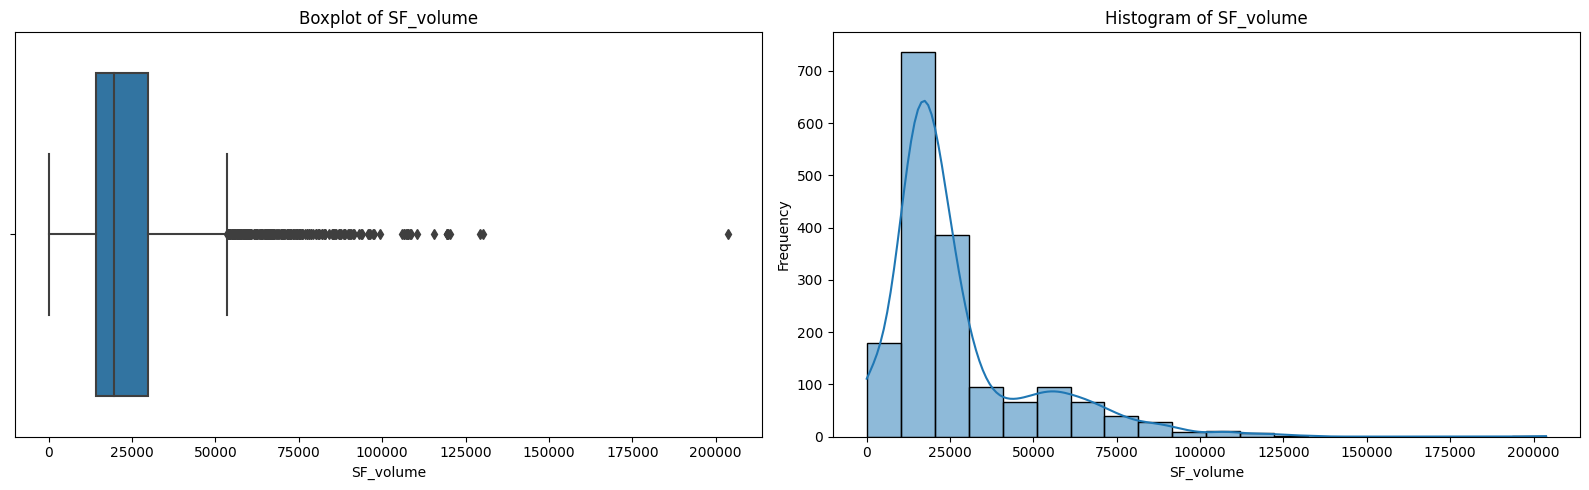

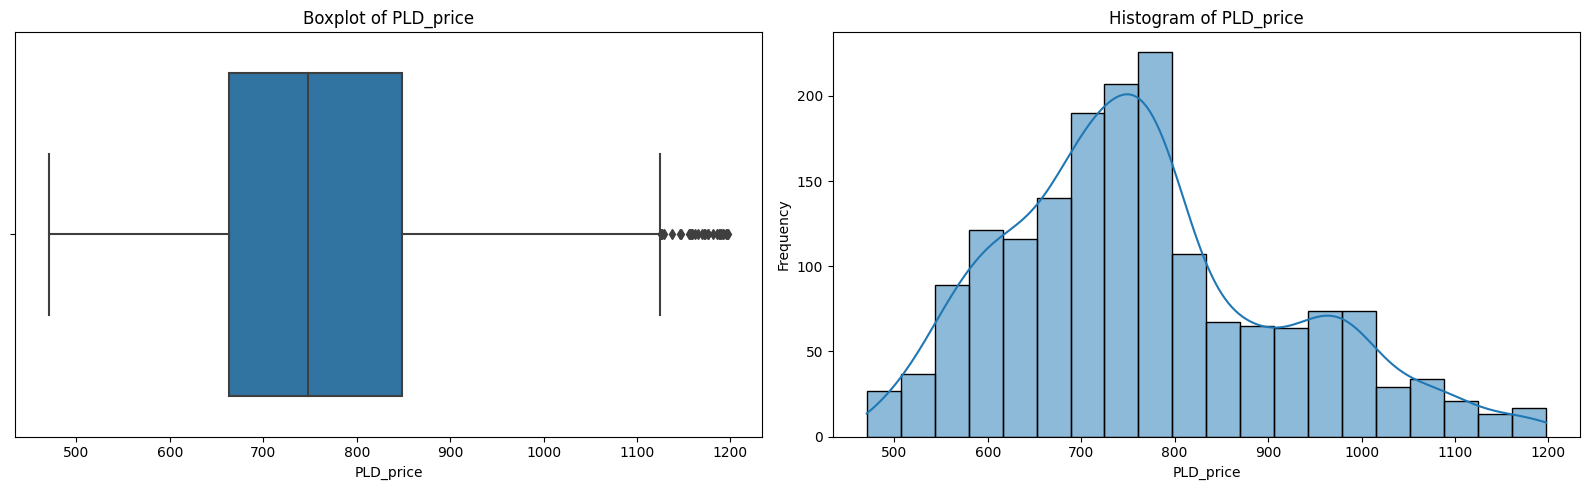

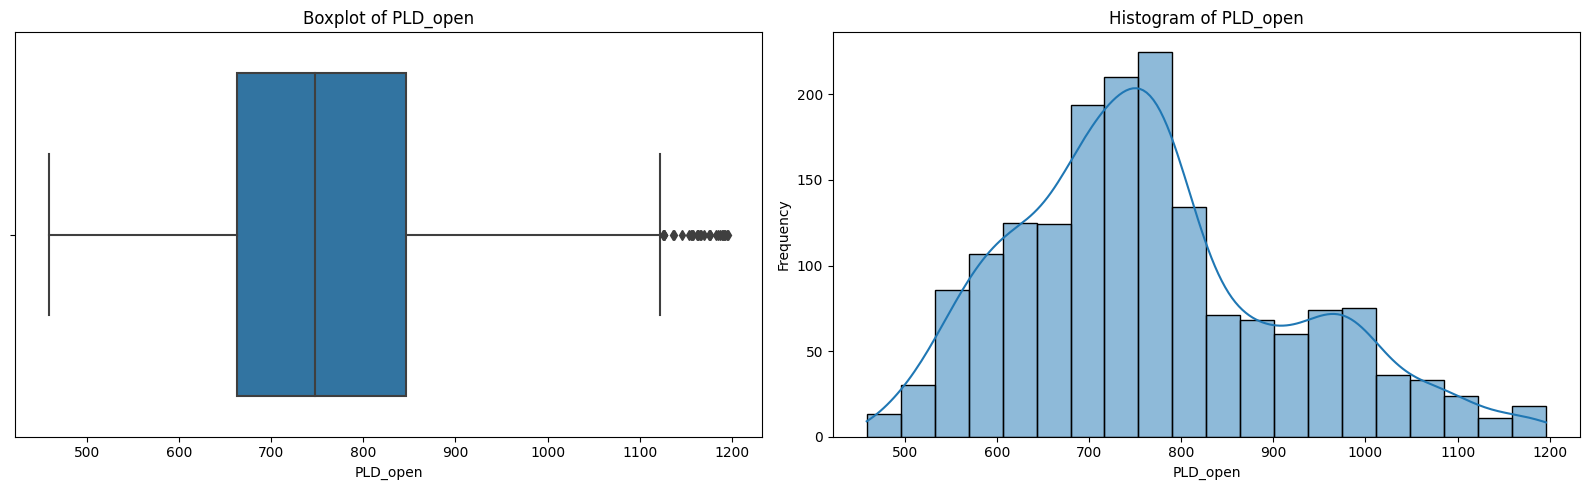

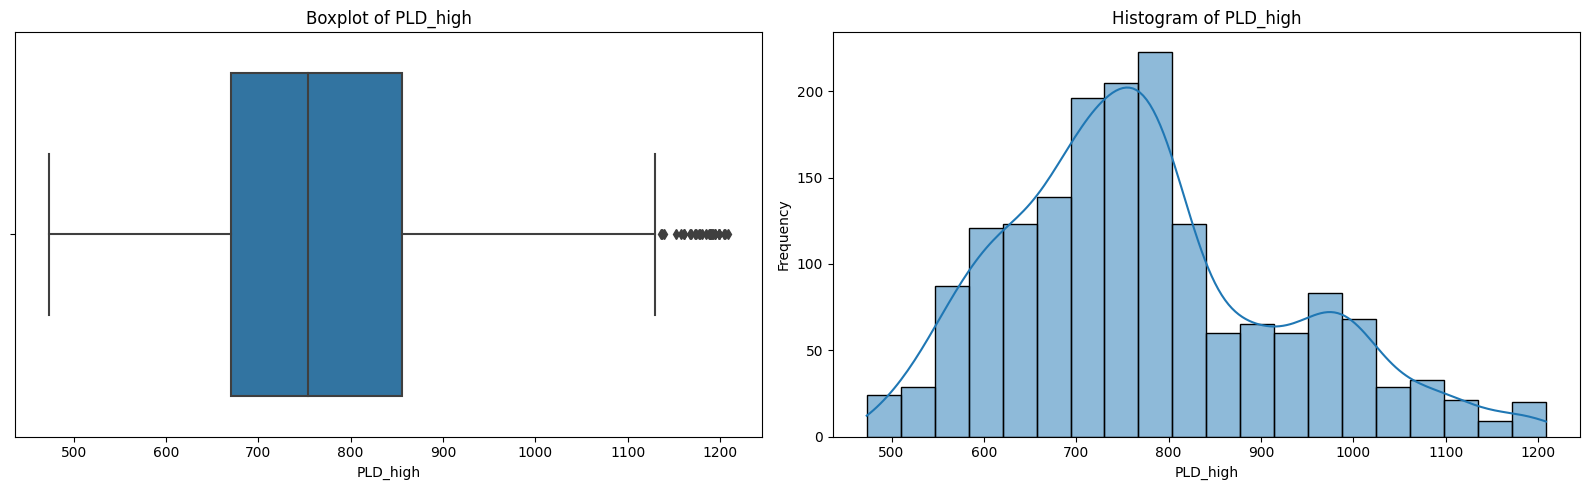

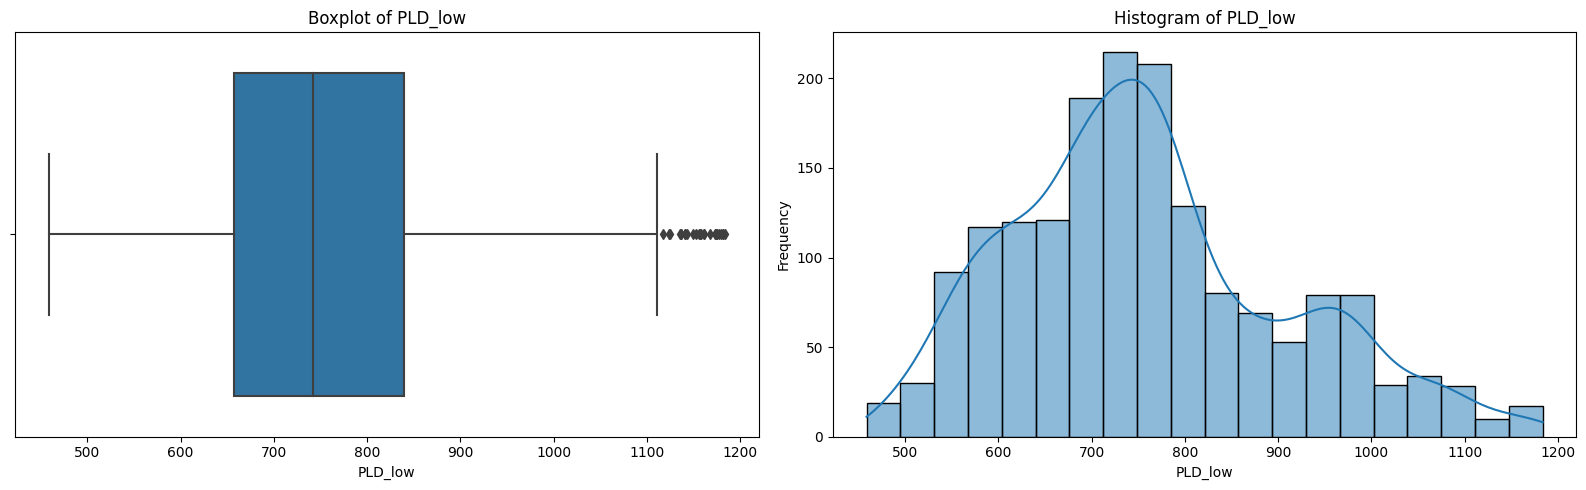

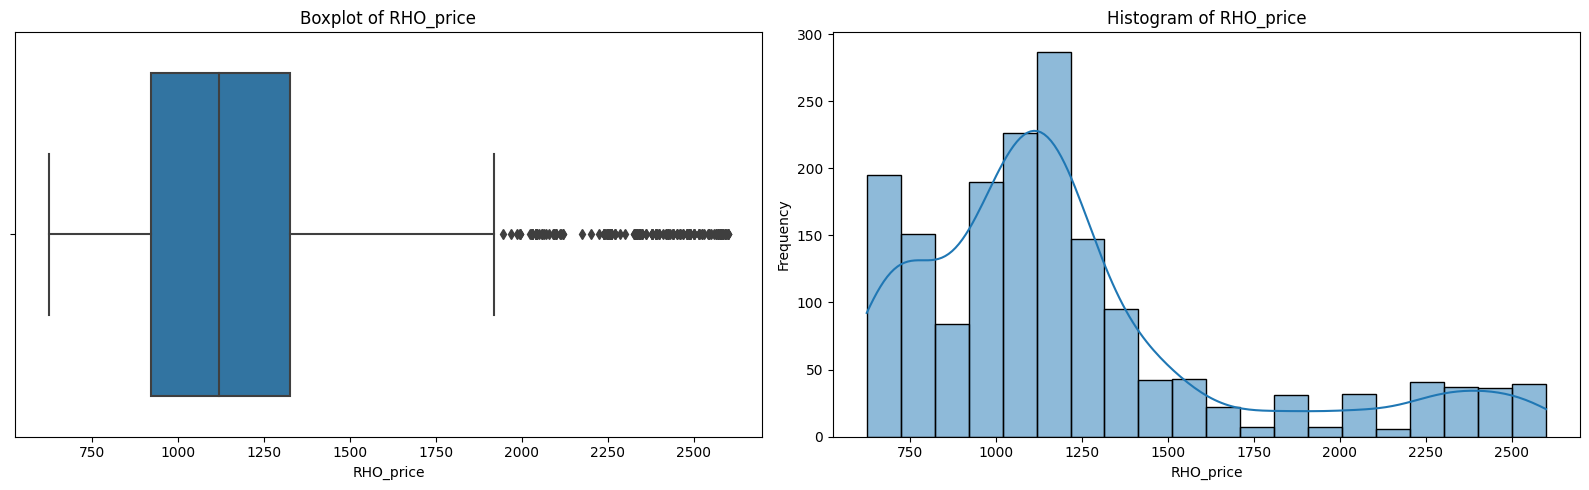

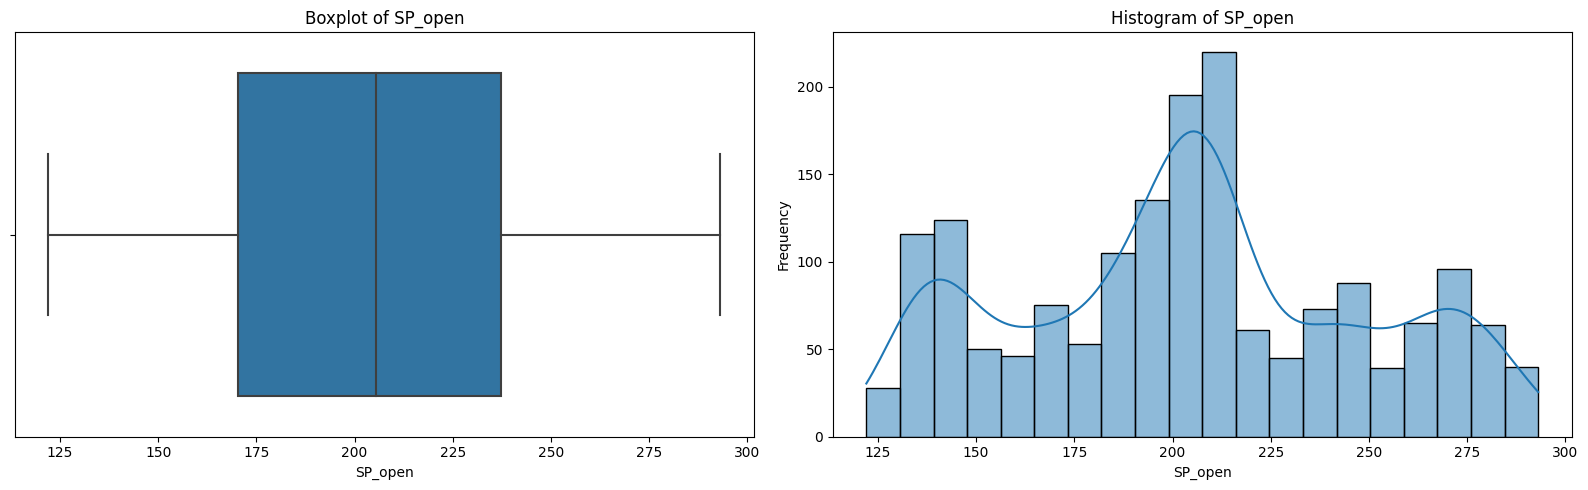

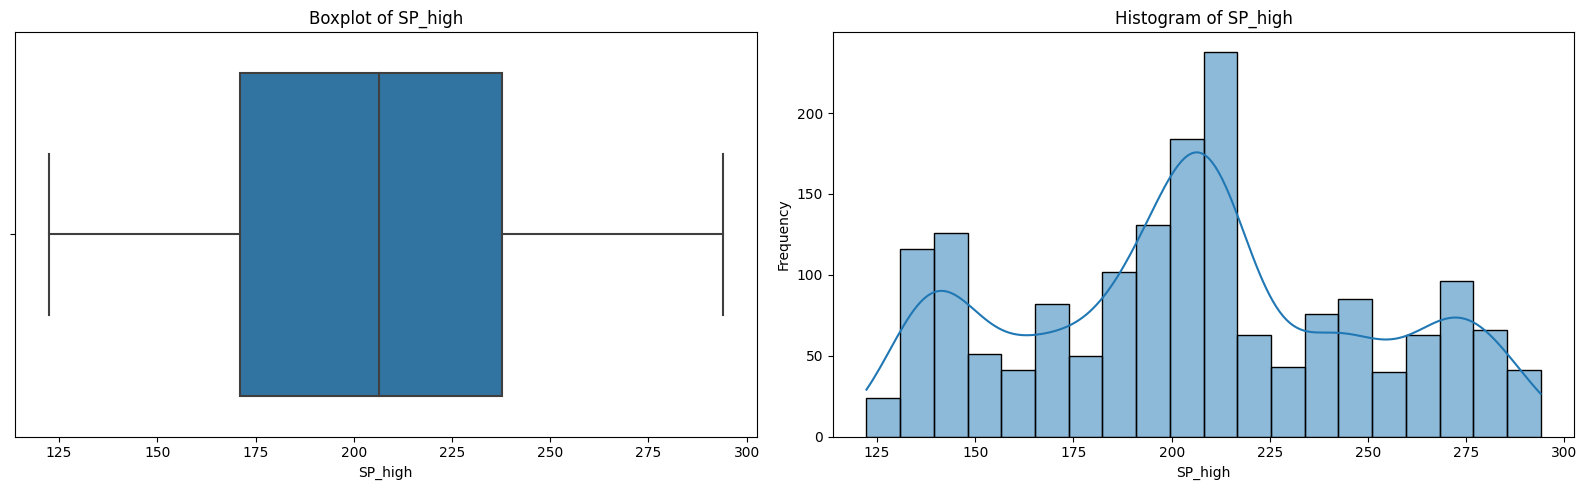

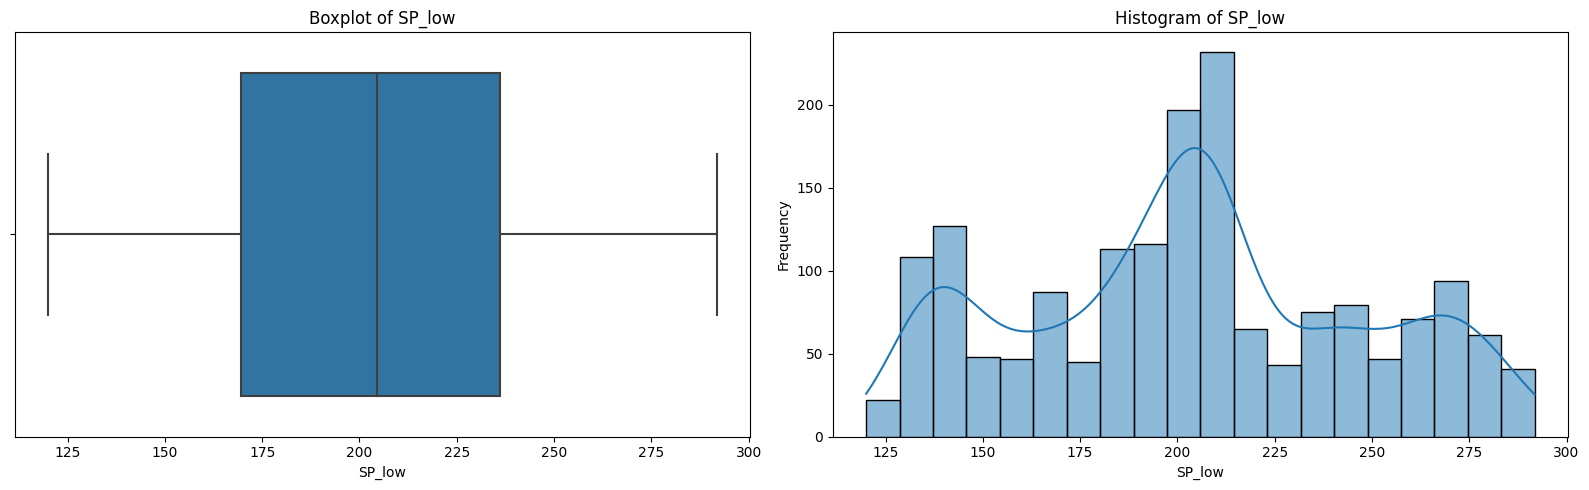

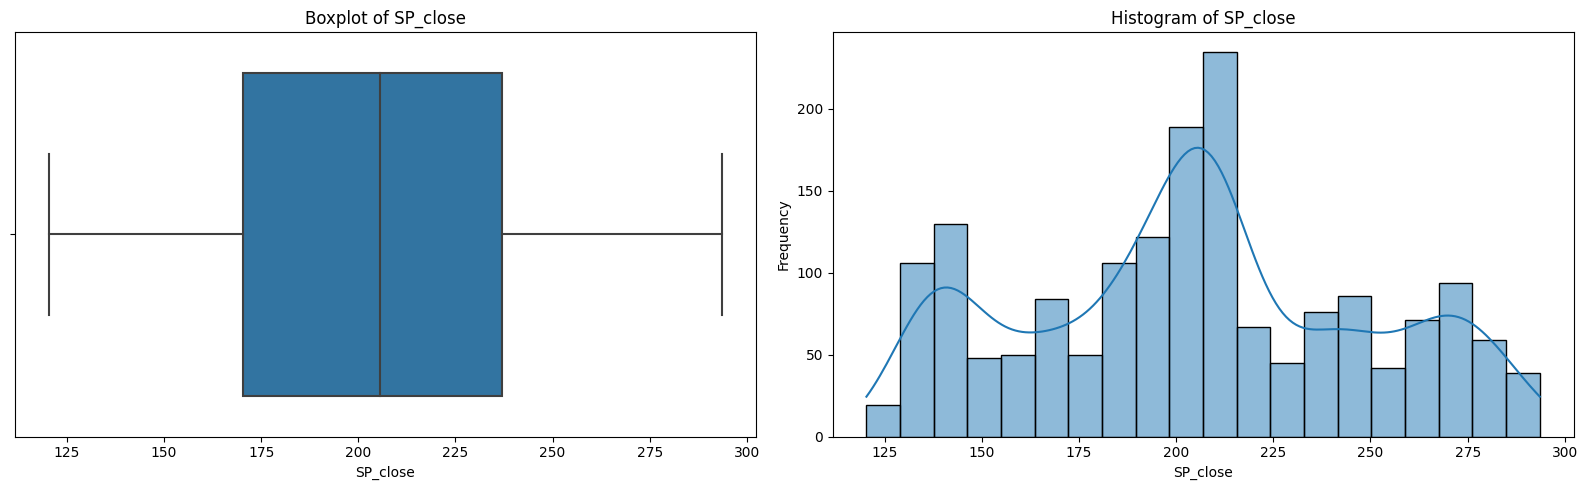

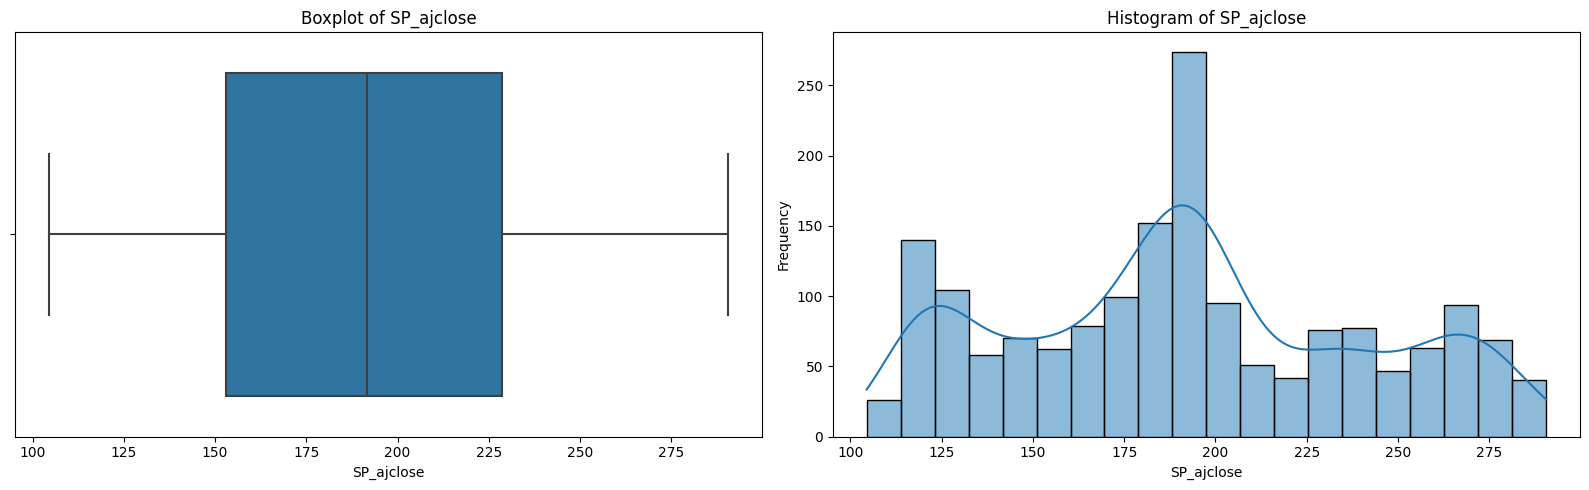

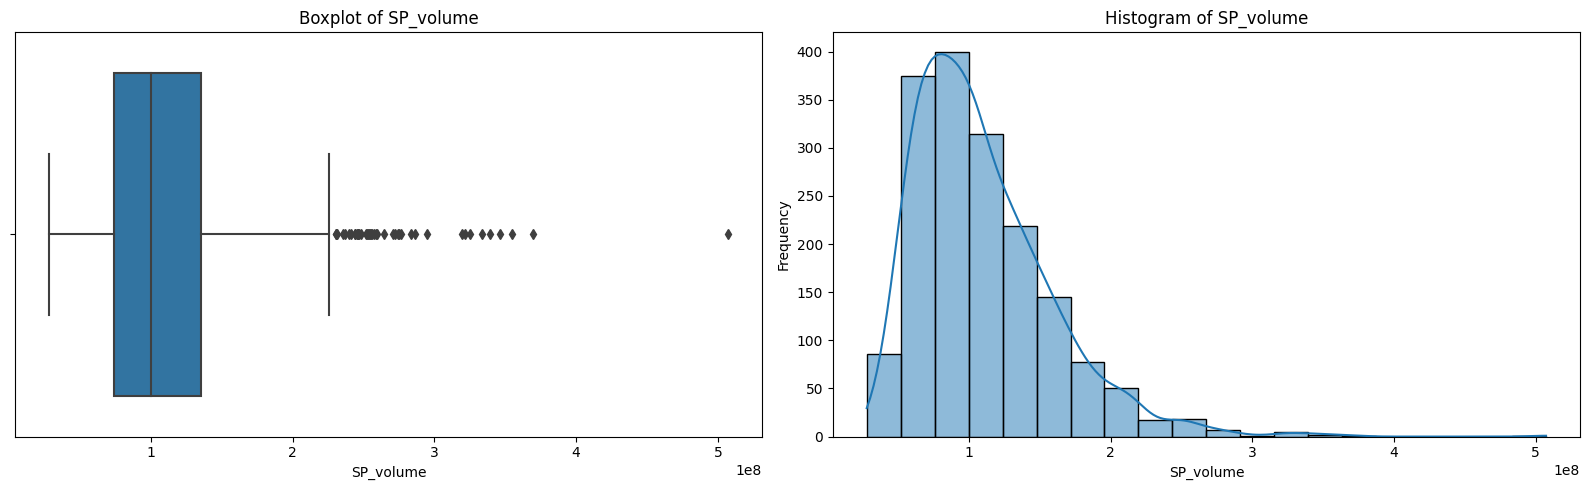

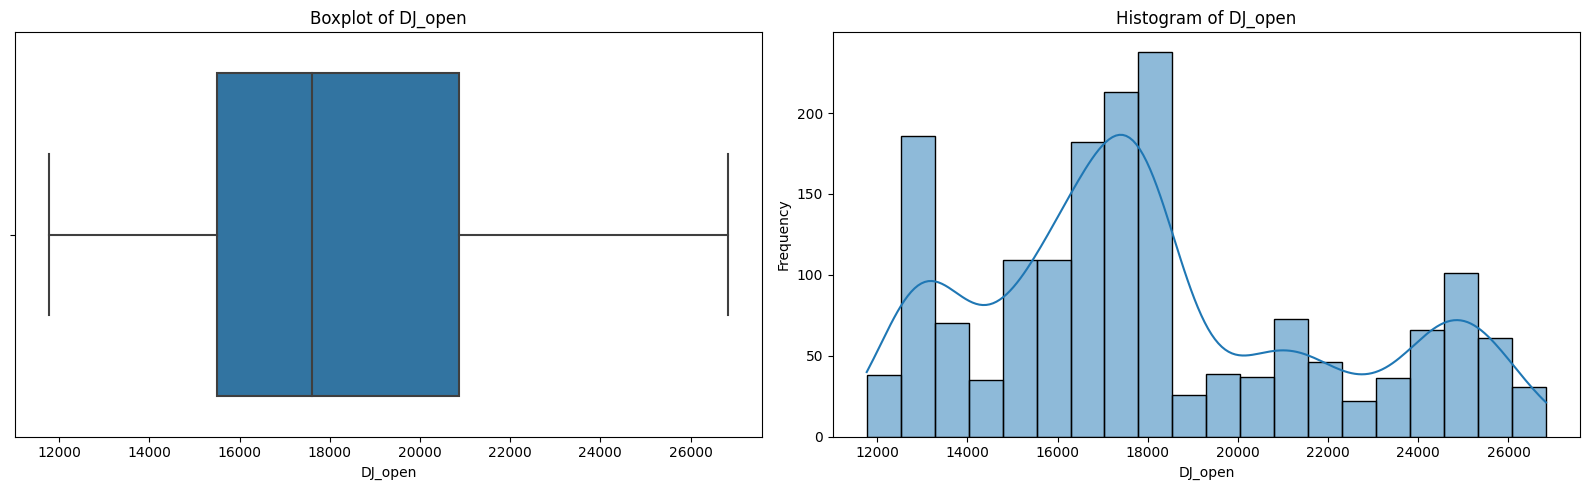

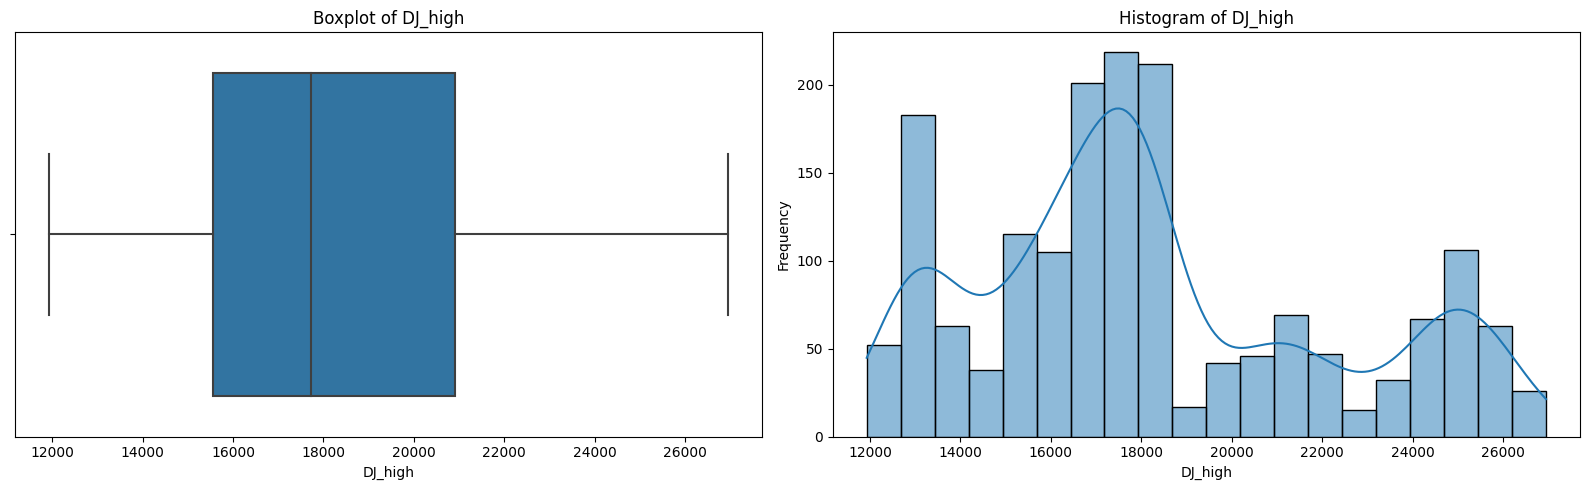

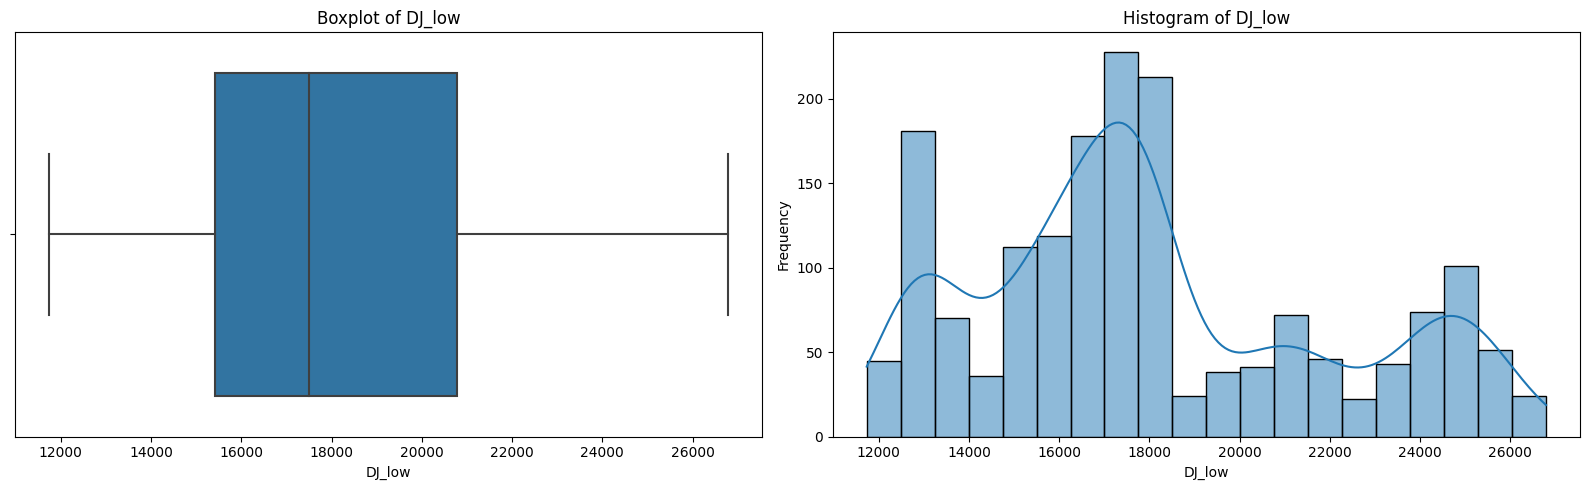

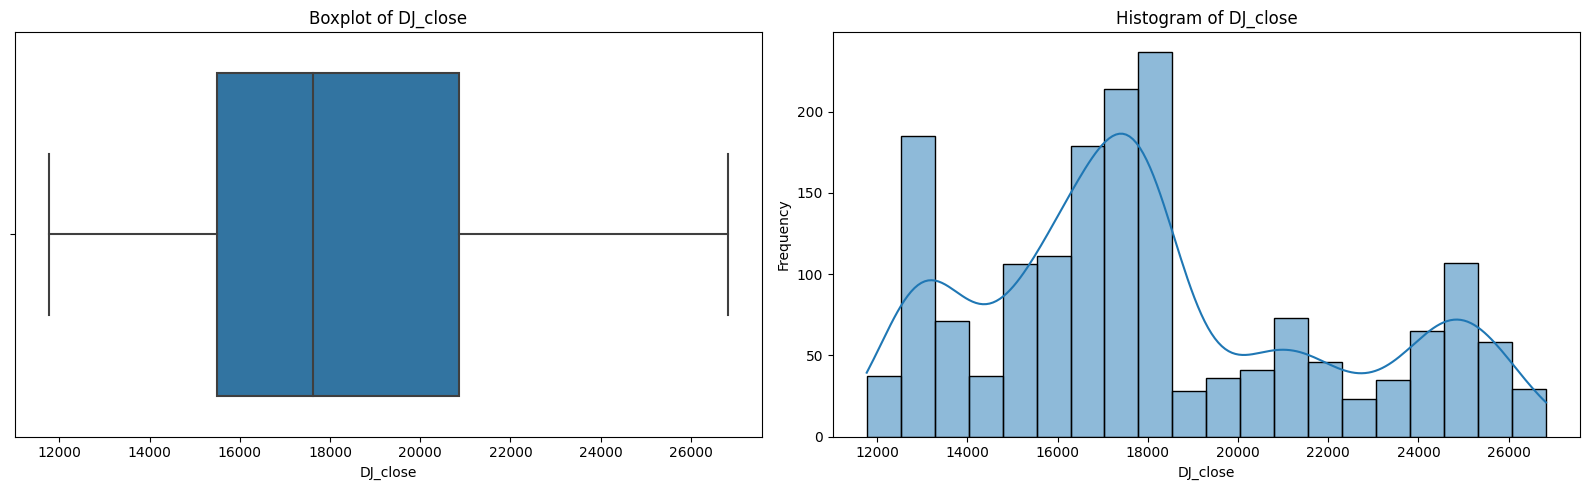

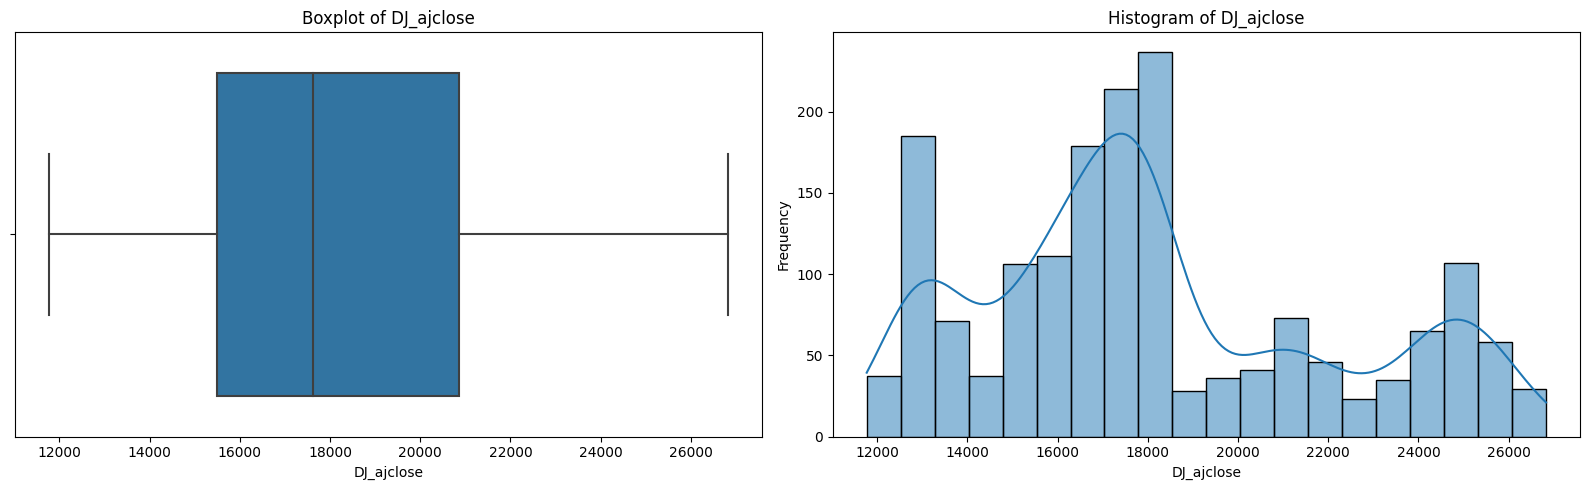

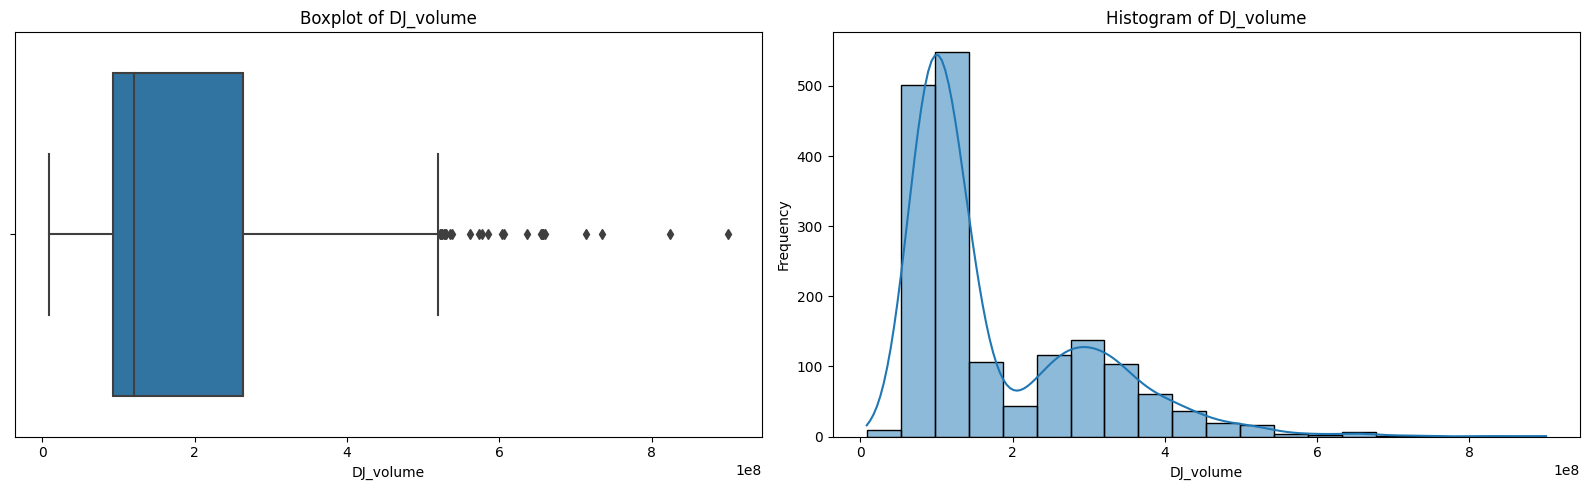

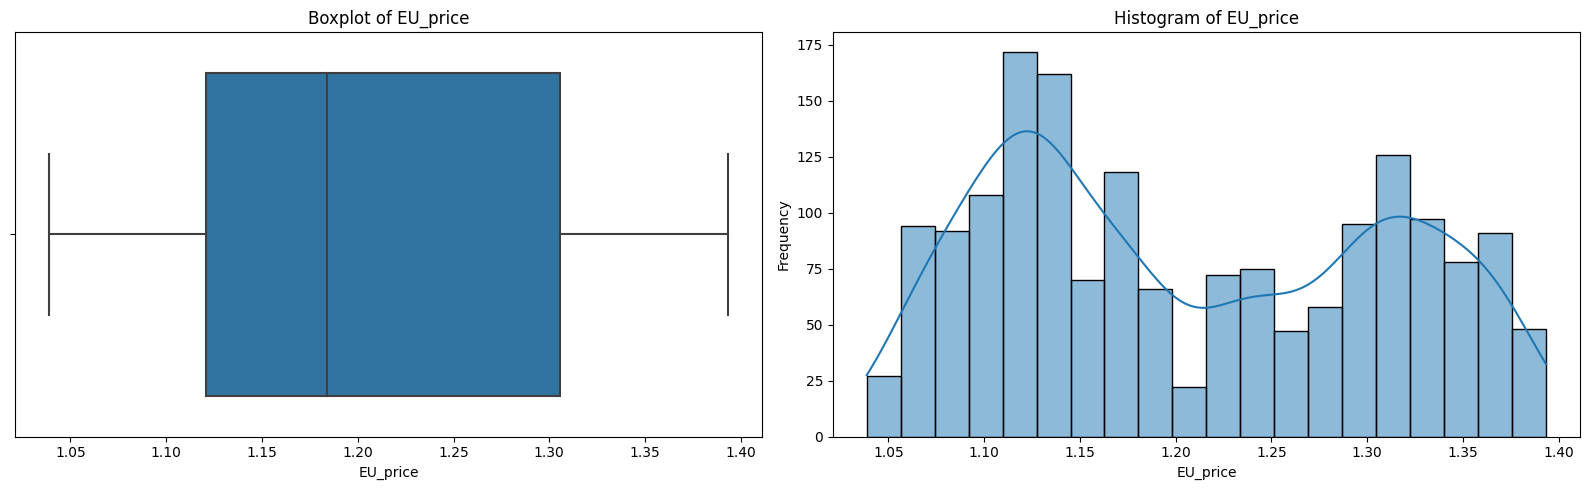

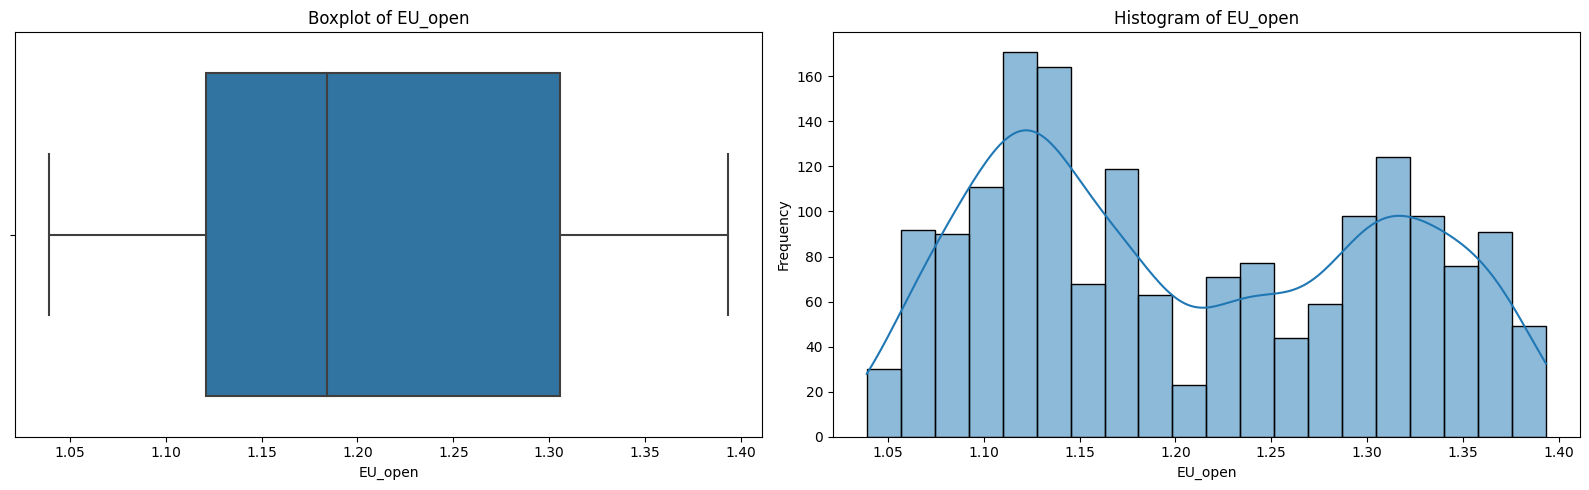

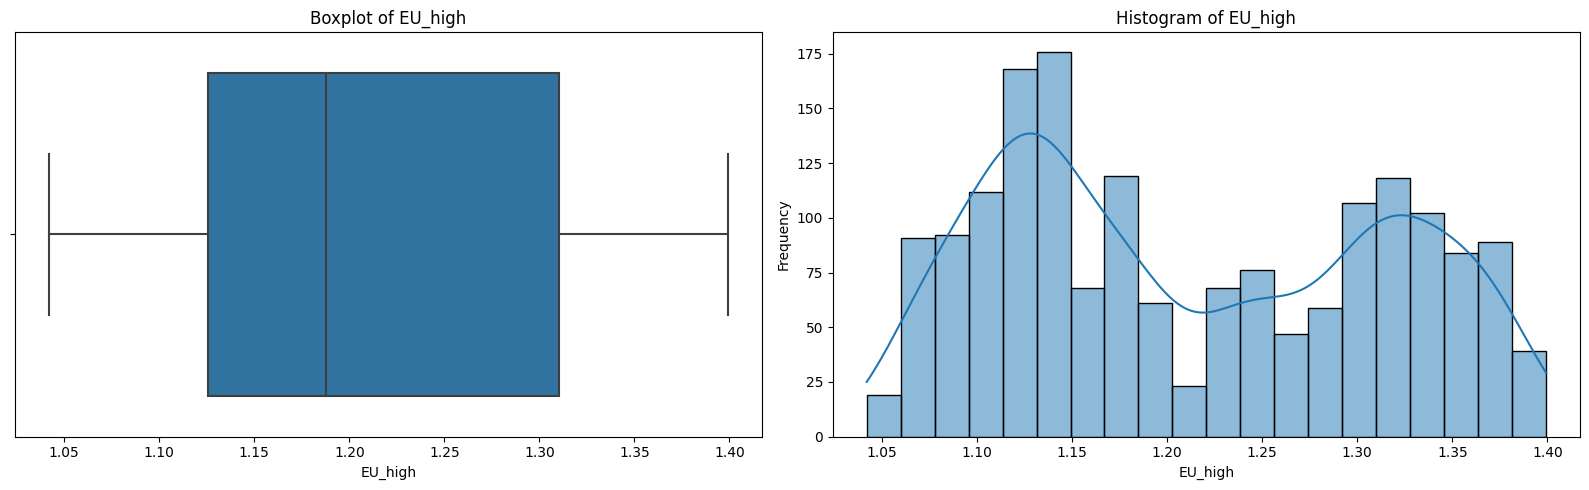

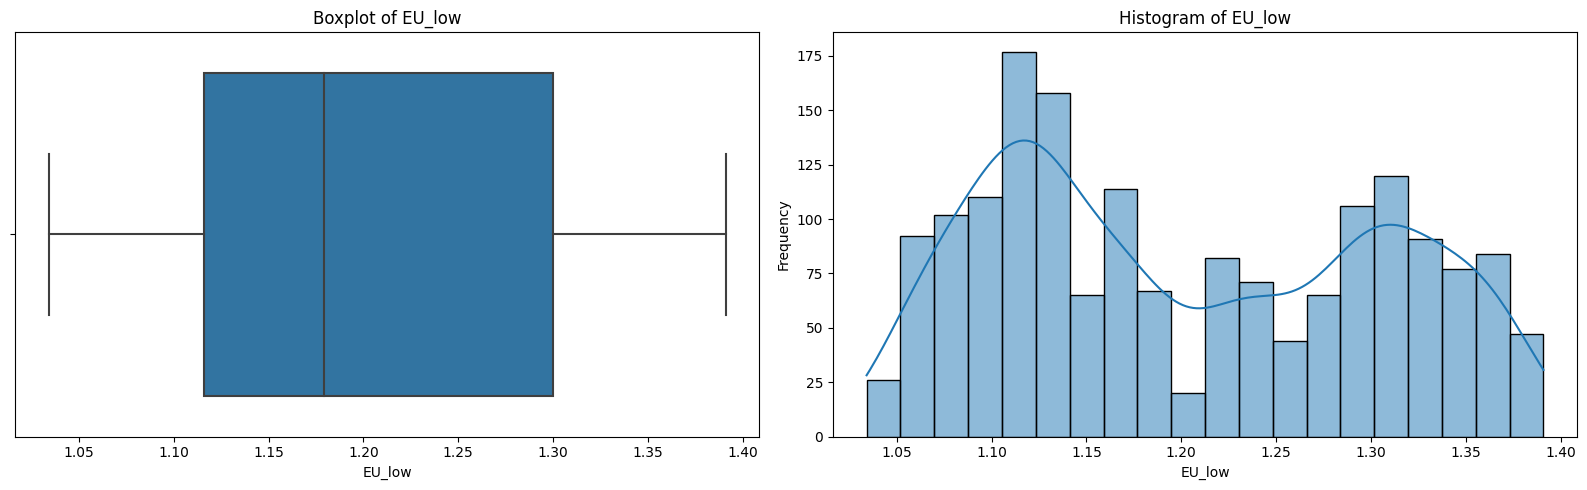

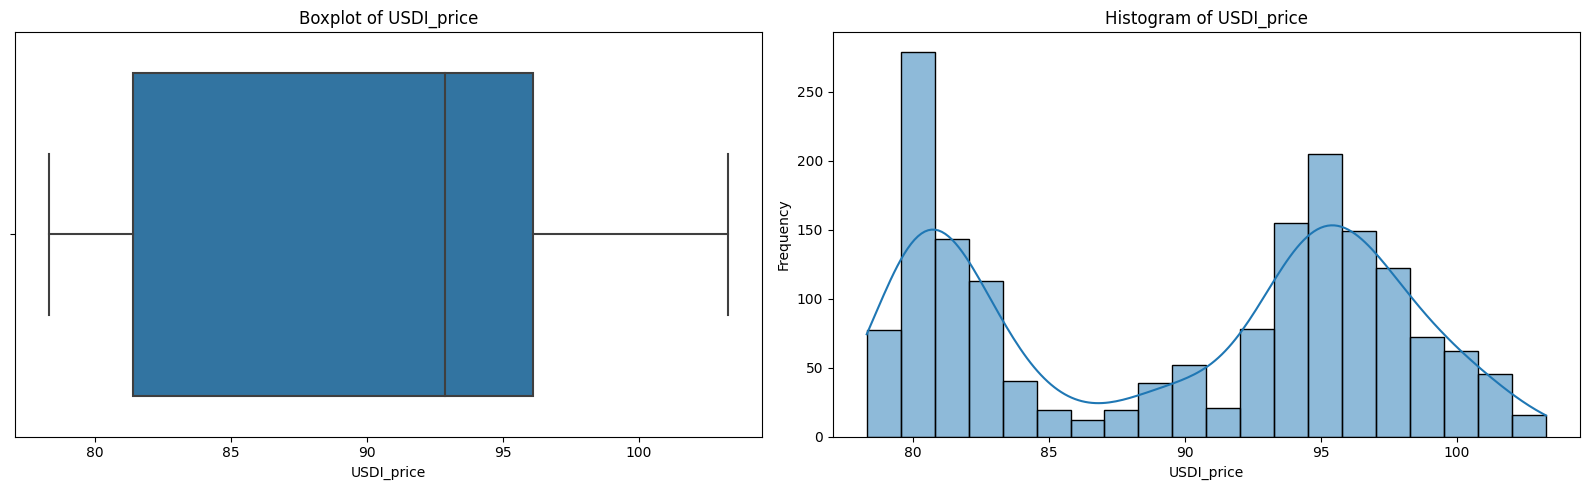

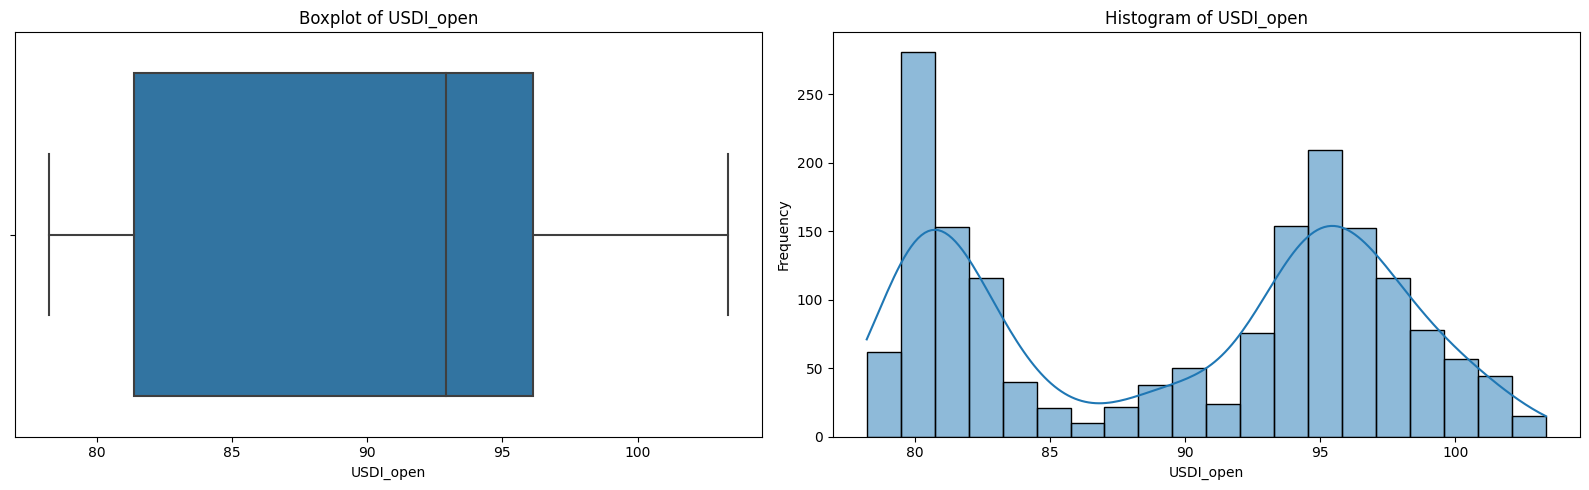

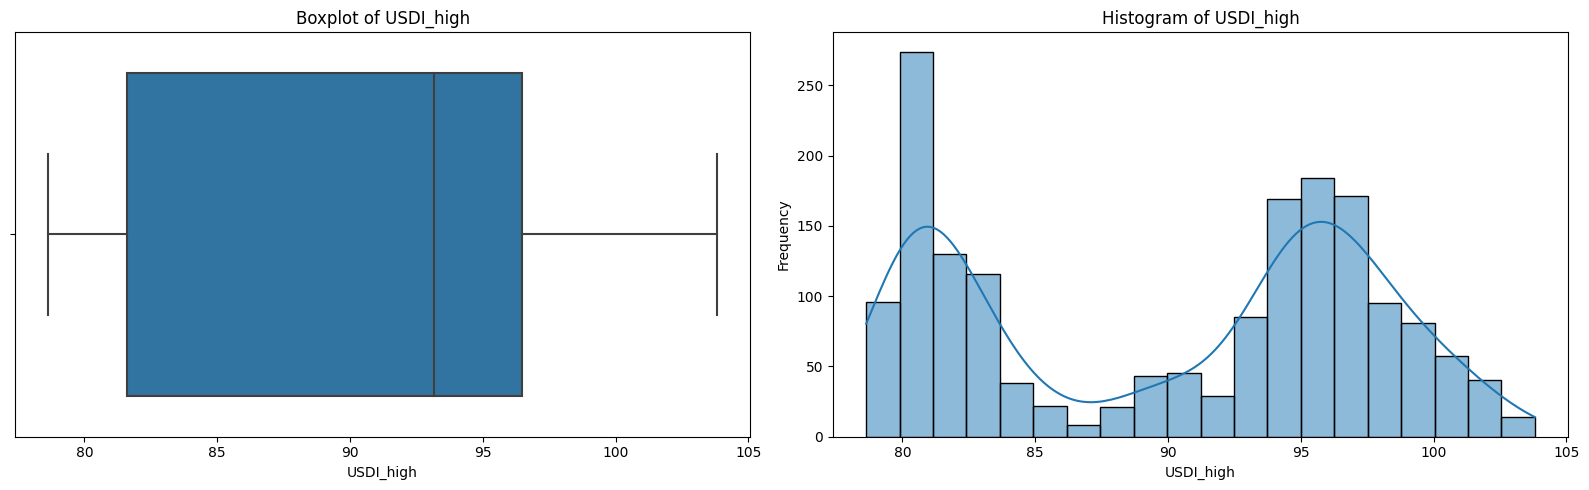

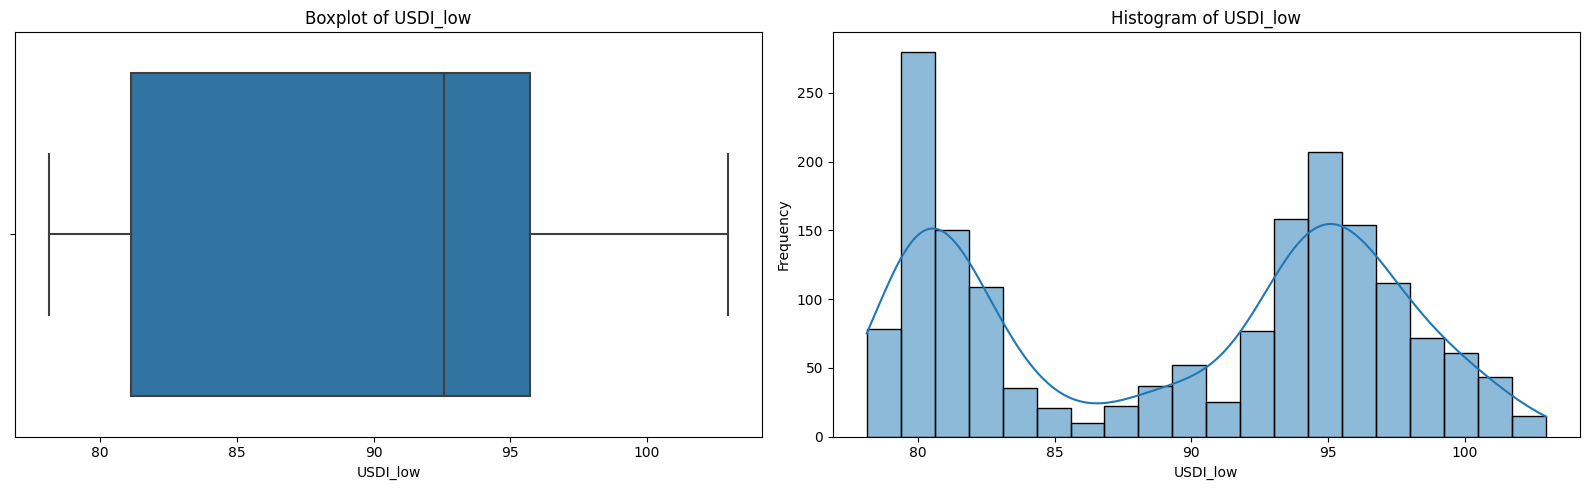

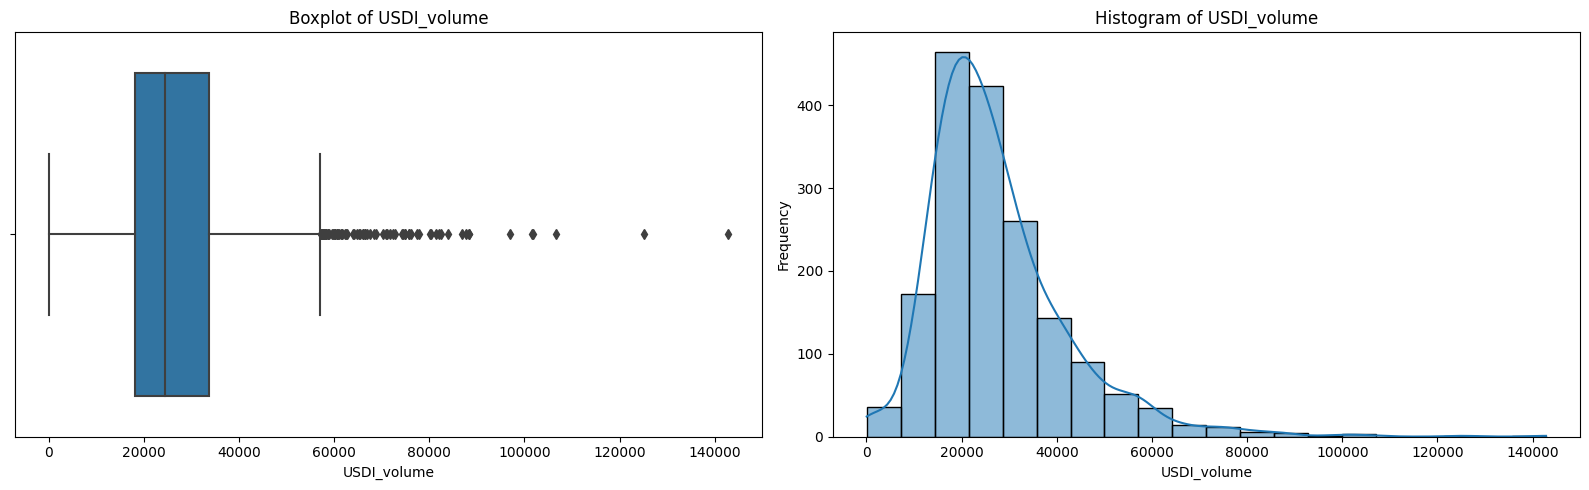

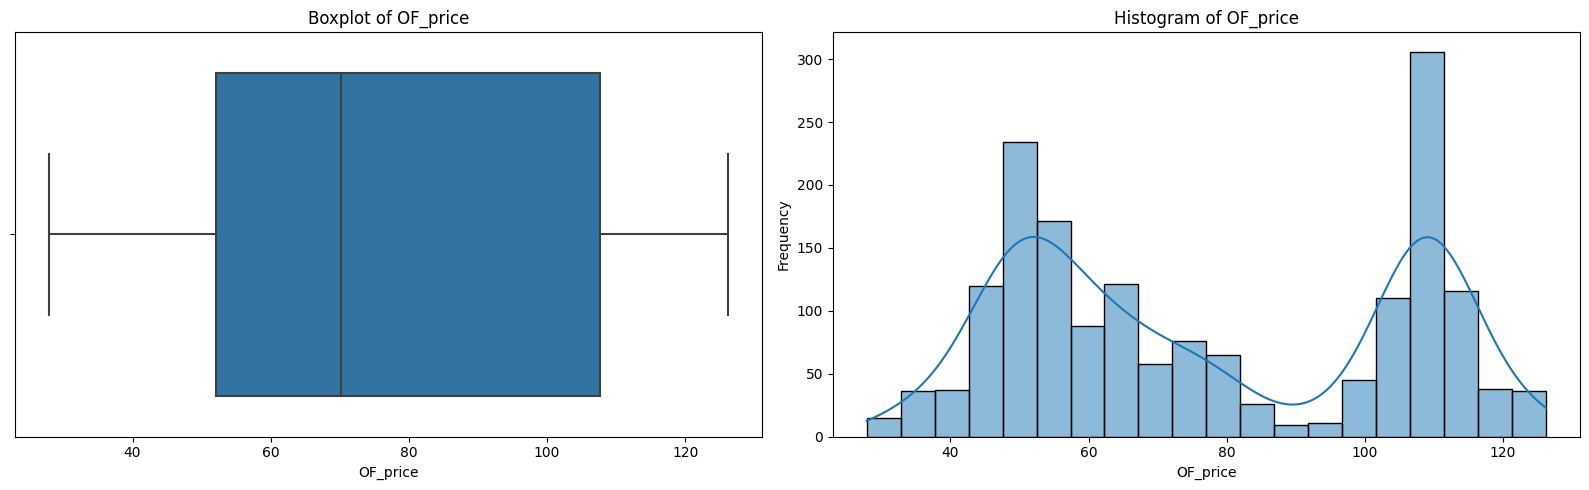

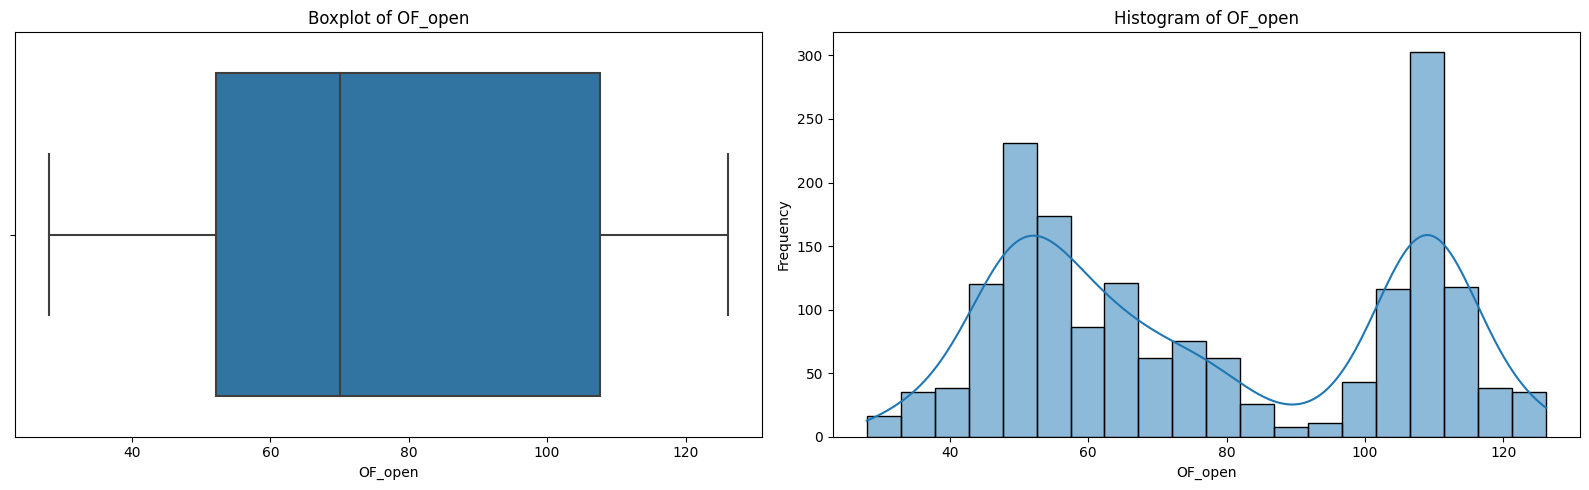

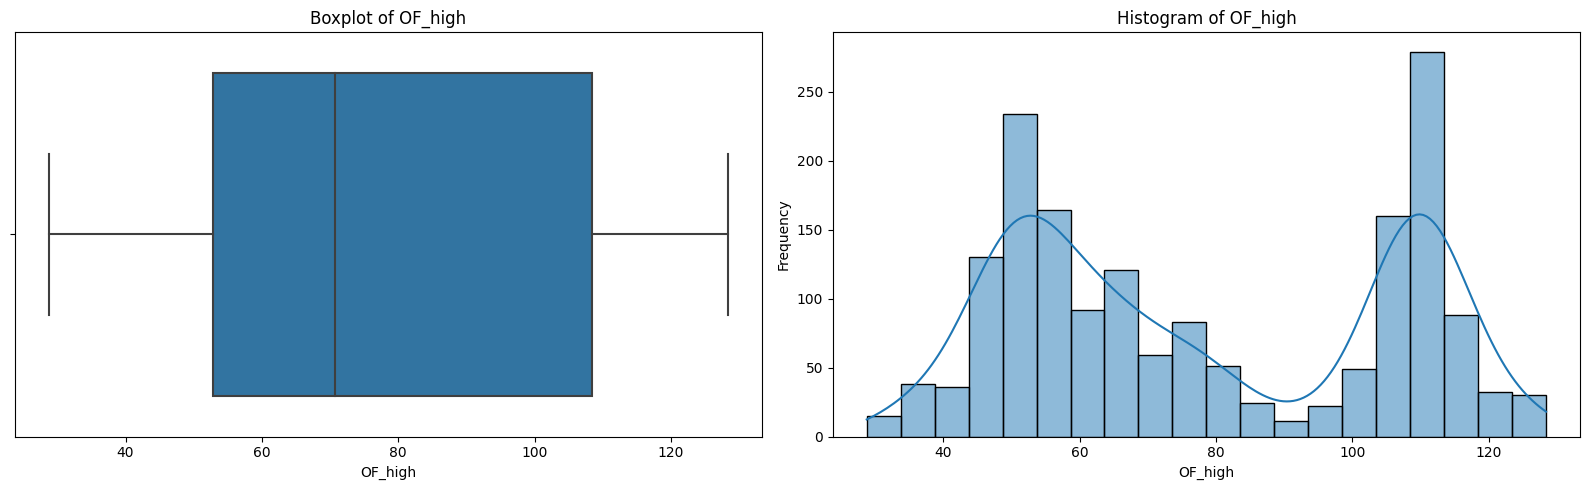

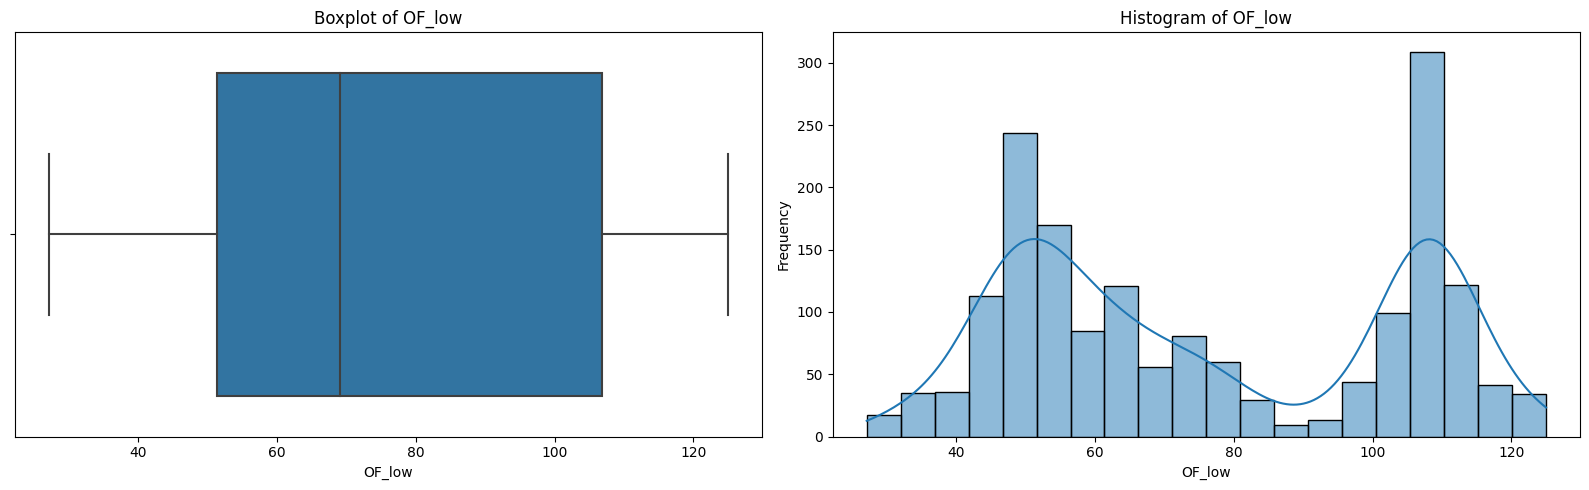

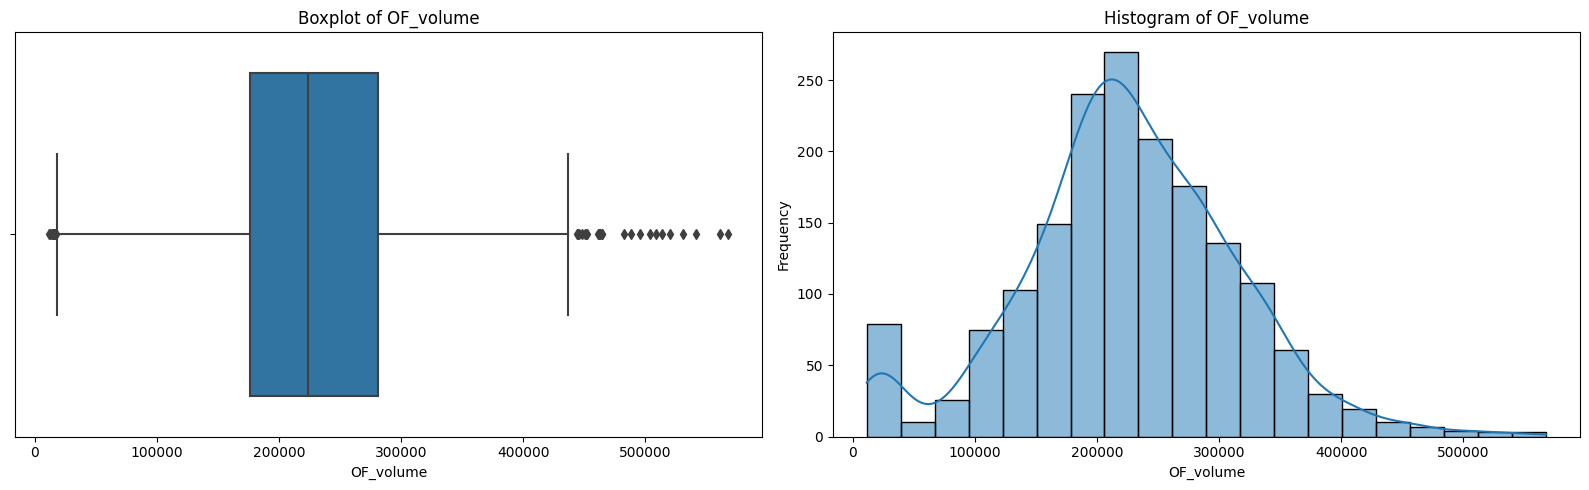

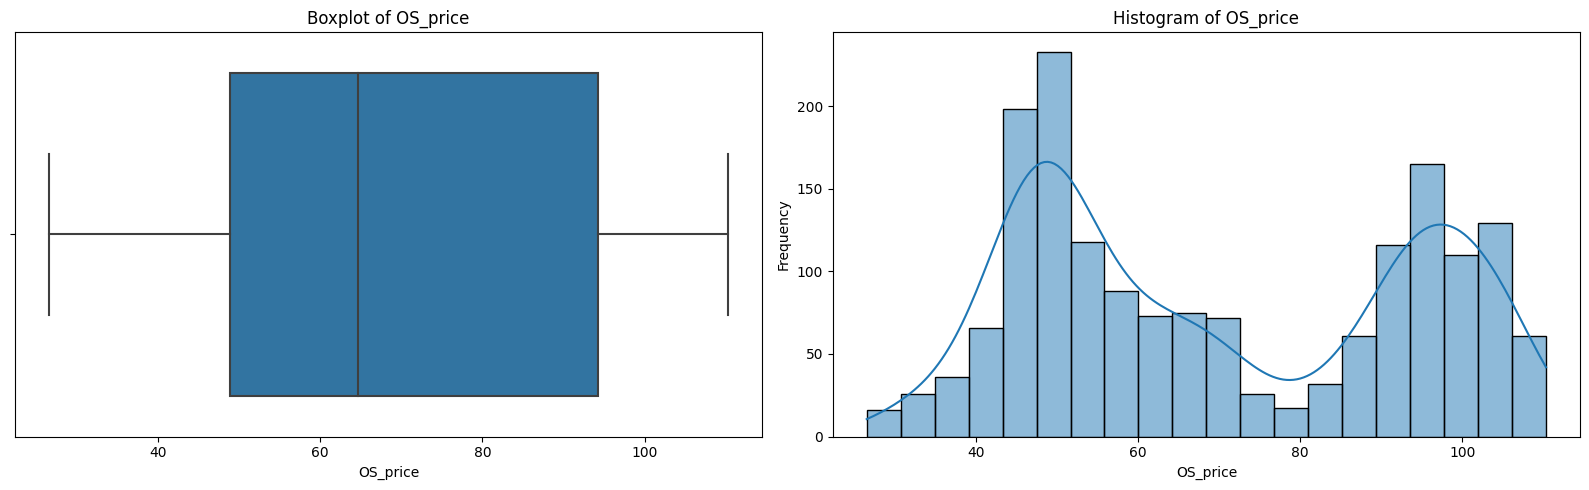

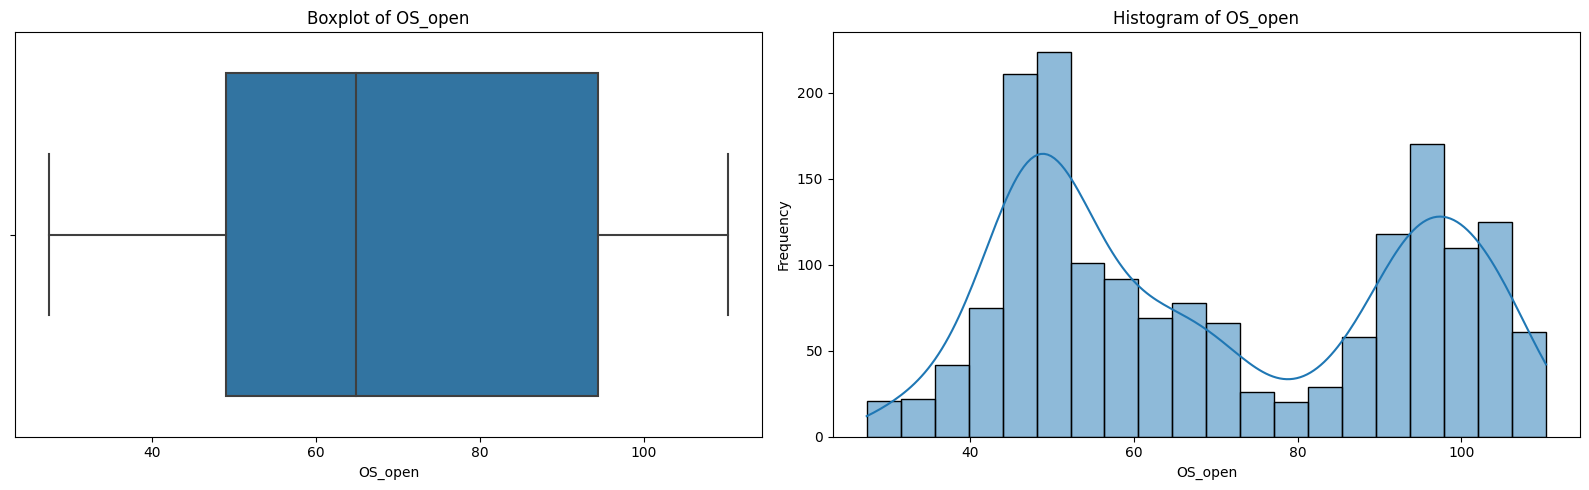

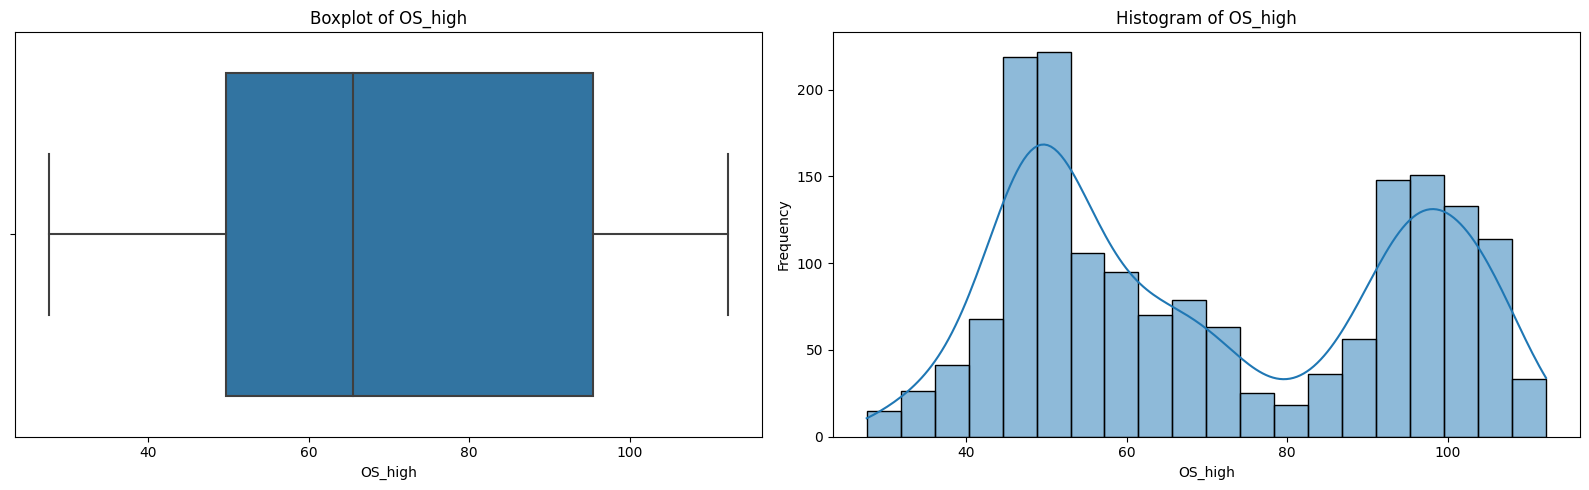

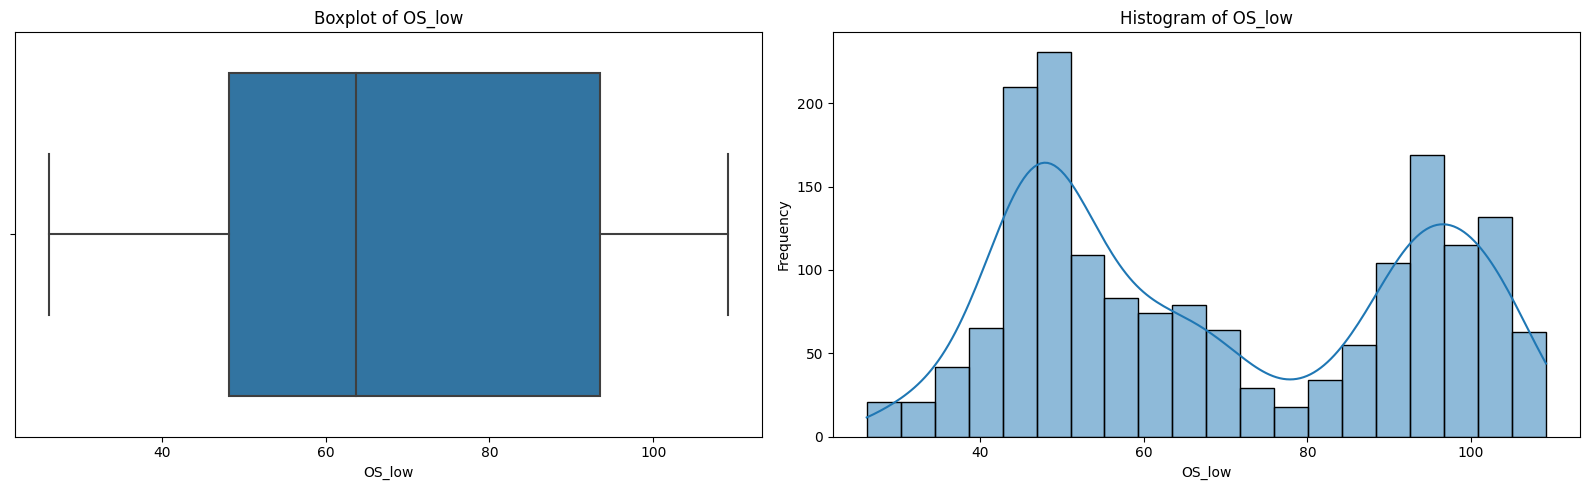

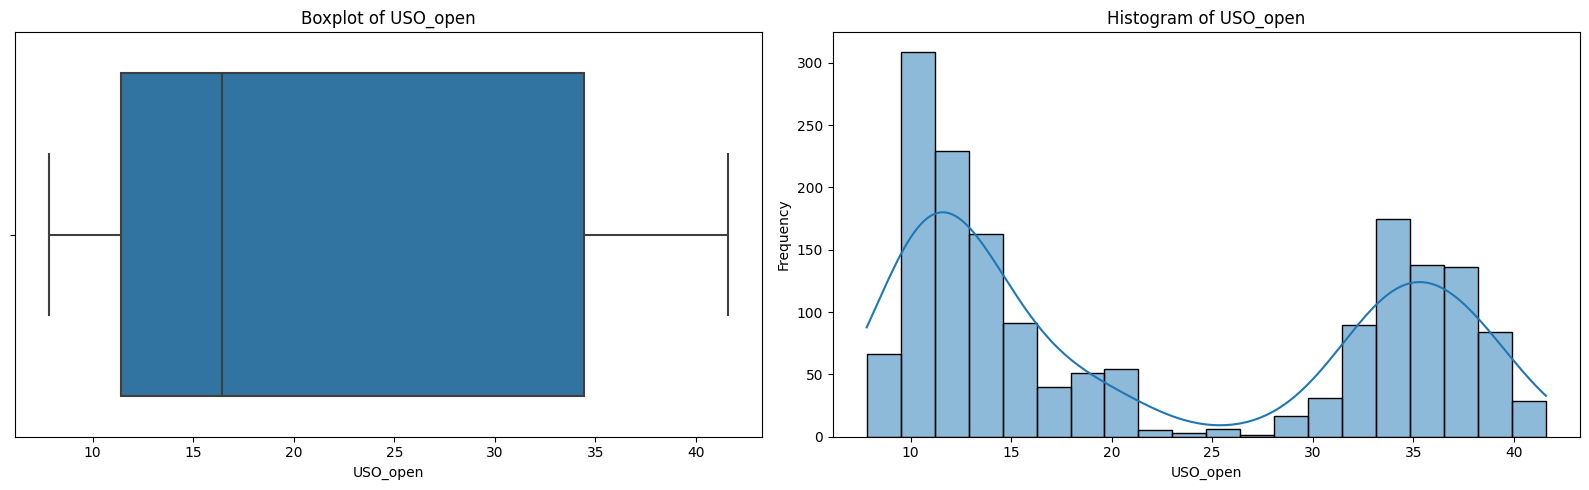

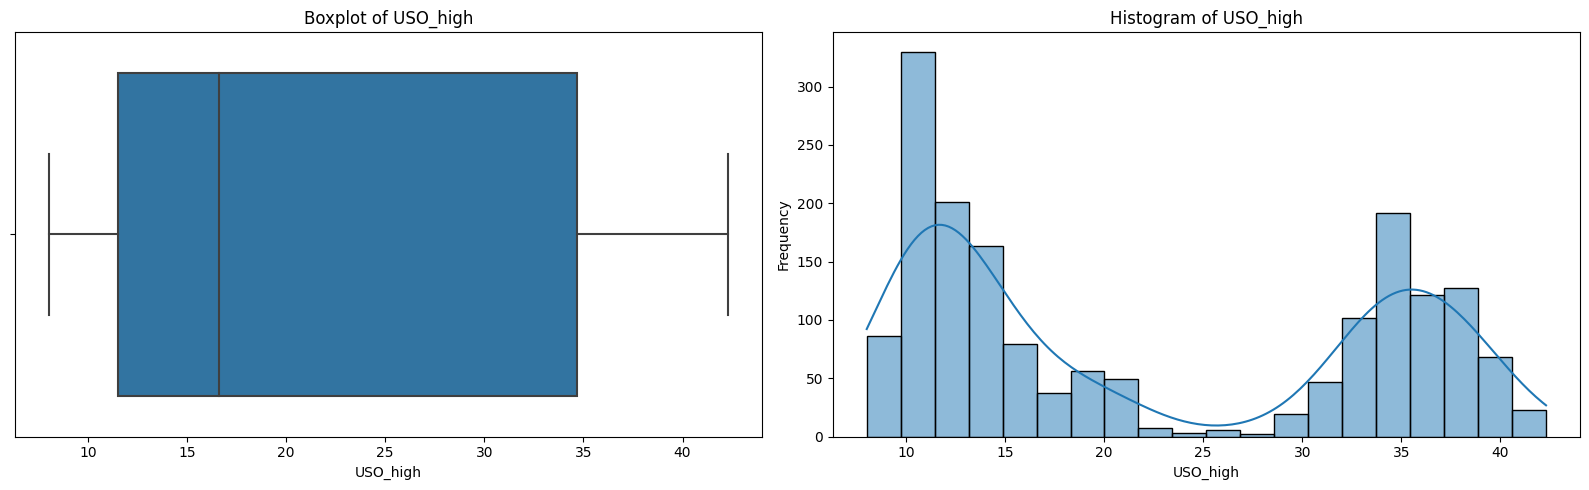

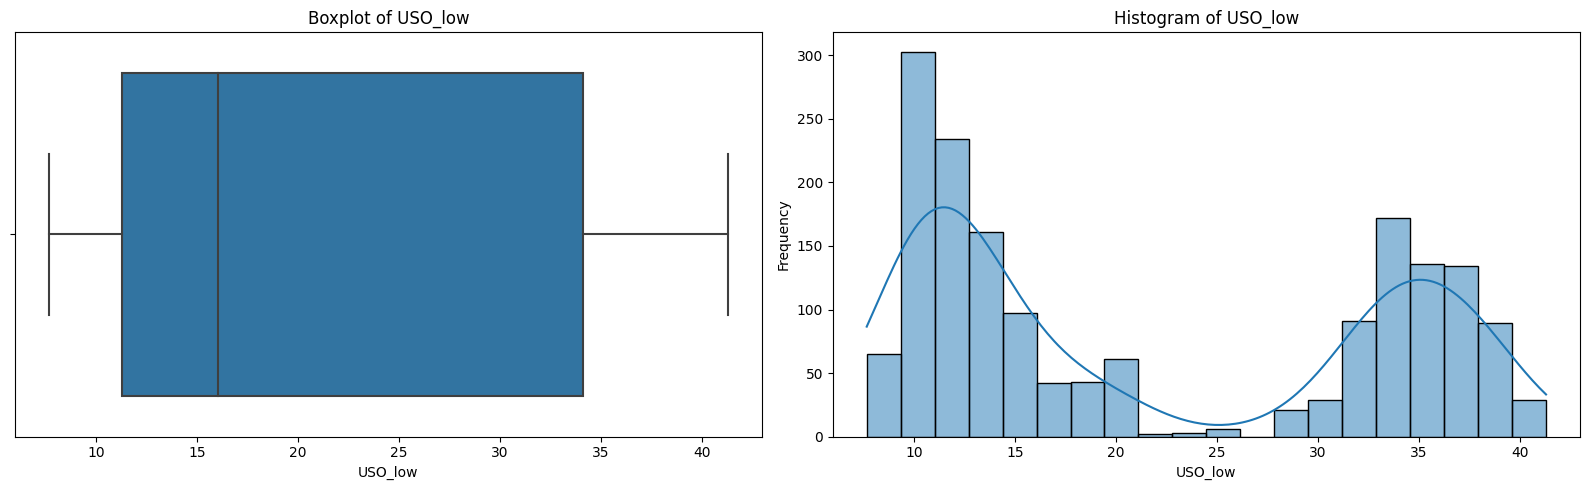

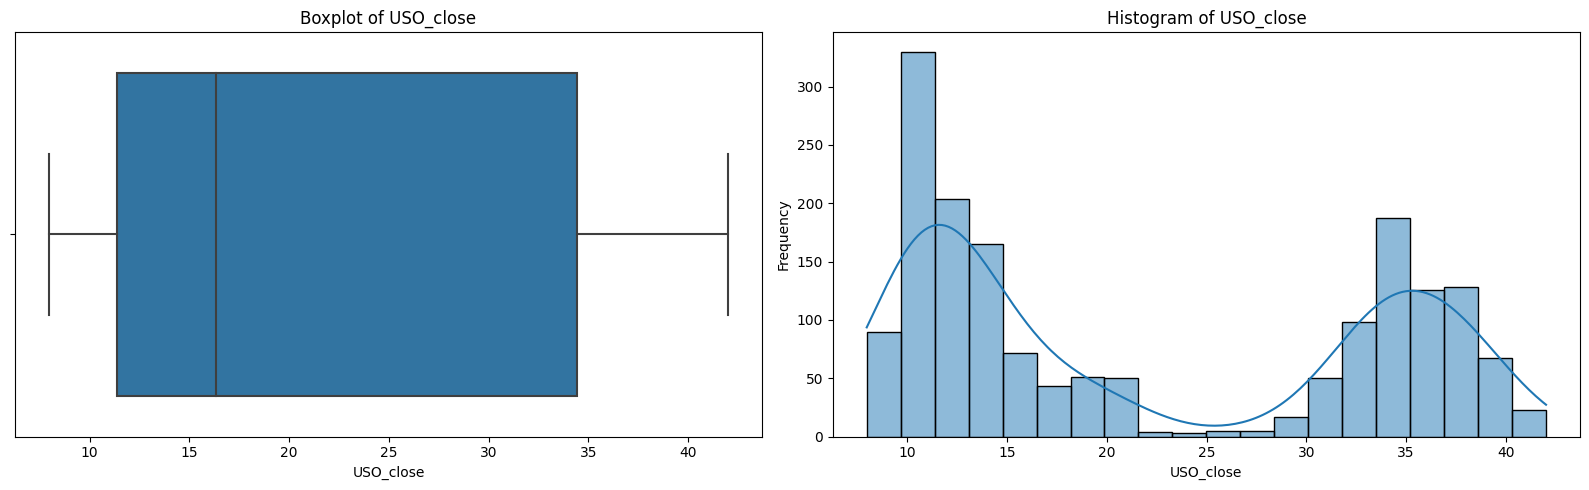

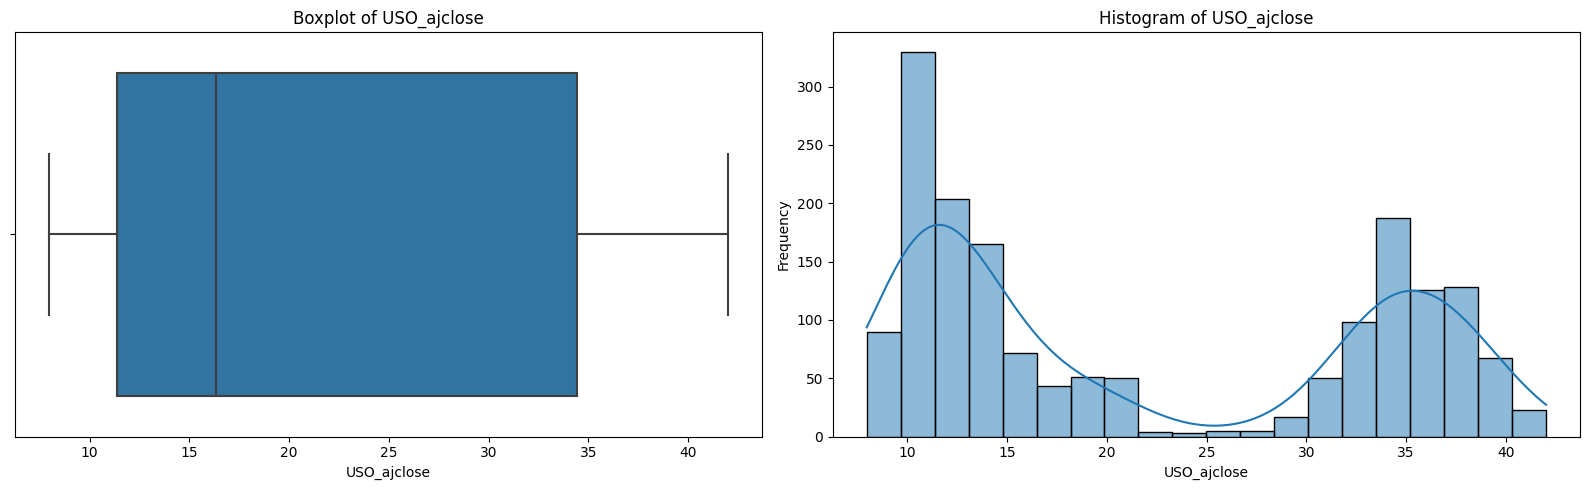

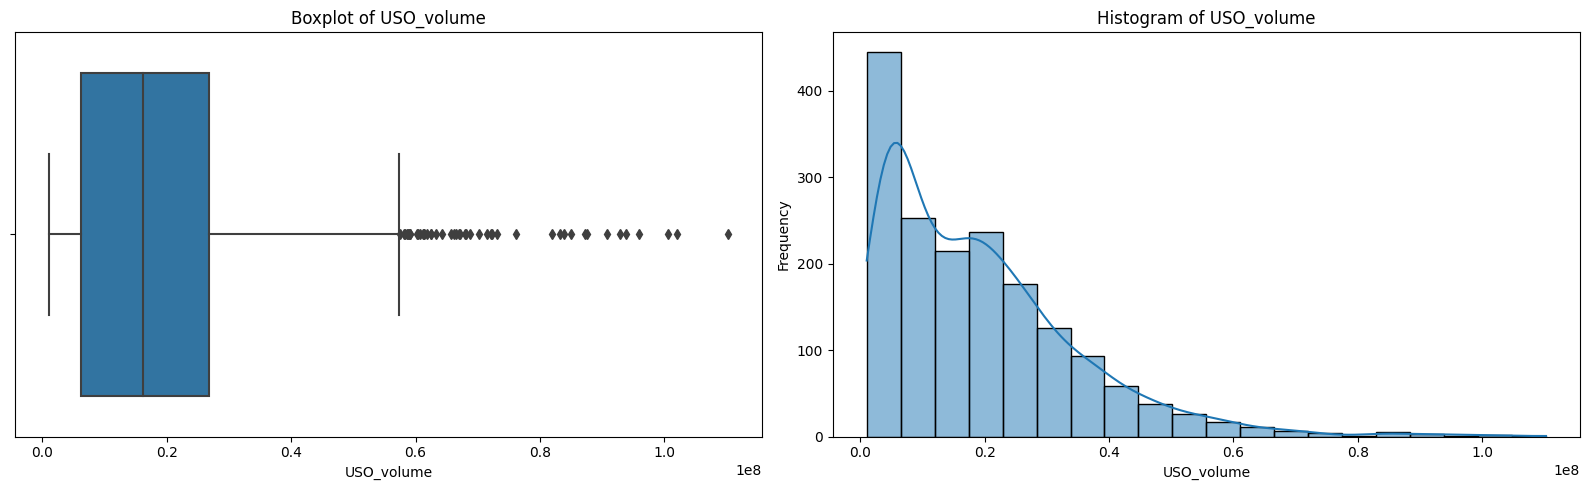

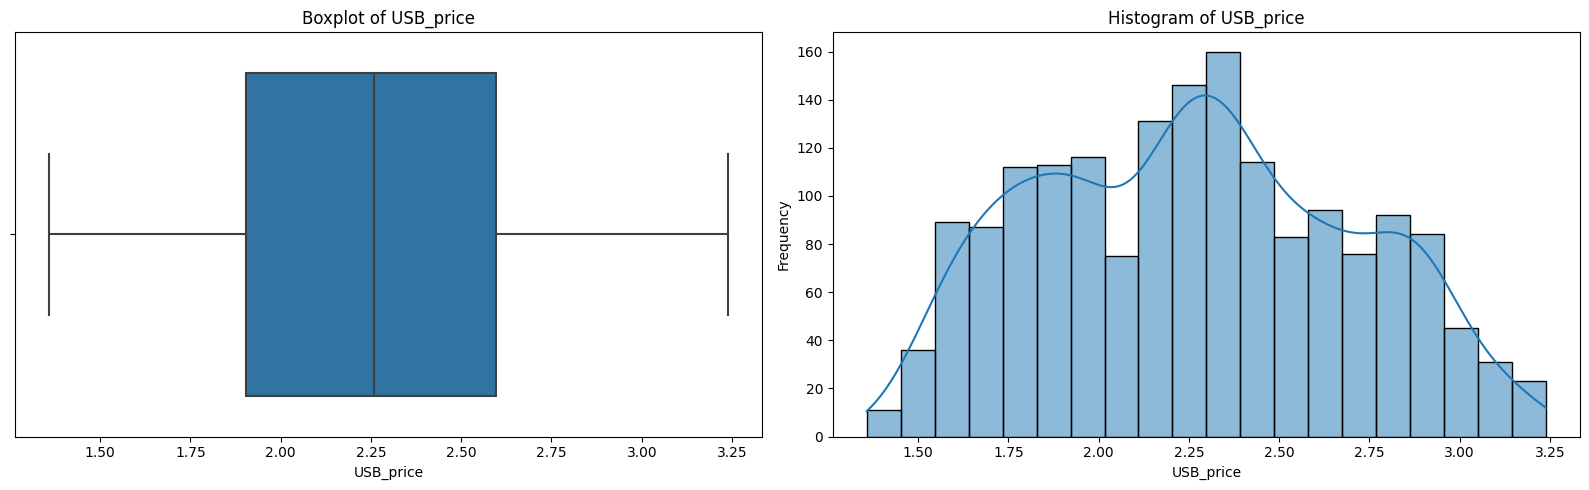

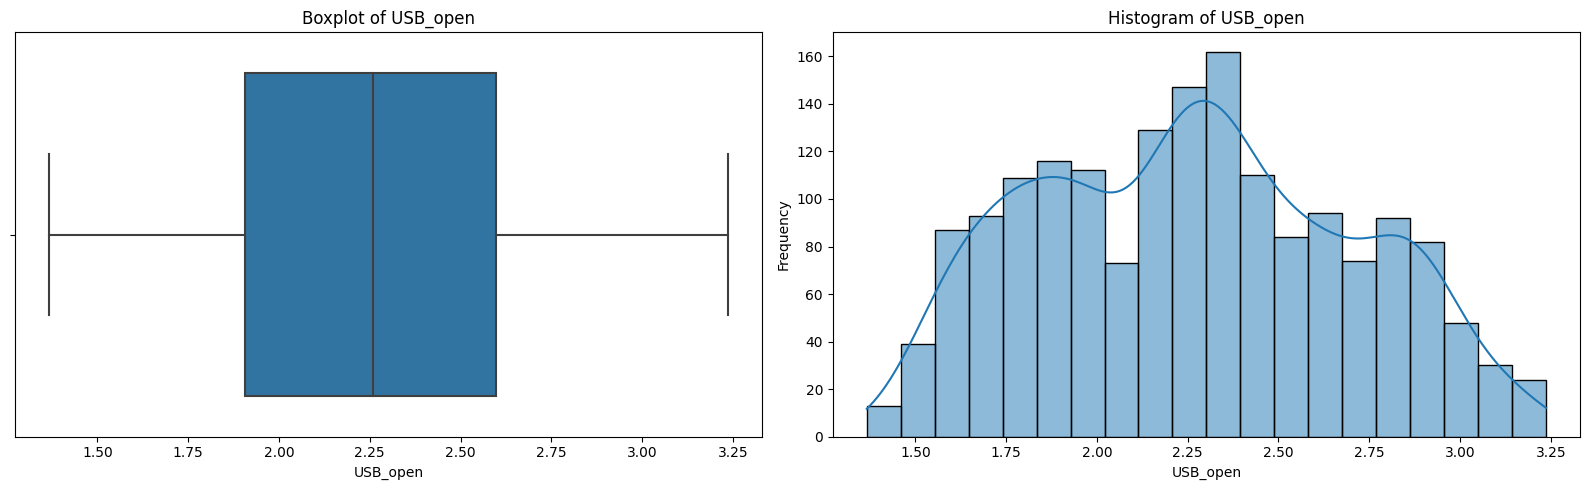

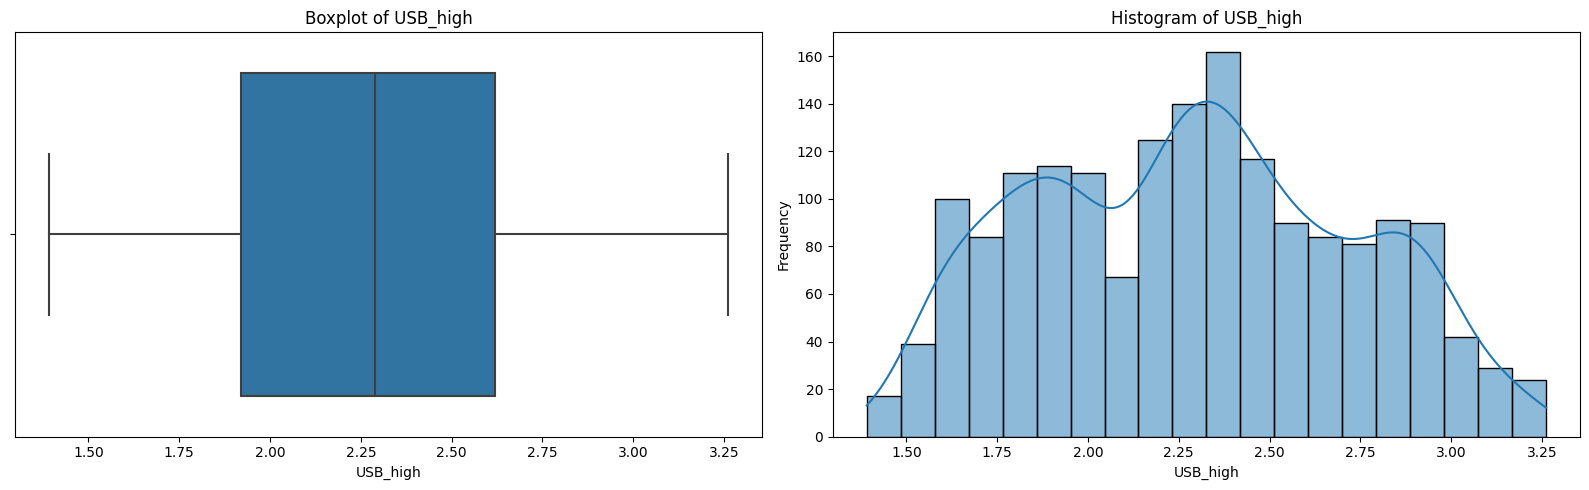

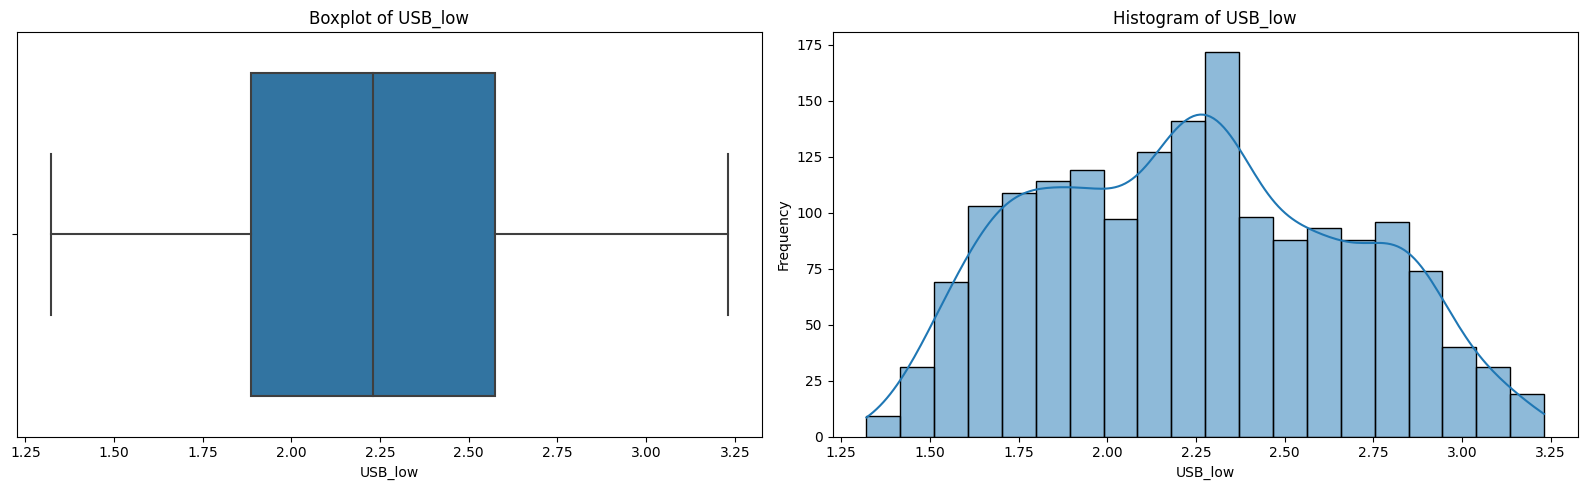

In [32]:
# Loop through each column in the gold_price DataFrame
for column in gold_price.columns:
    # Exclude columns containing 'trend'
    if 'trend' not in column:
        # Create a new figure for each column
        plt.figure(figsize=(16, 5))

        # Create a boxplot for the current column
        plt.subplot(1, 2, 1)
        sns.boxplot(x=gold_price[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)

        # Create a histogram for the current column
        plt.subplot(1, 2, 2)
        sns.histplot(gold_price[column], bins=20, kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Ensure proper spacing between subplots
        plt.tight_layout()

        # Show the plots for each column
        plt.show()

#### 3.2.3 Visualisation with outliers_df_mod_z

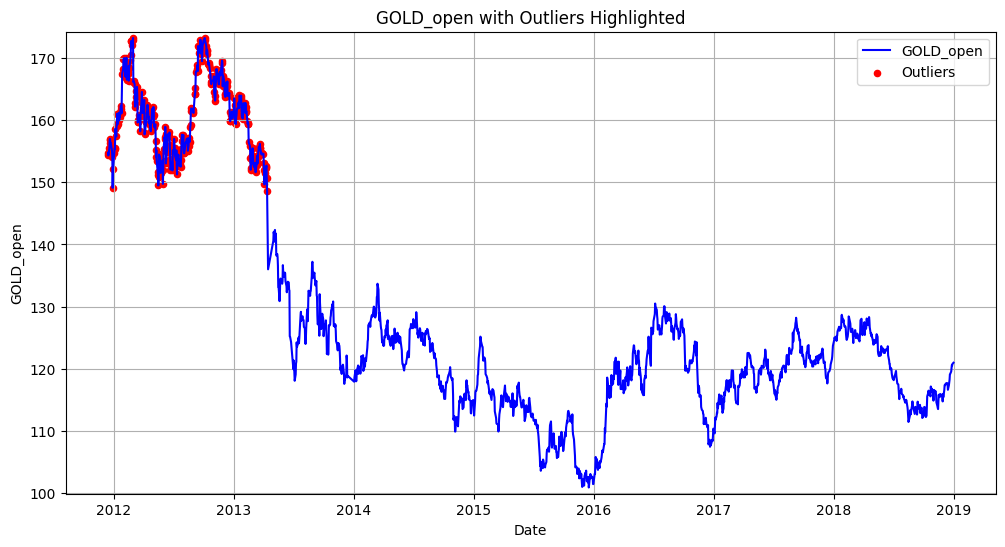

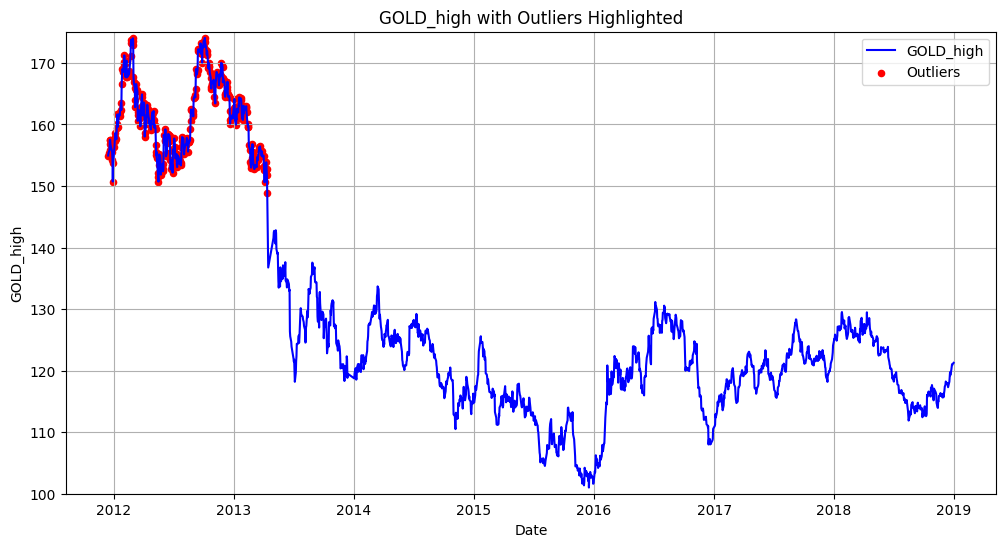

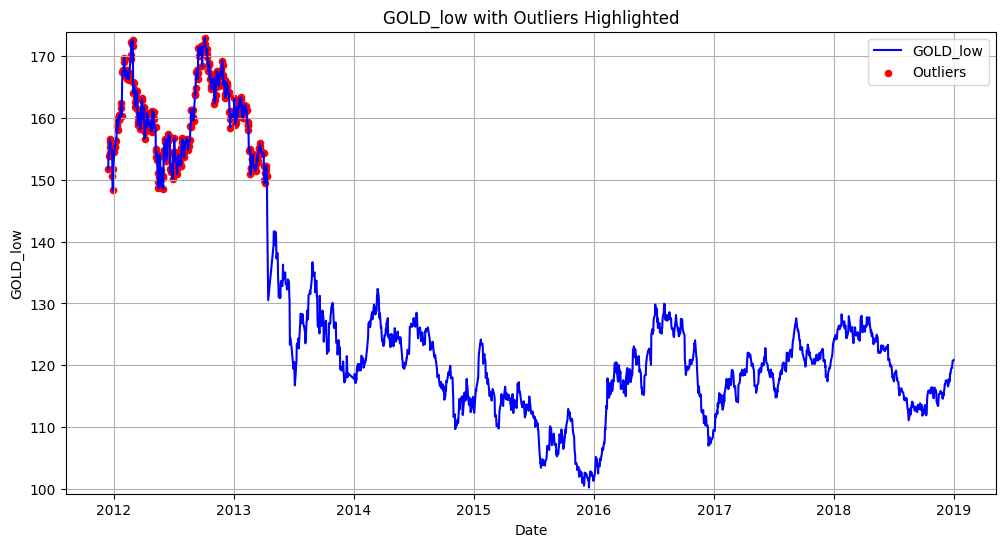

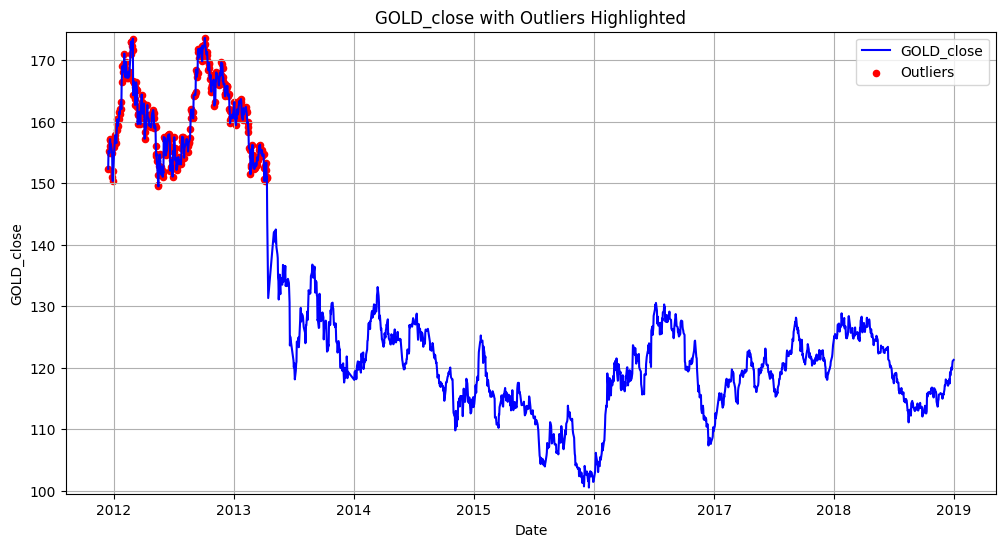

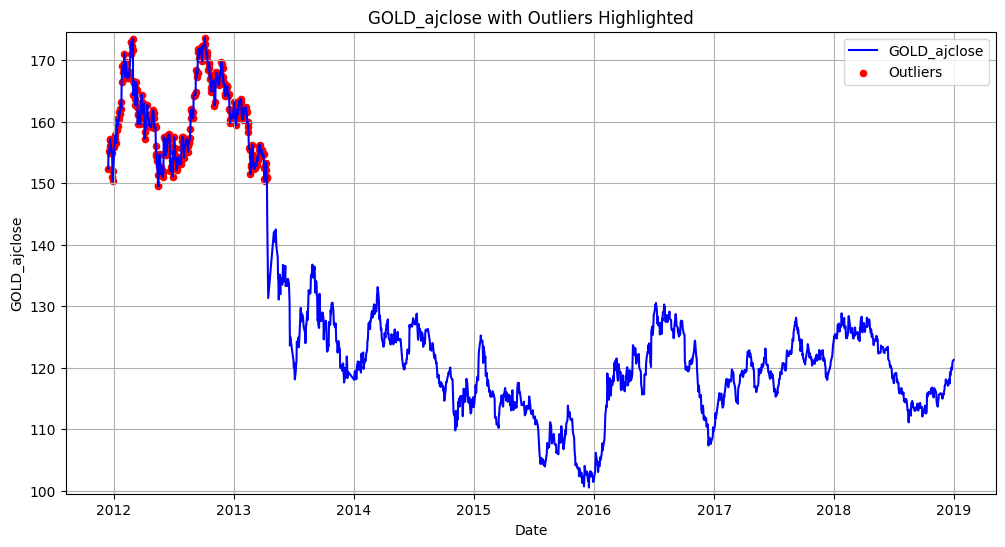

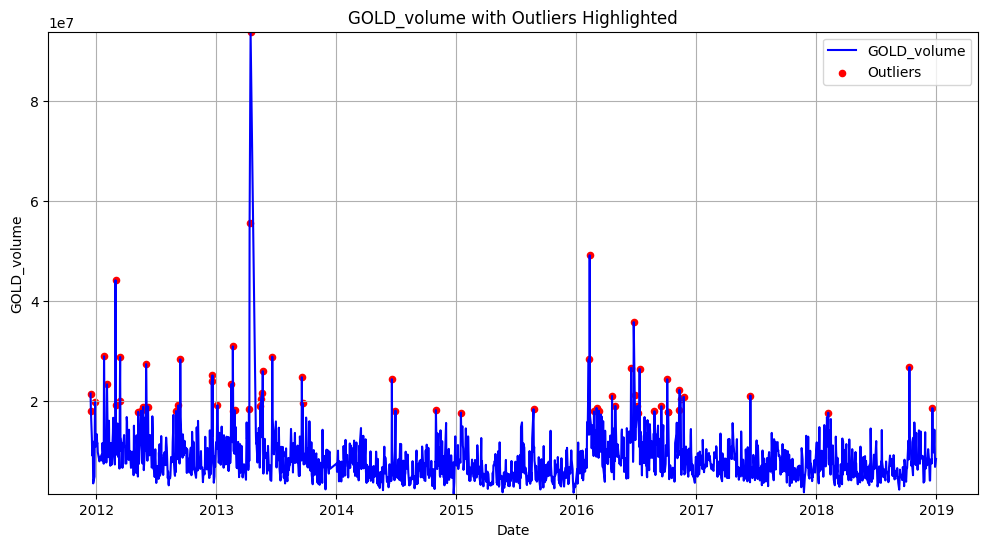

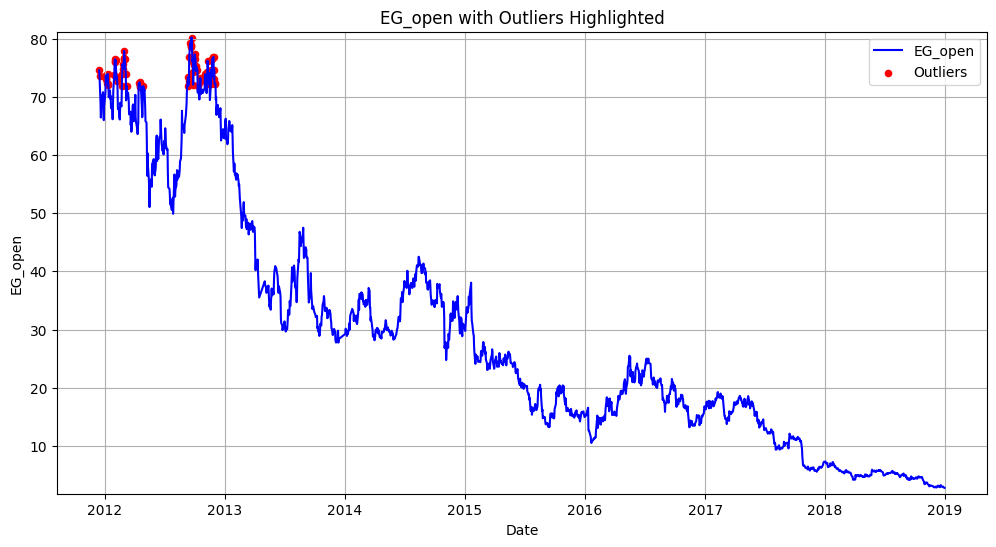

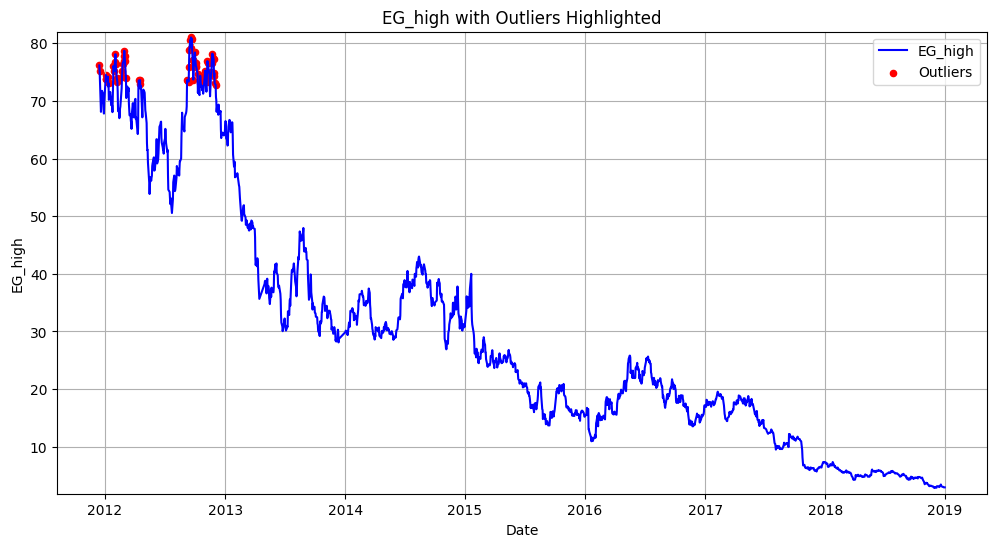

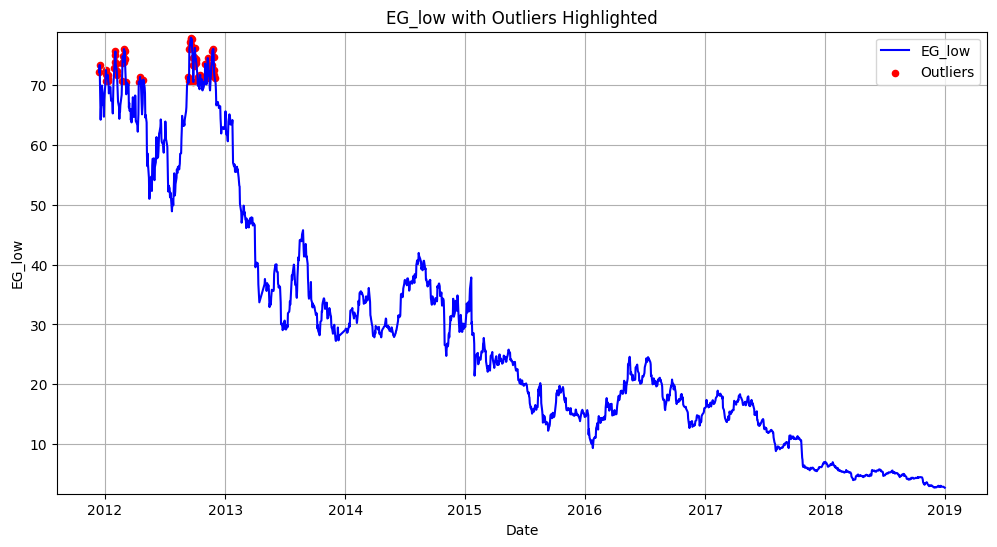

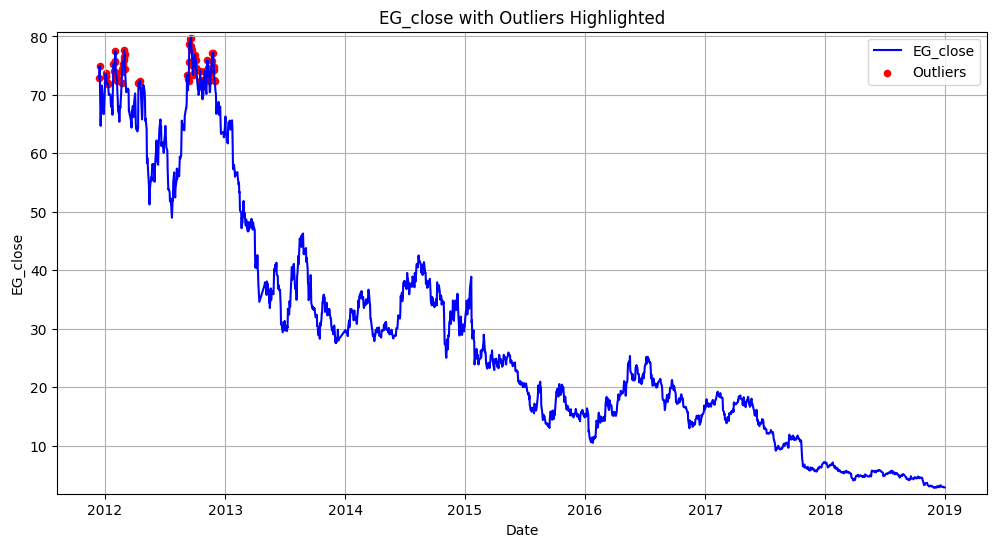

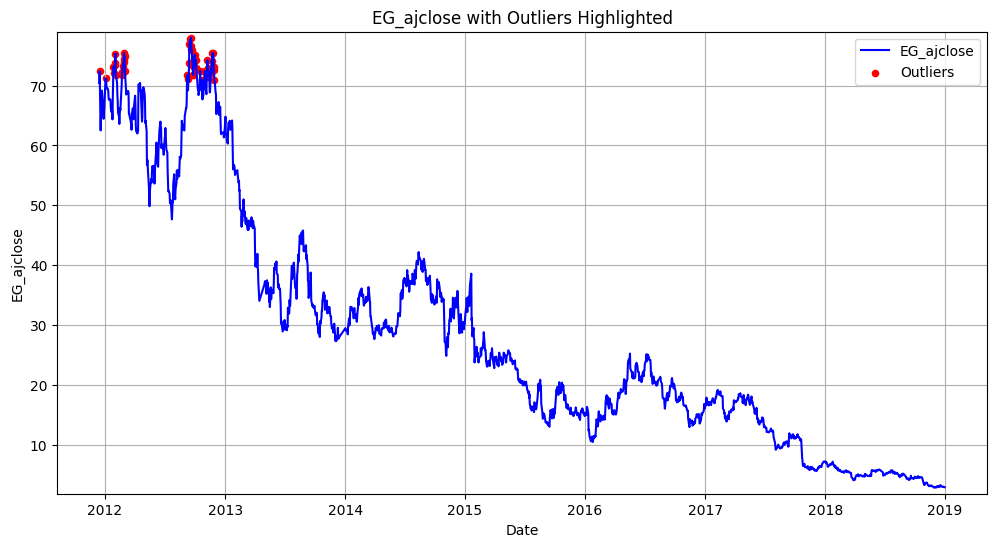

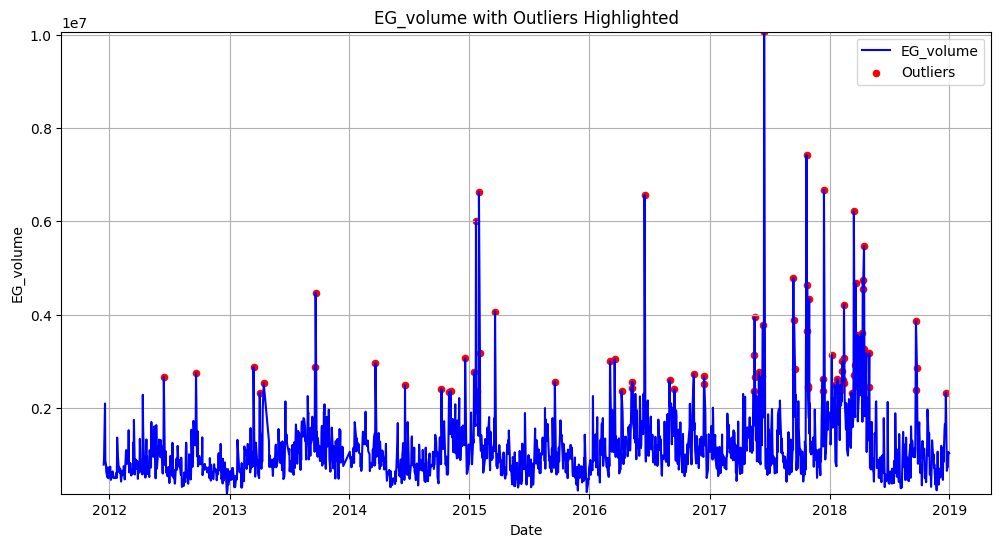

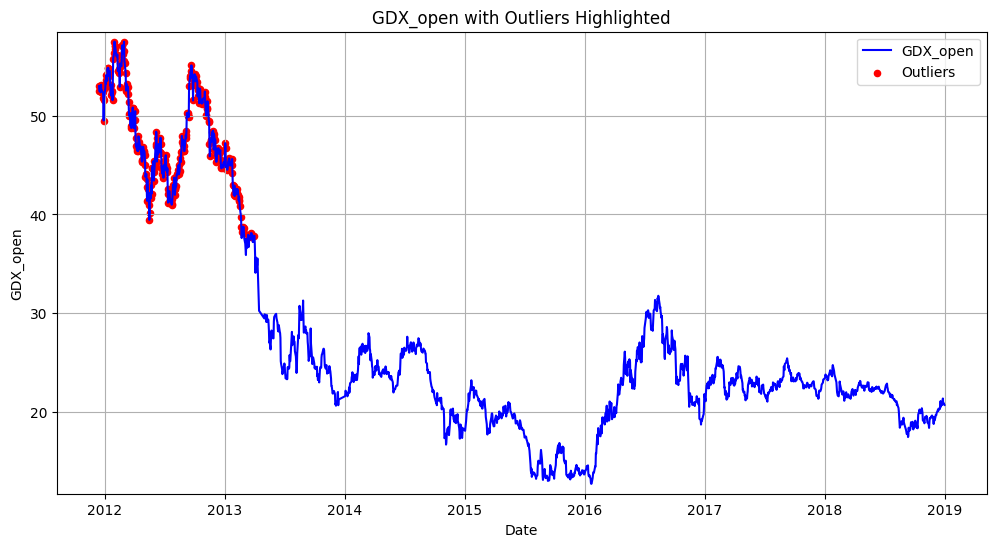

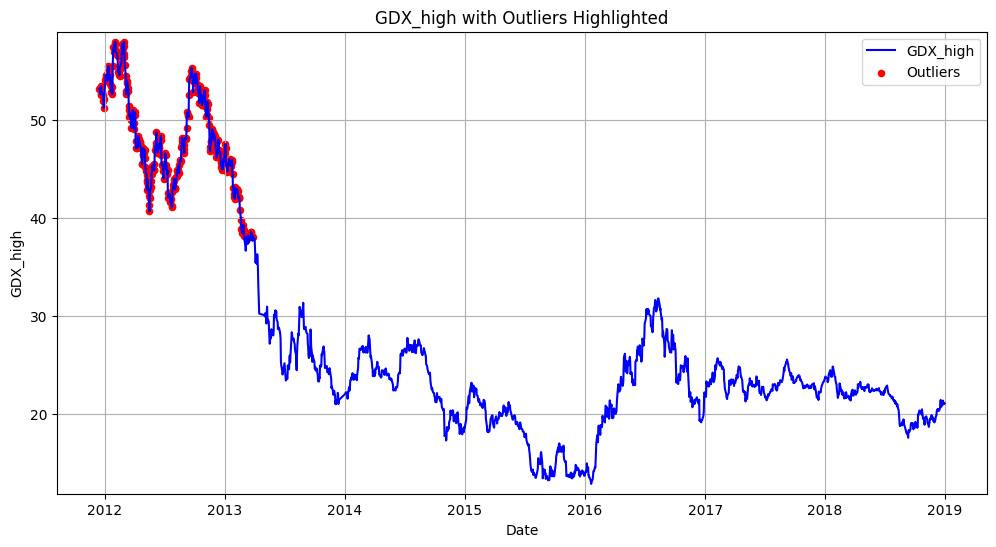

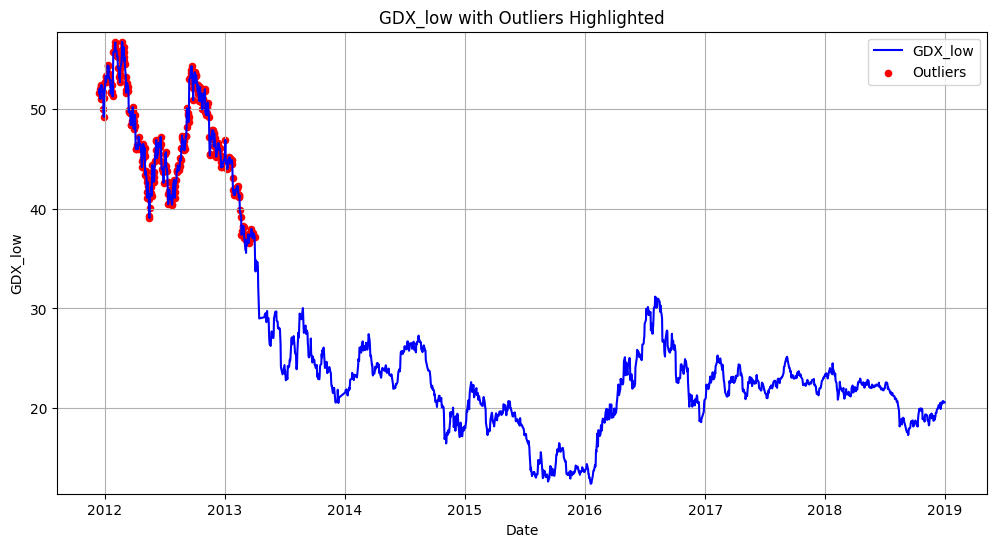

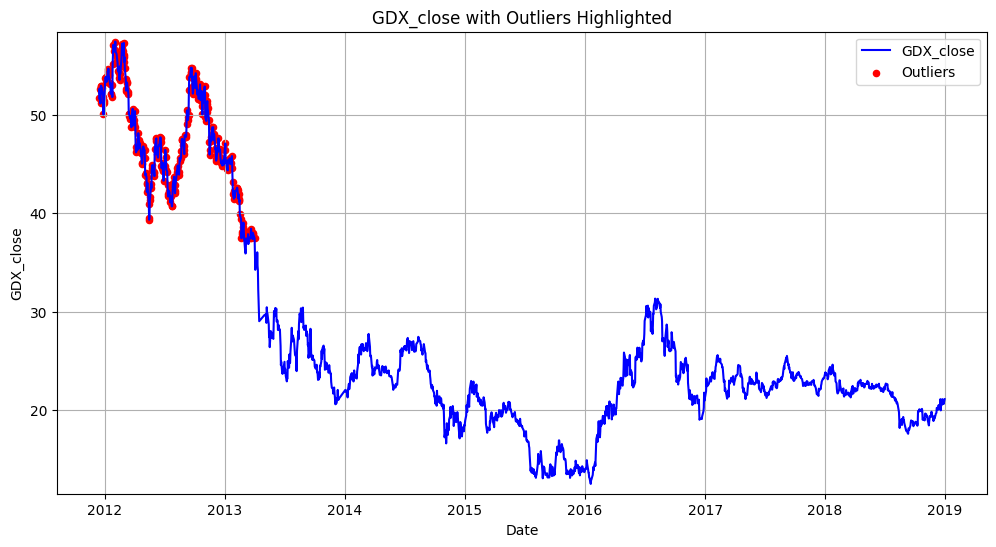

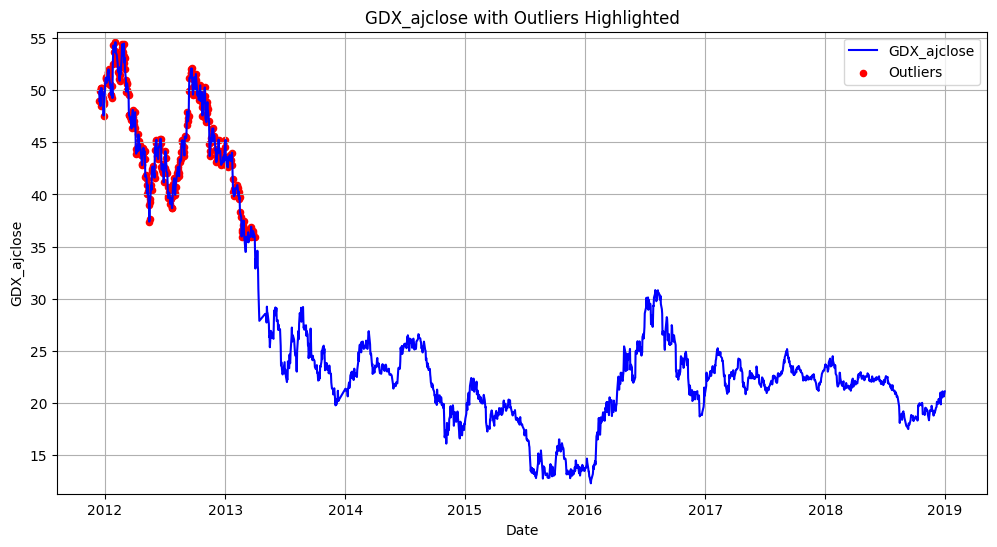

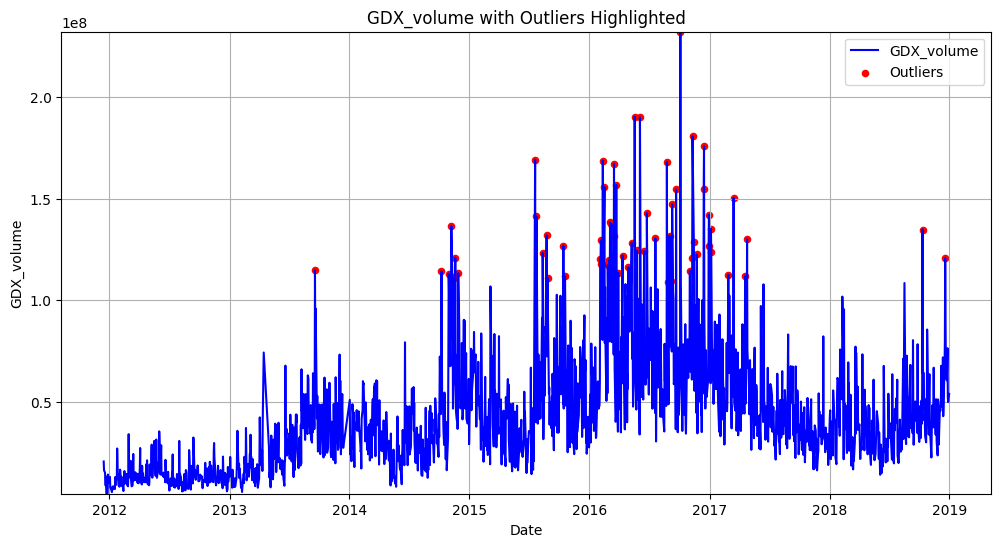

No outlier for 'PLT_price'
No outlier for 'PLT_open'
No outlier for 'PLT_high'
No outlier for 'PLT_low'
No outlier information available for 'PLT_trend'


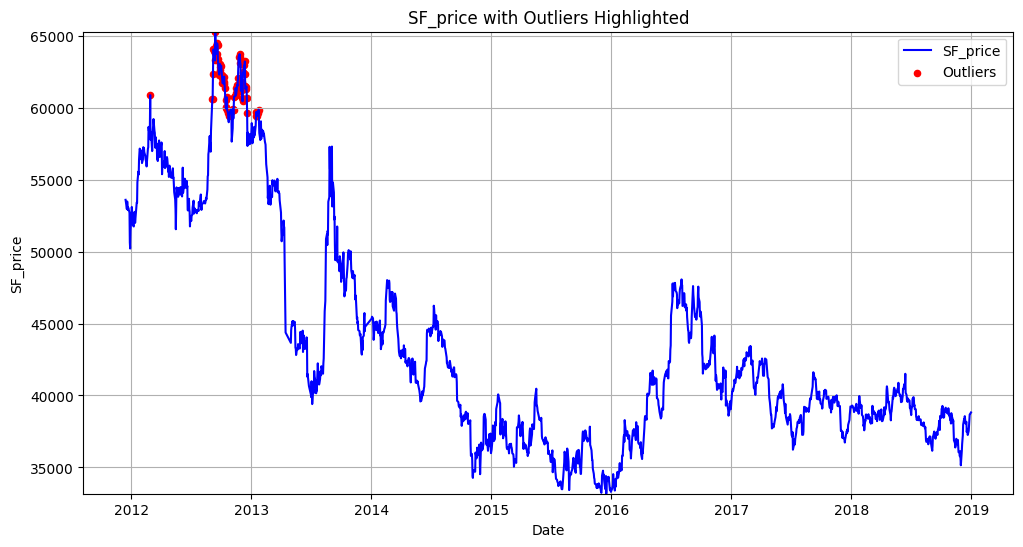

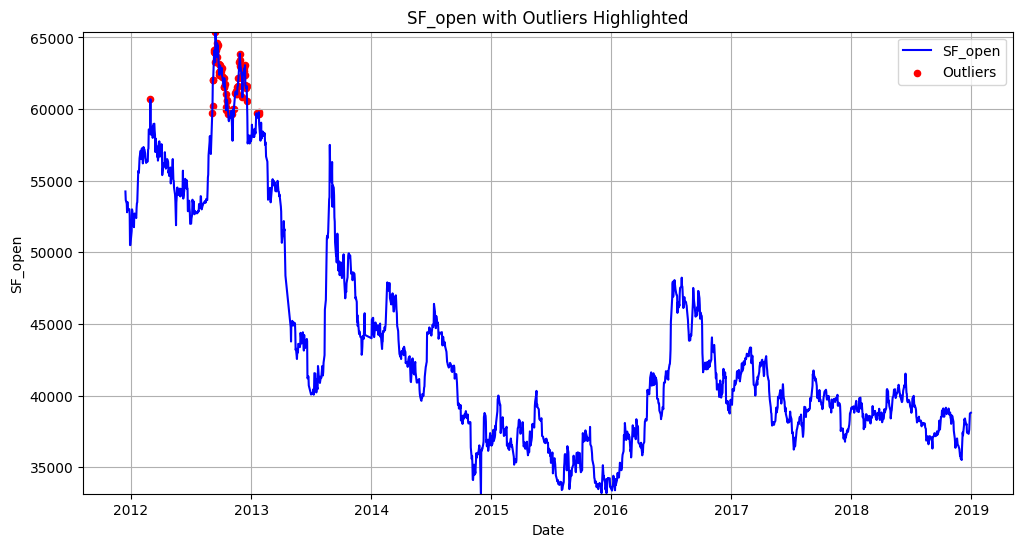

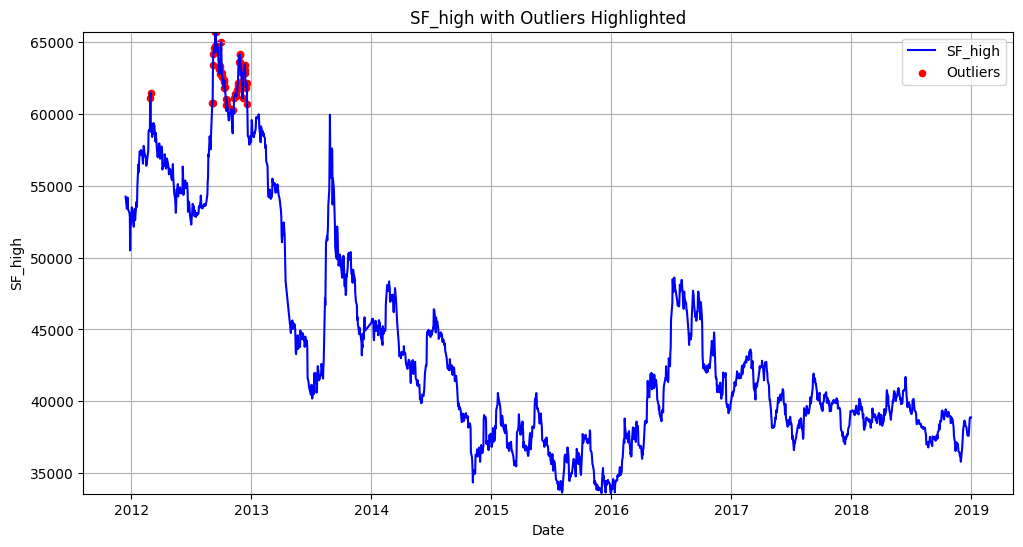

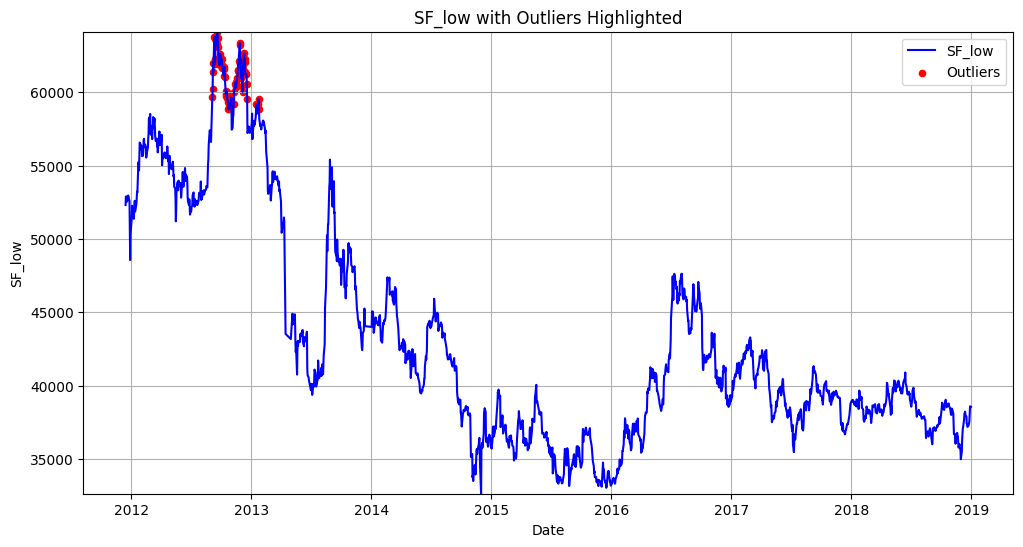

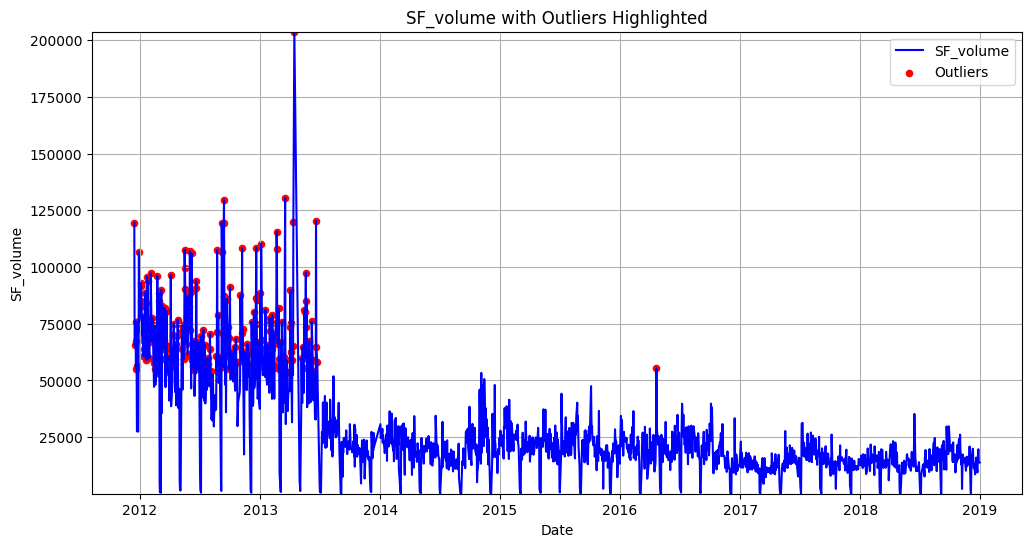

No outlier information available for 'SF_trend'


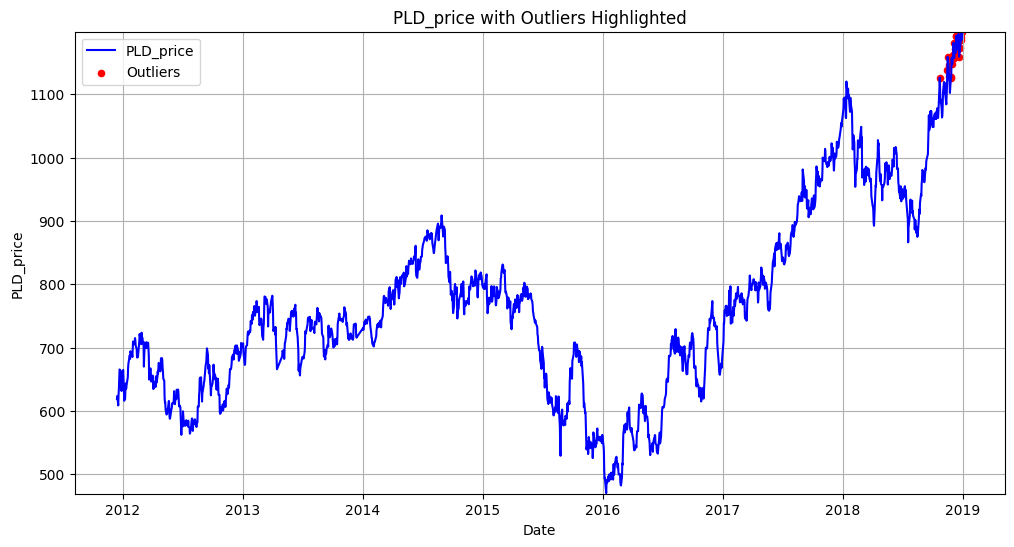

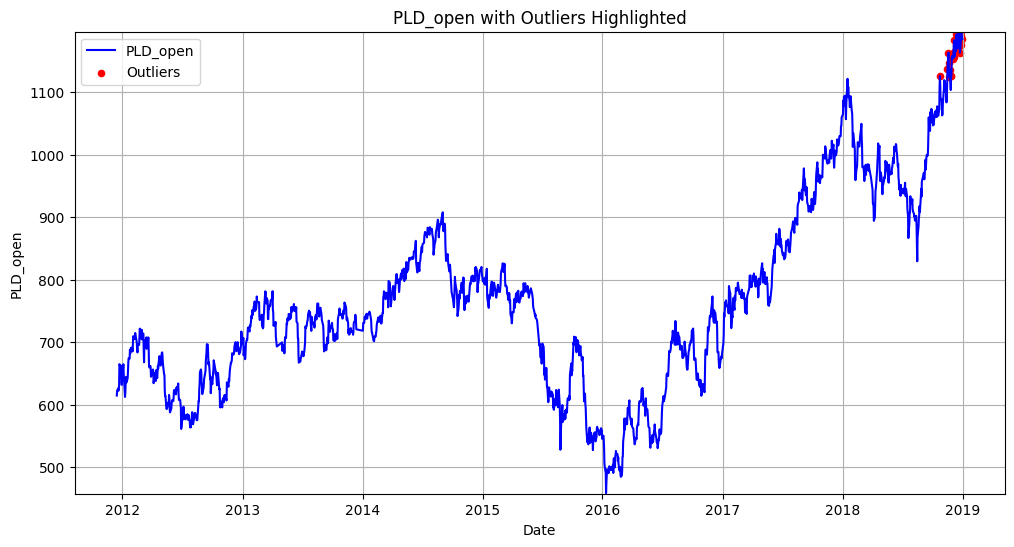

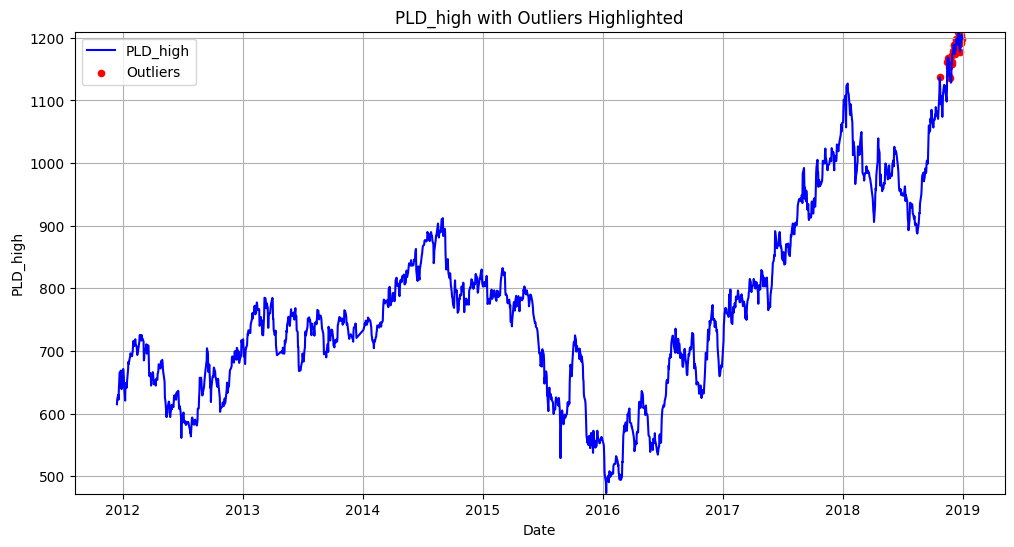

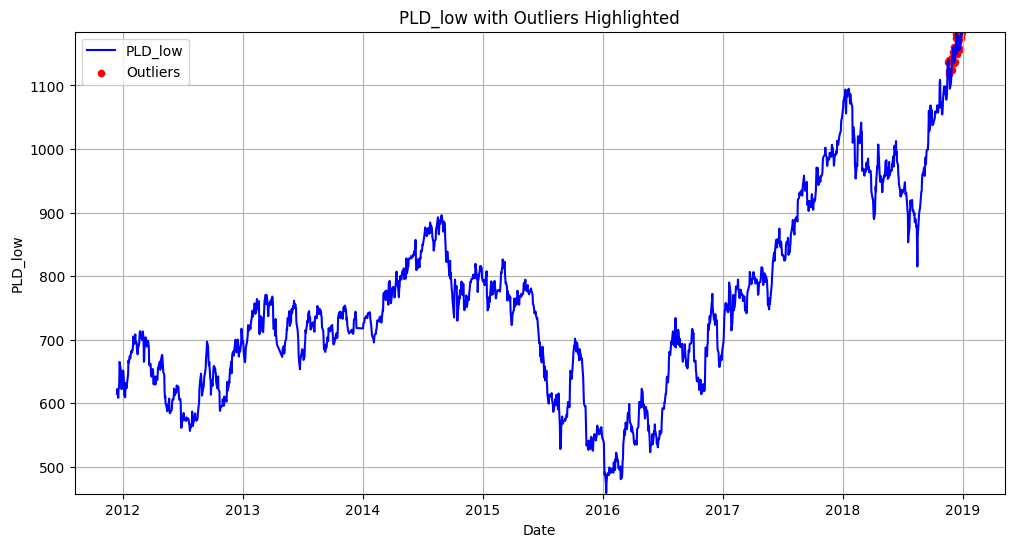

No outlier information available for 'PLD_trend'


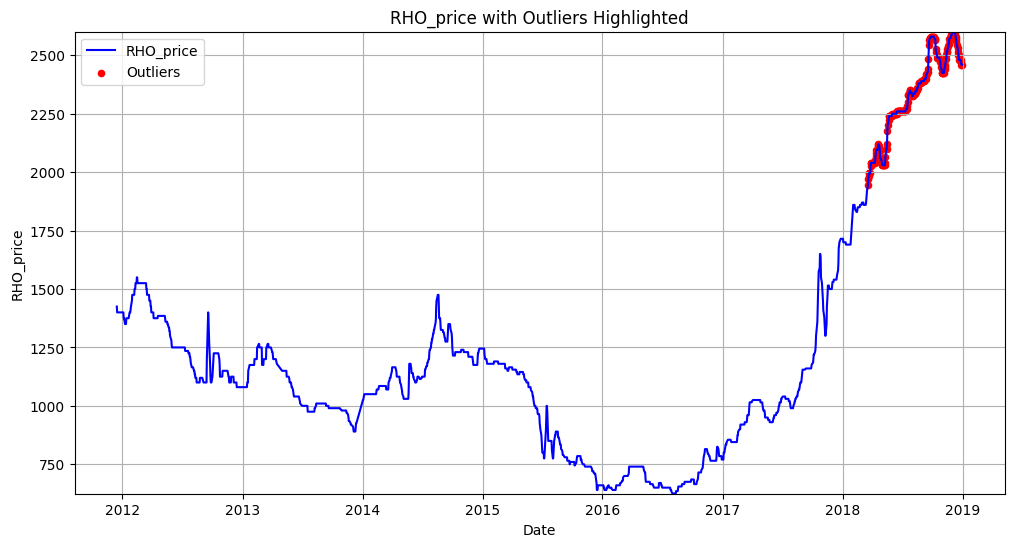

No outlier for 'SP_open'
No outlier for 'SP_high'
No outlier for 'SP_low'
No outlier for 'SP_close'
No outlier for 'SP_ajclose'


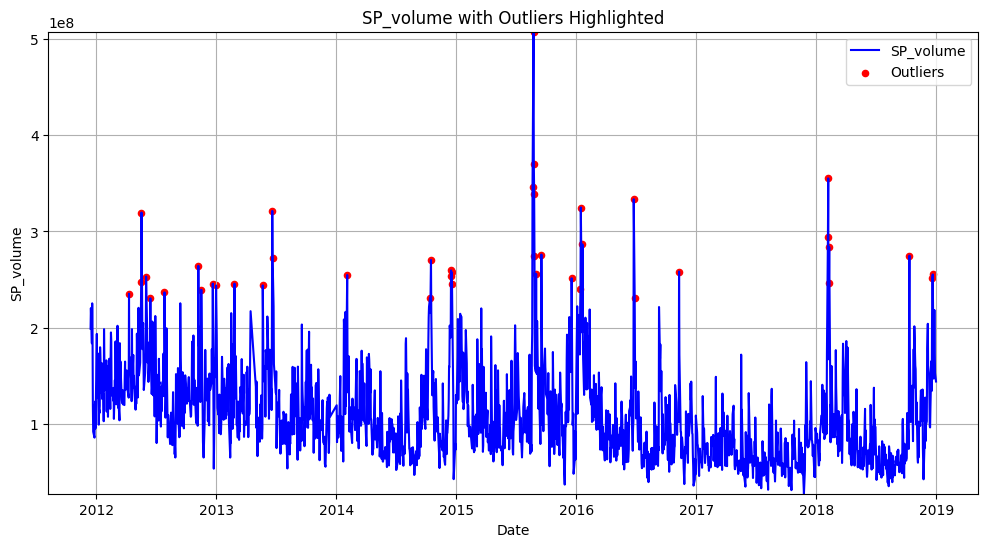

No outlier for 'DJ_open'
No outlier for 'DJ_high'
No outlier for 'DJ_low'
No outlier for 'DJ_close'
No outlier for 'DJ_ajclose'


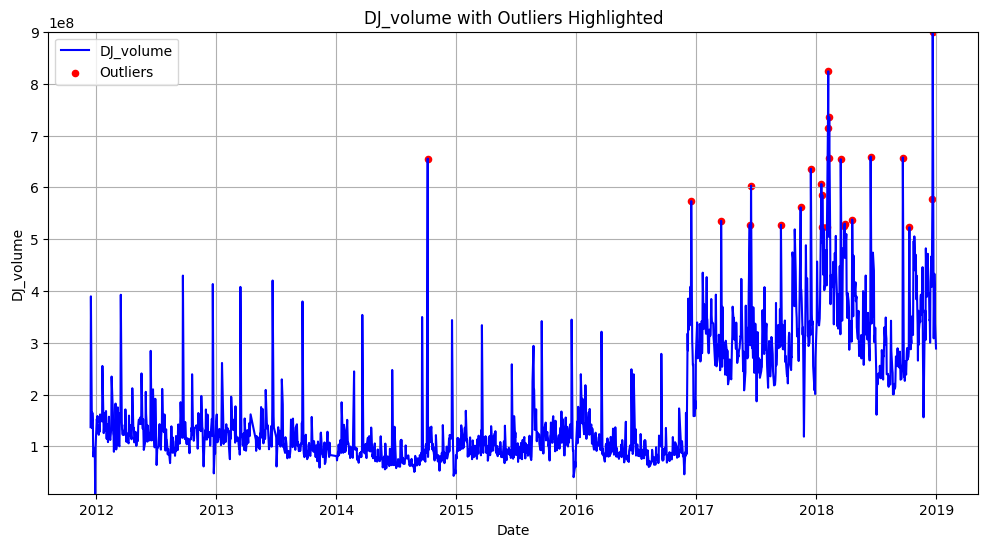

No outlier for 'EU_price'
No outlier for 'EU_open'
No outlier for 'EU_high'
No outlier for 'EU_low'
No outlier information available for 'EU_trend'
No outlier for 'USDI_price'
No outlier for 'USDI_open'
No outlier for 'USDI_high'
No outlier for 'USDI_low'


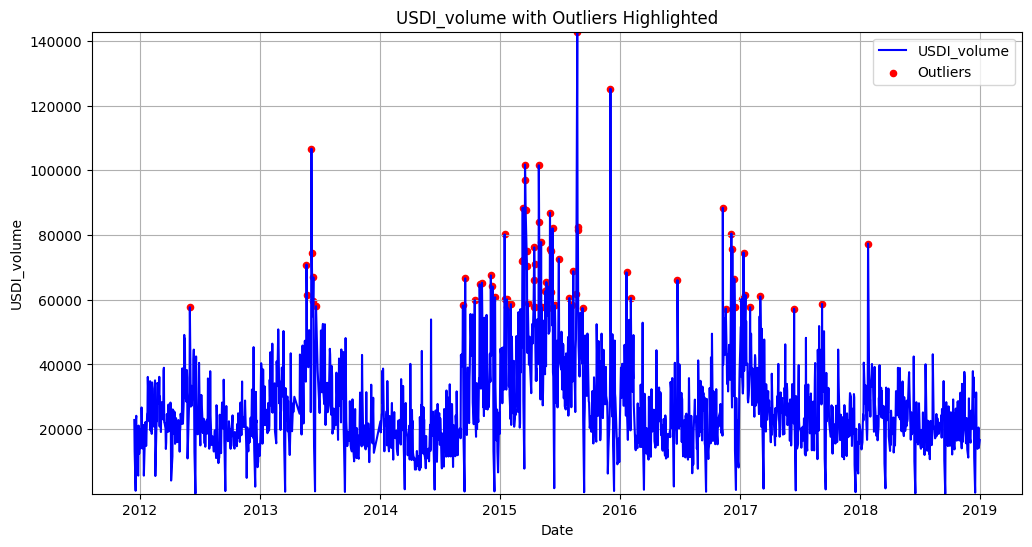

No outlier information available for 'USDI_trend'
No outlier for 'OF_price'
No outlier for 'OF_open'
No outlier for 'OF_high'
No outlier for 'OF_low'


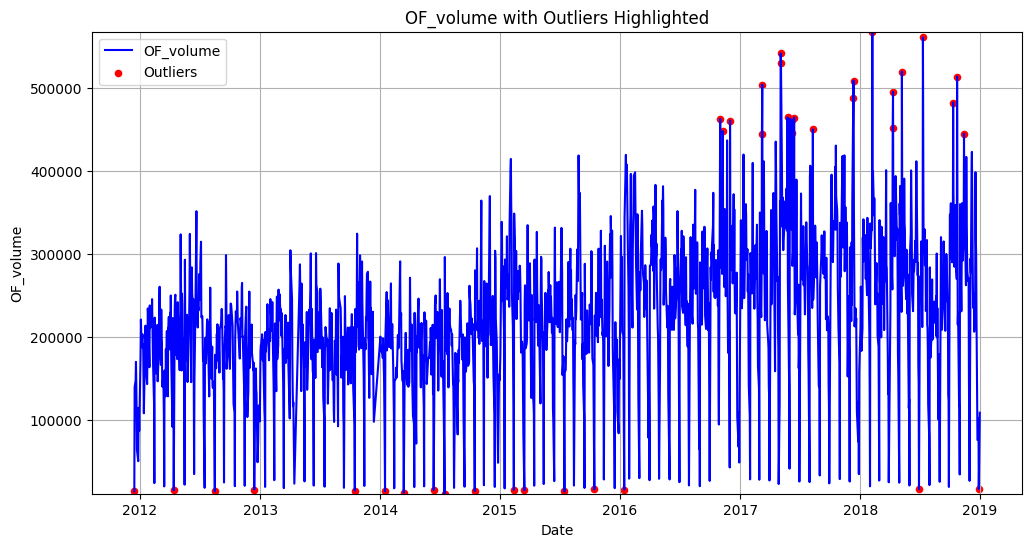

No outlier information available for 'OF_trend'
No outlier for 'OS_price'
No outlier for 'OS_open'
No outlier for 'OS_high'
No outlier for 'OS_low'
No outlier information available for 'OS_trend'
No outlier for 'USO_open'
No outlier for 'USO_high'
No outlier for 'USO_low'
No outlier for 'USO_close'
No outlier for 'USO_ajclose'


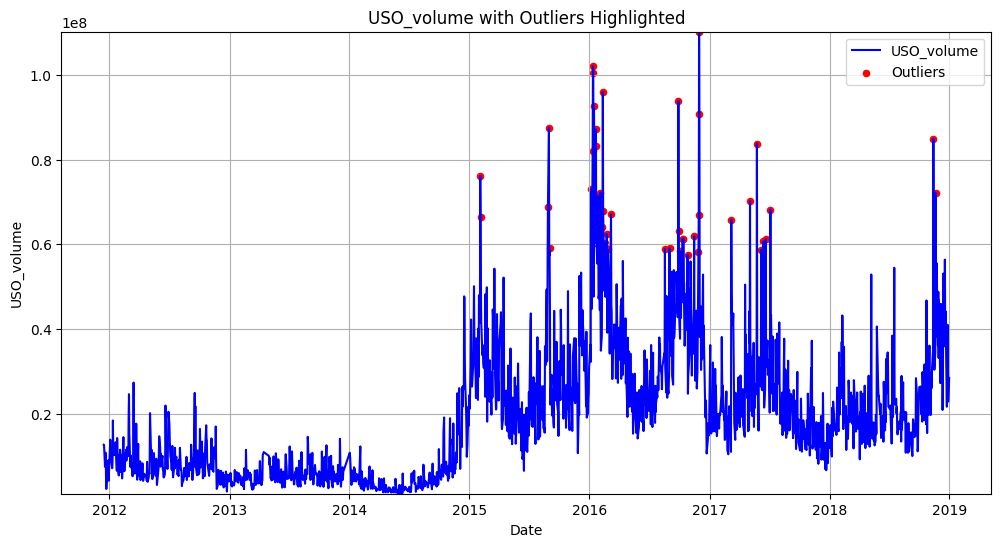

No outlier for 'USB_price'
No outlier for 'USB_open'
No outlier for 'USB_high'
No outlier for 'USB_low'
No outlier information available for 'USB_trend'


In [33]:
# Iterate through each column in the gold_price DataFrame
for column in gold_price.columns:
    # Check if the column is present in the outliers_df_mod_z
    if column in outliers_df_mod_z['Column'].values:
        # Get the outlier values for the current column
        outlier_row = outliers_df_mod_z[outliers_df_mod_z['Column'] == column]
        outlier_values = outlier_row['Outlier Values'].values
        if outlier_values != 'No outlier':
            outlier_values = outlier_values[0]

            # Create a line plot for the current column
            plt.figure(figsize=(12, 6))
            plt.plot(gold_price.index, gold_price[column], label=column, color='blue')

            # Highlight the outlier values in red
            if not outlier_values:
                plt.scatter(gold_price.index, [None] * len(gold_price.index), label='Outliers', color='red', marker='o', s=20)
            else:
                # Create a boolean mask for outlier values using numpy
                outlier_mask = np.isin(gold_price[column], outlier_values)
                plt.scatter(gold_price.index[outlier_mask], gold_price[column][outlier_mask], label='Outliers', color='red', marker='o', s=20)

            plt.xlabel('Date')
            plt.ylabel(column)
            plt.title(f'{column} with Outliers Highlighted')
            plt.legend()
            plt.grid(True)

            # Set y-axis limits based on the data in the column
            min_value = gold_price[column].min()
            max_value = gold_price[column].max()
            plt.ylim(min_value - 1, max_value + 1)

            plt.show()
        else:
            print(f"No outlier for '{column}'")
    else:
        print(f"No outlier information available for '{column}'")

In [34]:
gold_price.to_csv('processed_price_gold.csv')

#### Arranging Columns for Platinum 

In [35]:
# Desired prefix order for gold price prediction
desired_prefix_order = ['PLT', #platinum
                        'SF', 'PLD', 'RHO', #precious materials
                        'GOLD', 'EG', 'GDX', #gold related
                        'SP', 'DJ', #stock market indices
                        'EU', 'USDI', #currency indices
                        'OF', 'OS', 'USO', #commodity indices
                        'USB'] #interest rates

# Reorder columns based on desired_prefix_order
reordered_columns = []
for prefix in desired_prefix_order:
    if prefix in prefix_columns:
        reordered_columns.extend(prefix_columns[prefix])

# Reorder prefix_columns dictionary
prefix_columns = {prefix: prefix_columns[prefix] for prefix in desired_prefix_order}

# Reorder the DataFrame columns
platinum_price = gold_price[reordered_columns]

# Print the modified column order
print(platinum_price.columns.tolist())

['PLT_price', 'PLT_open', 'PLT_high', 'PLT_low', 'PLT_trend', 'SF_price', 'SF_open', 'SF_high', 'SF_low', 'SF_volume', 'SF_trend', 'PLD_price', 'PLD_open', 'PLD_high', 'PLD_low', 'PLD_trend', 'RHO_price', 'GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'GOLD_ajclose', 'GOLD_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_ajclose', 'EG_volume', 'GDX_open', 'GDX_high', 'GDX_low', 'GDX_close', 'GDX_ajclose', 'GDX_volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_ajclose', 'SP_volume', 'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_ajclose', 'DJ_volume', 'EU_price', 'EU_open', 'EU_high', 'EU_low', 'EU_trend', 'USDI_price', 'USDI_open', 'USDI_high', 'USDI_low', 'USDI_volume', 'USDI_trend', 'OF_price', 'OF_open', 'OF_high', 'OF_low', 'OF_volume', 'OF_trend', 'OS_price', 'OS_open', 'OS_high', 'OS_low', 'OS_trend', 'USO_open', 'USO_high', 'USO_low', 'USO_close', 'USO_ajclose', 'USO_volume', 'USB_price', 'USB_open', 'USB_high', 'USB_low', 'USB_trend']


In [36]:
platinum_price.head(10)

PLT_price  PLT_open  PLT_high  PLT_low  PLT_trend  SF_price  \
Date                                                                      
2011-12-15    1414.65   1420.30   1423.35  1376.85          0     53604   
2011-12-16    1420.25   1414.75   1431.75  1400.70          1     53458   
2011-12-19    1411.10   1422.65   1427.60  1404.60          0     52961   
2011-12-20    1434.75   1408.95   1436.55  1408.15          1     53487   
2011-12-21    1429.05   1434.40   1453.75  1417.65          0     53148   
2011-12-22    1425.90   1429.00   1435.25  1415.90          0     52894   
2011-12-23    1426.45   1425.55   1439.30  1424.20          1     53067   
2011-12-27    1438.55   1438.30   1442.85  1424.75          1     52711   
2011-12-28    1386.80   1437.35   1437.35  1384.65          0     50636   
2011-12-29    1379.00   1385.30   1389.40  1348.05          0     50218   

            SF_open  SF_high  SF_low  SF_volume  SF_trend  PLD_price  \
Date                                                                   
2011-12-15    54248    54248   52316     119440         1     618.85   
2011-12-16    53650    54030   52890      65390         0     623.65   
2011-12-19    53400    53400   52544      67280         0     608.80   
2011-12-20    52795    53575   52595      55130         1     626.65   
2011-12-21    53519    54184   52937      75950         0     635.90   
2011-12-22    53000    53460   52690      56530         0     652.45   
2011-12-23    53000    53348   52960      27510         1     665.55   
2011-12-27    53014    53099   52588      27450         0     663.00   
2011-12-28    52590    52806   50281      72550         0     638.80   
2011-12-29    50505    50505   48562     106590         0     631.60   

            PLD_open  PLD_high  PLD_low  PLD_trend  RHO_price   GOLD_open  \
Date                                                                        
2011-12-15    614.70    615.00   614.60          1     1425.0  154.740005   
2011-12-16    622.60    623.45   622.30          1     1400.0  154.309998   
2011-12-19    626.00    630.00   608.60          0     1400.0  155.479996   
2011-12-20    622.45    622.45   622.45          1     1400.0  156.820007   
2011-12-21    625.70    641.50   623.80          1     1400.0  156.979996   
2011-12-22    632.00    650.80   632.00          1     1400.0  156.350006   
2011-12-23    664.95    665.05   664.95          1     1400.0  156.350006   
2011-12-27    658.50    668.80   651.80          1     1400.0  155.080002   
2011-12-28    662.60    667.20   631.60          0     1400.0  154.050003   
2011-12-29    636.90    639.10   622.10          0     1400.0  149.089996   

             GOLD_high    GOLD_low  GOLD_close  GOLD_ajclose  GOLD_volume  \
Date                                                                        
2011-12-15  154.949997  151.710007  152.330002    152.330002     21521900   
2011-12-16  155.369995  153.899994  155.229996    155.229996     18124300   
2011-12-19  155.860001  154.360001  154.869995    154.869995     12547200   
2011-12-20  157.429993  156.580002  156.979996    156.979996      9136300   
2011-12-21  157.529999  156.130005  157.160004    157.160004     11996100   
2011-12-22  156.800003  155.330002  156.039993    156.039993      9888400   
2011-12-23  156.490005  155.820007  156.309998    156.309998      3565100   
2011-12-27  155.550003  154.539993  154.910004    154.910004      4918600   
2011-12-28  154.259995  150.660004  151.029999    151.029999     16436100   
2011-12-29  150.720001  148.270004  150.339996    150.339996     19812200   

              EG_open    EG_high     EG_low   EG_close  EG_ajclose  EG_volume  \
Date                                                                            
2011-12-15  74.550003  76.150002  72.150002  72.900002   70.431755     787900   
2011-12-16  73.599998  75.099998  73.349998  74.900002   72.364037     896600   
2011-12-19  69.099998  69.800003  64.199997  64.699997   62.509384    20

In [37]:
platinum_price.to_csv('processed_price_platinum.csv')

#### Arranging Columns for Silver

In [38]:
# Desired prefix order for gold price prediction
desired_prefix_order = ['SF', #silver
                        'PLT', 'PLD', 'RHO', #precious materials
                        'GOLD', 'EG', 'GDX', #gold related
                        'SP', 'DJ', #stock market indices
                        'EU', 'USDI', #currency indices
                        'OF', 'OS', 'USO', #commodity indices
                        'USB'] #interest rates

# Reorder columns based on desired_prefix_order
reordered_columns = []
for prefix in desired_prefix_order:
    if prefix in prefix_columns:
        reordered_columns.extend(prefix_columns[prefix])

# Reorder prefix_columns dictionary
prefix_columns = {prefix: prefix_columns[prefix] for prefix in desired_prefix_order}

# Reorder the DataFrame columns
silver_price = gold_price[reordered_columns]

# Print the modified column order
print(silver_price.columns.tolist())

['SF_price', 'SF_open', 'SF_high', 'SF_low', 'SF_volume', 'SF_trend', 'PLT_price', 'PLT_open', 'PLT_high', 'PLT_low', 'PLT_trend', 'PLD_price', 'PLD_open', 'PLD_high', 'PLD_low', 'PLD_trend', 'RHO_price', 'GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'GOLD_ajclose', 'GOLD_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_ajclose', 'EG_volume', 'GDX_open', 'GDX_high', 'GDX_low', 'GDX_close', 'GDX_ajclose', 'GDX_volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_ajclose', 'SP_volume', 'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_ajclose', 'DJ_volume', 'EU_price', 'EU_open', 'EU_high', 'EU_low', 'EU_trend', 'USDI_price', 'USDI_open', 'USDI_high', 'USDI_low', 'USDI_volume', 'USDI_trend', 'OF_price', 'OF_open', 'OF_high', 'OF_low', 'OF_volume', 'OF_trend', 'OS_price', 'OS_open', 'OS_high', 'OS_low', 'OS_trend', 'USO_open', 'USO_high', 'USO_low', 'USO_close', 'USO_ajclose', 'USO_volume', 'USB_price', 'USB_open', 'USB_high', 'USB_low', 'USB_trend']


In [39]:
silver_price.head(10)

SF_price  SF_open  SF_high  SF_low  SF_volume  SF_trend  \
Date                                                                  
2011-12-15     53604    54248    54248   52316     119440         1   
2011-12-16     53458    53650    54030   52890      65390         0   
2011-12-19     52961    53400    53400   52544      67280         0   
2011-12-20     53487    52795    53575   52595      55130         1   
2011-12-21     53148    53519    54184   52937      75950         0   
2011-12-22     52894    53000    53460   52690      56530         0   
2011-12-23     53067    53000    53348   52960      27510         1   
2011-12-27     52711    53014    53099   52588      27450         0   
2011-12-28     50636    52590    52806   50281      72550         0   
2011-12-29     50218    50505    50505   48562     106590         0   

            PLT_price  PLT_open  PLT_high  PLT_low  PLT_trend  PLD_price  \
Date                                                                       
2011-12-15    1414.65   1420.30   1423.35  1376.85          0     618.85   
2011-12-16    1420.25   1414.75   1431.75  1400.70          1     623.65   
2011-12-19    1411.10   1422.65   1427.60  1404.60          0     608.80   
2011-12-20    1434.75   1408.95   1436.55  1408.15          1     626.65   
2011-12-21    1429.05   1434.40   1453.75  1417.65          0     635.90   
2011-12-22    1425.90   1429.00   1435.25  1415.90          0     652.45   
2011-12-23    1426.45   1425.55   1439.30  1424.20          1     665.55   
2011-12-27    1438.55   1438.30   1442.85  1424.75          1     663.00   
2011-12-28    1386.80   1437.35   1437.35  1384.65          0     638.80   
2011-12-29    1379.00   1385.30   1389.40  1348.05          0     631.60   

            PLD_open  PLD_high  PLD_low  PLD_trend  RHO_price   GOLD_open  \
Date                                                                        
2011-12-15    614.70    615.00   614.60          1     1425.0  154.740005   
2011-12-16    622.60    623.45   622.30          1     1400.0  154.309998   
2011-12-19    626.00    630.00   608.60          0     1400.0  155.479996   
2011-12-20    622.45    622.45   622.45          1     1400.0  156.820007   
2011-12-21    625.70    641.50   623.80          1     1400.0  156.979996   
2011-12-22    632.00    650.80   632.00          1     1400.0  156.350006   
2011-12-23    664.95    665.05   664.95          1     1400.0  156.350006   
2011-12-27    658.50    668.80   651.80          1     1400.0  155.080002   
2011-12-28    662.60    667.20   631.60          0     1400.0  154.050003   
2011-12-29    636.90    639.10   622.10          0     1400.0  149.089996   

             GOLD_high    GOLD_low  GOLD_close  GOLD_ajclose  GOLD_volume  \
Date                                                                        
2011-12-15  154.949997  151.710007  152.330002    152.330002     21521900   
2011-12-16  155.369995  153.899994  155.229996    155.229996     18124300   
2011-12-19  155.860001  154.360001  154.869995    154.869995     12547200   
2011-12-20  157.429993  156.580002  156.979996    156.979996      9136300   
2011-12-21  157.529999  156.130005  157.160004    157.160004     11996100   
2011-12-22  156.800003  155.330002  156.039993    156.039993      9888400   
2011-12-23  156.490005  155.820007  156.309998    156.309998      3565100   
2011-12-27  155.550003  154.539993  154.910004    154.910004      4918600   
2011-12-28  154.259995  150.660004  151.029999    151.029999     16436100   
2011-12-29  150.720001  148.270004  150.339996    150.339996     19812200   

              EG_open    EG_high     EG_low   EG_close  EG_ajclose  EG_volume  \
Date                                                                            
2011-12-15  74.550003  76.150002  72.150002  72.900002   70.431755     787900   
2011-12-16  73.599998  75.099998  73.349998  74.900002   72.364037     896600   
2011-12-19  69.099998  69.800003  64.199997  64.699997   62.509384    20

In [40]:
silver_price.to_csv('processed_price_silver.csv')

Data Preparation steps will be continued in:
* B1 - Gold Prediction.ipynb
* B2 - Platinum Prediction.ipynb
* B3 - Silver Prediction.ipynb

More Visualisation and Analysis will be found in:
* C - Further Analysis.ipynb